# 0. A Comparison of Different Classification Algorthims 

### This notebook will contain research into the overall effectiveness of a select amount of classification algorthims on a public domain heart disease dataset.

#### The algorithms tested are:
1. `RandomForestClassifier`
2. `LogisticRegression`
3. `KNeighborsClassifier`
4. `AdaBoostClassifier`
5. `SGDClassifier`
6. `GaussianNB`
7. `MLPClassifier`



#### The dataset used can be found here https://archive.ics.uci.edu/ml/datasets/heart+disease)



In [1]:
# Base Imports
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


#### Getting the data ready

In [2]:
heart = pd.read_csv("heart.csv")
heart

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [3]:
# Checking for missing values in data
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Creating Functions that will be used for scoring, plotting and evaluating.

In [3]:
# Creating a Function to evaluate a Model's predictions
def model_prediction(y_test, y_prediction):
    
    accuracy = accuracy_score(y_test, y_prediction)
    precision = precision_score(y_test, y_prediction)
    recall = recall_score(y_test, y_prediction)
    f1 = f1_score(y_test, y_prediction)
    
    prediction_evaluation = {"accuracy": round(accuracy, 2),
                             "precision": round(precision, 2),
                             "recall": round(recall, 2),
                             "f1": round(f1, 2)}
    
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"f1: {f1 * 100:.2f}%")

    return prediction_evaluation

In [4]:
# Creating a function that gets the metrics but cross-validated
def cross_val_metrics(clf, X, y):
    
    cross_val_accuracy = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
    cross_val_accuracy = np.mean(cross_val_accuracy)
    
    cross_val_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
    cross_val_precision = np.mean(cross_val_precision)
    
    cross_val_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
    cross_val_recall = np.mean(cross_val_recall)
    
    cross_val_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
    cross_val_f1 = np.mean(cross_val_f1)
    
    cross_val_evaluation = {"accuracy": round(cross_val_accuracy, 2),
                             "precision": round(cross_val_precision, 2),
                             "recall": round(cross_val_recall, 2),
                             "f1": round(cross_val_f1, 2)}
    
    print(f"Accuracy: {cross_val_accuracy * 100:.2f}%")
    print(f"Precision: {cross_val_precision * 100:.2f}%")
    print(f"Recall: {cross_val_recall * 100:.2f}%")
    print(f"f1: {cross_val_f1 * 100:.2f}%")
    
    return cross_val_evaluation

In [5]:
# Creating a Function to plot ROC curve (compare fpr and tpr)
def roc_curve_plot(fpr, tpr):
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend
    plt.show()

## 1. `RandomForestClassifier`

In [6]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(77)

# Creating Features Matrix and Labels
X = heart.drop("target", axis=1)
y = heart["target"]

# Normalizing the data
ss = StandardScaler()
X = ss.fit_transform(X)

# Splitting data into Train and Test splits (80% 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiating our model
clf = RandomForestClassifier()

# Fitting our model
clf.fit(X_train, y_train)

RandomForestClassifier()

## 1.1 `RandomForestClassifier` Baseline

##### Cross-Validated  Accuracy Score

In [9]:
# Random Seed for reproducable results
np.random.seed(77)

cvs = cross_val_score(clf, X, y, cv=5)
baseline_cvs = cvs
np.mean(cvs)

print(f'The non cross-validated score for the baseline model is: {clf.score(X_test, y_test)}')
print(f'The cross-validated score for the baseline model is: {np.mean(cvs)}')

The non cross-validated score for the baseline model is: 0.8524590163934426
The cross-validated score for the baseline model is: 0.8348087431693989


#### Area under Reciever Operating Characteristic Curve (AUC/ROC)

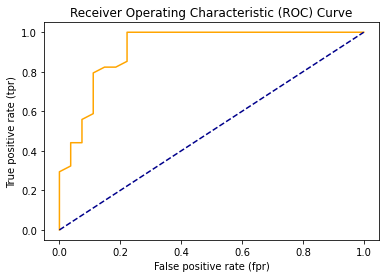

In [10]:

# Make predictions
y_predict = clf.predict(X_test)
y_probability = clf.predict_proba(X_test)
y_probability_positive = y_probability[:, 1]

# Get fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probability_positive)
roc_curve_plot(fpr, tpr)

In [11]:
baseline_roc_auc = roc_auc_score(y_test, y_probability_positive)
baseline_roc_auc

0.9183006535947712

### Note
Below I have gathered the metrics for the model. 
The none cross-validated metrics are based on the y_test and y_predict variables, whilst the cross-validated ones are based on X and Y. 

Is this a problem? I'm unsure. Something to look into

#### Model Accuracy, Precision, Recall and F1 score with `sklearn.metrics`

In [12]:
baseline_metrics = model_prediction(y_test, y_predict)
baseline_metrics

Accuracy: 85.25%
Precision: 83.78%
Recall: 91.18%
f1: 87.32%


{'accuracy': 0.85, 'precision': 0.84, 'recall': 0.91, 'f1': 0.87}

#### Cross Validated Metrics

In [13]:
np.random.seed(77)

baseline_cross_val_metrics = cross_val_metrics(clf, X, y)
baseline_cross_val_metrics

Accuracy: 83.48%
Precision: 82.01%
Recall: 86.67%
f1: 83.52%


{'accuracy': 0.83, 'precision': 0.82, 'recall': 0.87, 'f1': 0.84}

#### Confusion Matrix

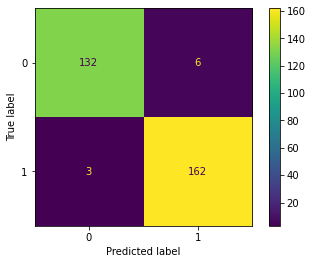

In [14]:
plot_confusion_matrix(clf, X, y)

#### Baseline Summary

In [15]:
print('The results on the baseline RandomForestClassifier Model are as follows:\n')
print(f'Cross-Validated Accuracy: {np.mean(baseline_cvs)}')
print(f'AUC_ROC: {baseline_roc_auc}')
print(f'Metrics: {baseline_metrics}')
print(f'Cross-Validated Metrics: {baseline_cross_val_metrics}')

The results on the baseline RandomForestClassifier Model are as follows:

Cross-Validated Accuracy: 0.8348087431693989
AUC_ROC: 0.9183006535947712
Metrics: {'accuracy': 0.85, 'precision': 0.84, 'recall': 0.91, 'f1': 0.87}
Cross-Validated Metrics: {'accuracy': 0.83, 'precision': 0.82, 'recall': 0.87, 'f1': 0.84}


## 1.2 `RandomForestClassifier` Hyperparameter adjustments/testing using `RandomizedSearchCV` and `GridSearchCV`

####  1.2.1 `RanomizedSearchCV`

In [16]:
np.random.seed(77)

# Use arange for n_estimators and max depth
random_grid = {"n_estimators": np.arange(10, 1200, 50),
        "max_depth": [None, 5, 10, 20, 30, 40],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

# Creating Features Matrix and Labels
X = heart.drop("target", axis=1)
y = heart["target"]

# Normalizing the data
ss = StandardScaler()
X = ss.fit_transform(X)

# Splitting data into Train and Test splits (80% 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Instantiating our model
clf = RandomForestClassifier()

# Using RandomizedSearchCV
randomSearch_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=random_grid, 
                            n_iter=10, 
                            cv=5, # Automatically crossvalidates it for us
                            verbose=2)
# Fitting our model
randomSearch_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=160, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=160, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.5s
[CV] n_estimators=160, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=160, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.5s
[CV] n_estimators=160, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=160, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.5s
[CV] n_estimators=160, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=160, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.5s
[CV] n_estimators=160, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=160, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.5s
[CV] n_estimators=1060, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=1060, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=5, total=   3.0s
[CV] n_estimators=1060, min_samples_split=4, min_sam

[CV]  n_estimators=160, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   0.4s
[CV] n_estimators=160, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=160, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   0.4s
[CV] n_estimators=160, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=160, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   0.4s
[CV] n_estimators=160, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=160, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   0.4s
[CV] n_estimators=160, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=160, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   0.4s
[CV] n_estimators=1060, min_sample

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30, 40],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': array([  10,   60,  110,  160,  210,  260,  310,  360,  410,  460,  510,
        560,  610,  660,  710,  760,  810,  860,  910,  960, 1010, 1060,
       1110, 1160])},
                   verbose=2)

In [17]:
# Just checking the best parameters it found
randomSearch_clf.best_params_

{'n_estimators': 1060,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 5}

##### `RandomizedSearchCV` Cross-Validated Accuracy

In [18]:
# Cross-Val Accuracy
randomSearch_cvs = cross_val_score(randomSearch_clf, X, y, cv=5)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=610, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=610, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   1.7s
[CV] n_estimators=610, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  n_estimators=610, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   1.6s
[CV] n_estimators=610, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=610, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   1.6s
[CV] n_estimators=610, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=610, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   1.6s
[CV] n_estimators=610, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=610, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   1.6s
[CV] n_estimators=560, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=560, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   1.5s
[CV] n_estimators=560, min_samples_split=6, min_samp

[CV]  n_estimators=210, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   0.6s
[CV] n_estimators=210, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=210, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   0.6s
[CV] n_estimators=210, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=210, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   0.6s
[CV] n_estimators=210, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=210, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   0.6s
[CV] n_estimators=960, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=960, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=30, total=   2.5s
[CV] n_estimators=960, min_samples_spl

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=460, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=40 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=460, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=40, total=   1.2s
[CV] n_estimators=460, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=40 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=460, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=40, total=   1.2s
[CV] n_estimators=460, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=40 
[CV]  n_estimators=460, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=40, total=   1.2s
[CV] n_estimators=460, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=40 
[CV]  n_estimators=460, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=40, total=   1.2s
[CV] n_estimators=460, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=40 
[CV]  n_estimators=460, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=40, total=   1.2s
[CV] n_estimators=960, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=960, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.5s
[CV] n_estimators=960, min_samples_split=6, min_samp

[CV]  n_estimators=1160, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   3.1s
[CV] n_estimators=1160, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1160, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   3.1s
[CV] n_estimators=1160, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1160, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   3.0s
[CV] n_estimators=1160, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1160, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   3.0s
[CV] n_estimators=110, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=40 
[CV]  n_estimators=110, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=40, total=   0.3s
[CV] n_estimators=110, min_samples_split=2, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=40 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=40, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=40 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=40, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=40 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=40, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=40 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=40, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=40 
[CV]  n_estimat

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=860, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=40, total=   2.3s
[CV] n_estimators=860, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=40 
[CV]  n_estimators=860, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=40, total=   2.3s
[CV] n_estimators=860, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=40 
[CV]  n_estimators=860, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=40, total=   2.3s
[CV] n_estimators=860, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=40 
[CV]  n_estimators=860, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=40, total=   2.3s
[CV] n_estimators=860, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=40 
[CV]  n_estimators=860, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=40, total=   2.3s
[CV] n_estimators=410, min_samples_split=6, min_samp

[CV]  n_estimators=860, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=40, total=   2.3s
[CV] n_estimators=860, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=40 
[CV]  n_estimators=860, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=40, total=   2.3s
[CV] n_estimators=860, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=40 
[CV]  n_estimators=860, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=40, total=   2.3s
[CV] n_estimators=860, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=40 
[CV]  n_estimators=860, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=40, total=   2.3s
[CV] n_estimators=860, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=40 
[CV]  n_estimators=860, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=40, total=   2.3s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=310, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=310, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.8s
[CV] n_estimators=310, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=310, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.8s
[CV] n_estimators=310, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=310, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.8s
[CV] n_estimators=310, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=310, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.8s
[CV] n_estimators=310, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=310, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.8s
[CV] n_estimators=1110, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=40 
[CV]  n_estimators=1110, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=40, total=   2.9s
[CV] n_estimators=1110, min_samples_split=6, min_s

[CV]  n_estimators=660, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=40, total=   1.8s
[CV] n_estimators=660, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=40 
[CV]  n_estimators=660, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=40, total=   1.7s
[CV] n_estimators=660, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=40 
[CV]  n_estimators=660, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=40, total=   1.7s
[CV] n_estimators=660, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=40 
[CV]  n_estimators=660, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=40, total=   1.7s
[CV] n_estimators=210, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=210, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=210, min_samples_split=4, min_sample

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=360, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=360, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   1.0s
[CV] n_estimators=360, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=360, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   1.0s
[CV] n_estimators=360, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=360, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   1.0s
[CV] n_estimators=360, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=360, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.9s
[CV] n_estimators=360, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=360, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.9s
[CV] n_estimators=560, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=560, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=None, total=   1.5s
[CV] n_estimators=560, min_samples_split=4, min_

[CV]  n_estimators=760, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   2.0s
[CV] n_estimators=760, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=760, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   2.0s
[CV] n_estimators=760, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=760, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   2.0s
[CV] n_estimators=760, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=760, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   2.0s
[CV] n_estimators=210, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=210, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.6s
[CV] n_estimators=210, min_samples_split=4, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.0min finished


In [19]:
np.mean(randomSearch_cvs)

0.8283060109289618

##### `RandomizedSearchCV` Metrics

In [20]:
# RandomSearch Metrics
randomSearch_y_predictions = randomSearch_clf.predict(X_test)
randomSearch_metrics = model_prediction(y_test, randomSearch_y_predictions)

Accuracy: 88.52%
Precision: 84.62%
Recall: 97.06%
f1: 90.41%


##### `RandomizedSearchCV `Cross-Validated Metrics

In [21]:
np.random.seed(77)

randomSearch_cross_val_metrics = cross_val_metrics(randomSearch_clf, X, y)
randomSearch_cross_val_metrics

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=360, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=360, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5, total=   1.0s
[CV] n_estimators=360, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=360, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5, total=   1.0s
[CV] n_estimators=360, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=360, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5, total=   1.0s
[CV] n_estimators=360, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=360, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.9s
[CV] n_estimators=360, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=360, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.9s
[CV] n_estimators=610, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=610, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.7s
[CV] n_estimators=610, min_samples_split=6, min_samples_lea

[CV]  n_estimators=210, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=None, total=   0.6s
[CV] n_estimators=210, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=None 
[CV]  n_estimators=210, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=None, total=   0.6s
[CV] n_estimators=210, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=None 
[CV]  n_estimators=210, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=None, total=   0.6s
[CV] n_estimators=210, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=None 
[CV]  n_estimators=210, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=None, total=   0.6s
[CV] n_estimators=310, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=310, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.8s
[CV] n_estimators=310, min_samples_spl

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=210, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=210, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.6s
[CV] n_estimators=210, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=210, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.6s
[CV] n_estimators=210, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=210, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.6s
[CV] n_estimators=210, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=210, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.6s
[CV] n_estimators=210, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=210, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.6s
[CV] n_estimators=860, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=860, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   2.3s
[CV] n_estimators=860, min_samples_split=2, min_samples

[CV]  n_estimators=1060, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=1060, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1060, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.9s
[CV] n_estimators=1060, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1060, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=1060, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1060, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=460, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=40 
[CV]  n_estimators=460, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=40, total=   1.2s
[CV] n_estimators=460, min_samples_split=6, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1160, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1160, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   3.1s
[CV] n_estimators=1160, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV]  n_estimators=1160, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   3.1s
[CV] n_estimators=1160, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=1160, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   3.1s
[CV] n_estimators=1160, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=1160, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   3.1s
[CV] n_estimators=1160, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=1160, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   3.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_

[CV]  n_estimators=360, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=20, total=   1.0s
[CV] n_estimators=360, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=360, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=20, total=   1.0s
[CV] n_estimators=360, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=360, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=20, total=   1.0s
[CV] n_estimators=360, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=360, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=20, total=   1.0s
[CV] n_estimators=210, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=210, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.6s
[CV] n_estimators=210, min_samples_split=2, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=860, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=860, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, total=   2.3s
[CV] n_estimators=860, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV]  n_estimators=860, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, total=   2.3s
[CV] n_estimators=860, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=860, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, total=   2.3s
[CV] n_estimators=860, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=860, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, total=   2.3s
[CV] n_estimators=860, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=860, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, total=   2.3s
[CV] n_estimators=860, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=860, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=20, total=   2.3s
[CV] n_estimators=860, min_samples_spl

[CV]  n_estimators=760, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=760, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=760, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=760, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=760, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=760, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=760, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=560, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=560, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   1.6s
[CV] n_estimators=560, min_samples_split=4, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=910, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=910, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=910, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  n_estimators=910, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=910, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=910, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=910, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=910, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=910, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=910, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=910, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=40 
[CV]  n_estimators=910, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=40, total=   2.4s
[CV] n_estimators=910, min_samples_split=4, min_samples_lea

[CV]  n_estimators=60, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.2s
[CV] n_estimators=60, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=60, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.2s
[CV] n_estimators=60, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=60, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.2s
[CV] n_estimators=60, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=60, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.2s
[CV] n_estimators=110, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=110, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.3s
[CV] n_estimators=110, min_samples_split=4, min_samples_leaf=

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=160, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=40 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=160, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=40, total=   0.4s
[CV] n_estimators=160, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=40 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=160, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=40, total=   0.4s
[CV] n_estimators=160, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=40 
[CV]  n_estimators=160, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=40, total=   0.4s
[CV] n_estimators=160, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=40 
[CV]  n_estimators=160, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=40, total=   0.4s
[CV] n_estimators=160, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=40 
[CV]  n_estimators=160, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=40, total=   0.4s
[CV] n_estimators=710, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=710, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=710, min_samples_split=6, min_sample

[CV]  n_estimators=760, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, total=   2.0s
[CV] n_estimators=760, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=760, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, total=   2.0s
[CV] n_estimators=760, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=760, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, total=   2.0s
[CV] n_estimators=760, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=760, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, total=   2.0s
[CV] n_estimators=410, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=410, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, total=   1.1s
[CV] n_estimators=410, min_samples_spl

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimat

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=260, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=260, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=260, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=260, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=260, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=260, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=260, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=260, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=260, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=410, min_samples_split=6, min_samples_leaf=

[CV]  n_estimators=210, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=40, total=   0.6s
[CV] n_estimators=210, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=40 
[CV]  n_estimators=210, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=40, total=   0.6s
[CV] n_estimators=210, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=40 
[CV]  n_estimators=210, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=40, total=   0.6s
[CV] n_estimators=210, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=40 
[CV]  n_estimators=210, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=40, total=   0.6s
[CV] n_estimators=210, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=40 
[CV]  n_estimators=210, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=40, total=   0.6s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   51.7s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=460, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=460, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   1.2s
[CV] n_estimators=460, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=460, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   1.2s
[CV] n_estimators=460, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=460, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   1.2s
[CV] n_estimators=460, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=460, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   1.2s
[CV] n_estimators=460, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=460, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   1.2s
[CV] n_estimators=560, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=20 
[CV]  n_estimators=560, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=20, total=   1.5s
[CV] n_estimators=560, min_samples_split=6, min_samp

[CV]  n_estimators=360, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.0s
[CV] n_estimators=360, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=360, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.0s
[CV] n_estimators=360, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=360, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.9s
[CV] n_estimators=360, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=360, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.0s
[CV] n_estimators=110, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=110, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.3s
[CV] n_estimators=110, min_samples_split=6, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=210, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=210, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=210, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=210, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=210, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=210, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=210, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=210, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=210, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=210, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=60, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=60, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.2s
[CV] n_estimators=60, min_samples_split=4, min_samples

[CV]  n_estimators=1160, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   3.0s
[CV] n_estimators=1160, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=1160, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   3.0s
[CV] n_estimators=1160, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=1160, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   3.0s
[CV] n_estimators=1160, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=1160, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   3.2s
[CV] n_estimators=1160, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=1160, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   3.2s
[CV] n_estimators=460, min_samples_split=2,

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1010, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1010, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   2.7s
[CV] n_estimators=1010, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV]  n_estimators=1010, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   2.7s
[CV] n_estimators=1010, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1010, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   2.7s
[CV] n_estimators=1010, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1010, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   2.6s
[CV] n_estimators=1010, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1010, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   2.6s
[CV] n_estimators=1060, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=40 
[CV]  n_estimators=1060, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=40, total=   2.8s
[CV] n_estimators=1060, min_samples_split=6

[CV]  n_estimators=710, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=710, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=710, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=710, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=710, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=710, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=710, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=60, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=60, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=20, total=   0.2s
[CV] n_estimators=60, min_samples_split=6, min_samples

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=Non

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] n_estimators=1110, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1110, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   3.3s
[CV] n_estimators=1110, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1110, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=1110, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1110, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   3.1s
[CV] n_estimators=1110, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1110, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   3.1s
[CV] n_estimators=1110, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1110, min_samples_split=4, min_samples

[CV]  n_estimators=910, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.5s
[CV] n_estimators=860, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=860, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=None, total=   2.5s
[CV] n_estimators=860, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=860, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=None, total=   2.5s
[CV] n_estimators=860, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=860, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=None, total=   2.4s
[CV] n_estimators=860, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=860, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=None, total=   2.4s
[CV] n_estimators=860, min_samples_sp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=60, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=60, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.2s
[CV] n_estimators=60, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  n_estimators=60, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.2s
[CV] n_estimators=60, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=60, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.2s
[CV] n_estimators=60, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=60, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.2s
[CV] n_estimators=60, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=60, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.2s
[CV] n_estimators=960, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=960, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   2.8s
[CV] n_estimators=960, min_samples_split=6, min_samples_lea

[CV]  n_estimators=510, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10, total=   1.6s
[CV] n_estimators=510, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=510, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10, total=   1.5s
[CV] n_estimators=510, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=510, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10, total=   1.4s
[CV] n_estimators=510, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=510, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10, total=   1.4s
[CV] n_estimators=610, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=610, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=610, min_samples_split=4, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.7min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=110, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=110, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.3s
[CV] n_estimators=110, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=110, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.3s
[CV] n_estimators=110, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=110, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.3s
[CV] n_estimators=110, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=110, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.3s
[CV] n_estimators=110, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=110, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.3s
[CV] n_estimators=110, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=110, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=110, min_samples_split=6, min_samp

[CV]  n_estimators=410, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, total=   1.2s
[CV] n_estimators=410, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=410, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, total=   1.2s
[CV] n_estimators=410, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=410, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, total=   1.2s
[CV] n_estimators=410, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=410, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, total=   1.2s
[CV] n_estimators=1060, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1060, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   2.9s
[CV] n_estimators=1060, min_samples_split=6, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=20 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=20, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=20 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=20, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=20 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=20, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=20 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=20, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=20 
[CV]  n_estimat

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] n_estimators=560, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=560, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=560, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=560, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=560, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=560, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=560, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=560, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=560, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=560, min_samples_split=4, min_samples_leaf=4, max_featur

[CV]  n_estimators=360, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=5, total=   1.0s
[CV] n_estimators=1160, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=1160, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   3.2s
[CV] n_estimators=1160, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=1160, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   3.2s
[CV] n_estimators=1160, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=1160, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   3.2s
[CV] n_estimators=1160, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=1160, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   3.2s
[CV] n_estimators=1160, min_samples_split=4, 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=210, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=210, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=210, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=210, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=210, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=210, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=210, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=210, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=210, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=210, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=510, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=40 
[CV]  n_estimators=510, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=40, total=   1.4s
[CV] n_estimators=510, min_samples_split=4, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=710, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=710, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=710, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  n_estimators=710, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=710, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=710, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=710, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=710, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=710, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=710, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=310, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=310, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=310, min_samples_split=4, min_sample

[CV]  n_estimators=1010, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.9s
[CV] n_estimators=1010, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1010, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.9s
[CV] n_estimators=1010, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1010, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.9s
[CV] n_estimators=1010, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1010, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.9s
[CV] n_estimators=960, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=960, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5, total=   2.7s
[CV] n_estimators=960, min_samples_split=4, min_sample

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.7min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=860, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=860, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   2.5s
[CV] n_estimators=860, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV]  n_estimators=860, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   2.4s
[CV] n_estimators=860, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=860, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   2.4s
[CV] n_estimators=860, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=860, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   2.4s
[CV] n_estimators=860, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=860, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   2.4s
[CV] n_estimators=260, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=40 
[CV]  n_estimators=260, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=40, total=   0.8s
[CV] n_estimators=260, min_samples_split=6, min_samp

[CV]  n_estimators=510, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=510, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=510, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=510, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=510, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=510, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=510, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=210, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=210, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.6s
[CV] n_estimators=210, min_samples_split=2, min_samples_leaf=

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=710, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=710, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=5, total=   1.9s
[CV] n_estimators=710, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  n_estimators=710, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=5, total=   2.0s
[CV] n_estimators=710, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=710, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=5, total=   2.0s
[CV] n_estimators=710, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=710, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=5, total=   2.0s
[CV] n_estimators=710, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=710, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=5, total=   2.0s
[CV] n_estimators=660, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=660, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=20, total=   1.8s
[CV] n_estimators=660, min_samples_split=6, min_samples_lea

[CV]  n_estimators=610, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   1.7s
[CV] n_estimators=610, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=610, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   1.7s
[CV] n_estimators=610, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=610, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   1.7s
[CV] n_estimators=610, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=610, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   1.7s
[CV] n_estimators=510, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=510, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=5, total=   1.4s
[CV] n_estimators=510, min_samples_split=2, min_sample

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=360, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=360, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=360, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=360, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=360, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=360, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=360, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=360, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=360, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=360, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=260, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=260, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   0.7s
[CV] n_estimators=260, min_samples_split=2, min_samples_lea

[CV]  n_estimators=560, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   1.7s
[CV] n_estimators=560, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=560, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=560, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=560, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=560, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=560, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=1010, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1010, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   2.8s
[CV] n_estimators=1010, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1010, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=40 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1010, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=40, total=   2.9s
[CV] n_estimators=1010, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=40 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV]  n_estimators=1010, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=40, total=   2.8s
[CV] n_estimators=1010, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=40 
[CV]  n_estimators=1010, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=40, total=   2.8s
[CV] n_estimators=1010, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=40 
[CV]  n_estimators=1010, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=40, total=   2.8s
[CV] n_estimators=1010, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=40 
[CV]  n_estimators=1010, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=40, total=   2.8s
[CV] n_estimators=1160, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=1160, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=None, total=   3.2s
[CV] n_estimators=1160, min_samples_spl

[CV]  n_estimators=110, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=110, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=110, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=110, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=110, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=110, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=110, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=110, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=110, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=910, min_samples_split=4, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.8min finished


Accuracy: 82.16%
Precision: 82.64%
Recall: 87.27%
f1: 85.32%


{'accuracy': 0.82, 'precision': 0.83, 'recall': 0.87, 'f1': 0.85}

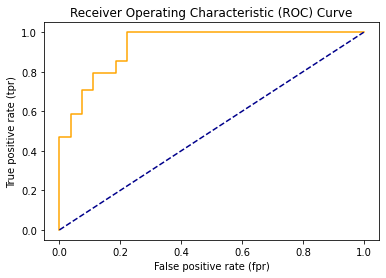

In [22]:
# ROC AUC Score
randomSearch_y_probability = randomSearch_clf.predict_proba(X_test)
randomSearch_y_probability_positive = randomSearch_y_probability[:, 1]

# Get fpr, tpr and thresholds
rs_fpr, rs_tpr, rs_thresholds = roc_curve(y_test, randomSearch_y_probability_positive)
roc_curve_plot(rs_fpr, rs_tpr)

In [23]:
randomSearch_roc_auc = roc_auc_score(y_test, randomSearch_y_probability_positive)
randomSearch_roc_auc

0.9335511982570806

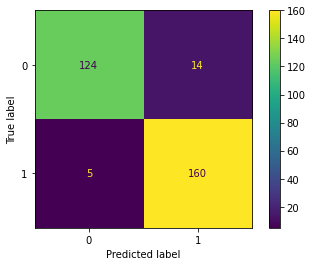

In [24]:
plot_confusion_matrix(randomSearch_clf, X, y)

#### `RandomizedSearchCV` Summary

In [25]:
print('The results on the RandomSearchCV RandomForestClassifier Model are as follows:\n')
print(f'Cross-Validated Accuracy: {np.mean(randomSearch_cvs)}')
print(f'AUC_ROC: {randomSearch_roc_auc}')
print(f'Metrics: {randomSearch_metrics}')
print(f'Cross Validated Metrics: {randomSearch_cross_val_metrics}')

The results on the RandomSearchCV RandomForestClassifier Model are as follows:

Cross-Validated Accuracy: 0.8283060109289618
AUC_ROC: 0.9335511982570806
Metrics: {'accuracy': 0.89, 'precision': 0.85, 'recall': 0.97, 'f1': 0.9}
Cross Validated Metrics: {'accuracy': 0.82, 'precision': 0.83, 'recall': 0.87, 'f1': 0.85}


####  1.2.2 `GridSearchCV`

In [26]:
np.random.seed(77)

# Use arange for n_estimators and max depth maybe
grid_grid = {'n_estimators': [100, 150, 200], 
          'max_depth': [5],
          'max_features': ['sqrt'],
          'min_samples_split': [2, 4],
          'min_samples_leaf': [2, 4, 6]}

# Creating Features Matrix and Labels
X = heart.drop("target", axis=1)
y = heart["target"]

# Normalizing the data
ss = StandardScaler()
X = ss.fit_transform(X)

# Splitting data into Train and Test splits (80% 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Instantiating our model
clf = RandomForestClassifier()

gridSearch_clf = GridSearchCV(estimator=clf,
                            param_grid=grid_grid, 
                            cv=5, # Automatically crossvalidates it for us
                            verbose=2)

# Fit the GridSearchCV version of clf
gridSearch_clf.fit(X_train, y_train);

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   38.8s finished


In [27]:
gridSearch_clf.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 100}

##### `GridSearchCV` Cross-Validated Accuracy

In [28]:
#Cross-val Accuracy
gridSearch_cvs = cross_val_score(gridSearch_clf, X, y, cv=5)
np.mean(gridSearch_cvs)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   38.3s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   37.8s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   38.8s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   39.3s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   38.1s finished


0.8249180327868852

##### `GridSearchCV` Metrics

In [29]:
# GridSearchCV Metrics
gridSearch_y_predictions = gridSearch_clf.predict(X_test)
gridSearch_metrics = model_prediction(y_test, gridSearch_y_predictions)

Accuracy: 86.89%
Precision: 84.21%
Recall: 94.12%
f1: 88.89%


##### `GridSearchCV` Cross-Validated Metrics

In [30]:
np.random.seed(77)

gridSearch_cross_val_metrics = cross_val_metrics(gridSearch_clf, X, y)
gridSearch_cross_val_metrics

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   38.5s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   37.7s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   38.4s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   38.4s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   38.1s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   38.7s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   37.7s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   37.8s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   38.0s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   38.1s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   38.3s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   38.0s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   38.1s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   37.7s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   37.7s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   38.0s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   38.6s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   38.4s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   37.9s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=150, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   38.1s finished


Accuracy: 85.47%
Precision: 82.54%
Recall: 87.88%
f1: 84.21%


{'accuracy': 0.85, 'precision': 0.83, 'recall': 0.88, 'f1': 0.84}

##### `GridSearchCV` ROC AUC Score

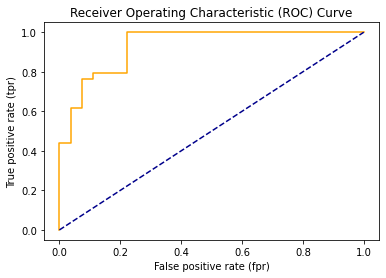

In [31]:

# ROC AUC Score
gridSearch_y_probability = gridSearch_clf.predict_proba(X_test)
gridSearch_y_probability_positive = gridSearch_y_probability[:, 1]

# Get fpr, tpr and thresholds
gs_fpr, gs_tpr, gs_thresholds = roc_curve(y_test, gridSearch_y_probability_positive)
roc_curve_plot(gs_fpr, gs_tpr)

In [32]:
gridSearch_roc_auc = roc_auc_score(y_test, gridSearch_y_probability_positive)
gridSearch_roc_auc

0.9335511982570806

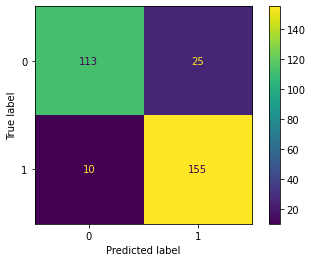

In [33]:
plot_confusion_matrix(gridSearch_clf, X, y)

#### `GridSearchCV` Summary

In [34]:
print('The results on the GridSearchCV RandomForestClassifier Model are as follows:\n')
print(f'Cross-Validated Accuracy: {np.mean(gridSearch_cvs)}')
print(f'AUC_ROC: {gridSearch_roc_auc}')
print(f'Metrics: {gridSearch_metrics}')
print(f'Cross-Validated Metrics: {gridSearch_cross_val_metrics}')

The results on the GridSearchCV RandomForestClassifier Model are as follows:

Cross-Validated Accuracy: 0.8249180327868852
AUC_ROC: 0.9335511982570806
Metrics: {'accuracy': 0.87, 'precision': 0.84, 'recall': 0.94, 'f1': 0.89}
Cross-Validated Metrics: {'accuracy': 0.85, 'precision': 0.83, 'recall': 0.88, 'f1': 0.84}


##  1.3 `RandomForestClassifier` Results Comparison

A comparison of all results gathered


Cross-Validated-Accuracy

In [35]:
print(f'Baseline CVS: {np.mean(cvs)}')
print(f'RandomSearch CVS: {np.mean(randomSearch_cvs)}')
print(f'GridSearch CVS: {np.mean(gridSearch_cvs)}')

Baseline CVS: 0.8348087431693989
RandomSearch CVS: 0.8283060109289618
GridSearch CVS: 0.8249180327868852


ROC AUC Score

In [36]:
print(f'Baseline ROC_AUC: {baseline_roc_auc}')
print(f'RandomSearch ROC_AUC: {randomSearch_roc_auc}')
print(f'GridSearch ROC_AUC: {gridSearch_roc_auc}')

Baseline ROC_AUC: 0.9183006535947712
RandomSearch ROC_AUC: 0.9335511982570806
GridSearch ROC_AUC: 0.9335511982570806


Metrics

In [37]:
print(f'Baseline Metrics: {baseline_metrics}')
print(f'Cross-Val Baseline Metrics {baseline_cross_val_metrics}')
print(f'Cross-Val RandomSearch Metrics: {randomSearch_cross_val_metrics}')
print(f'Cross Val GridSearch Metrics: {gridSearch_cross_val_metrics}')

Baseline Metrics: {'accuracy': 0.85, 'precision': 0.84, 'recall': 0.91, 'f1': 0.87}
Cross-Val Baseline Metrics {'accuracy': 0.83, 'precision': 0.82, 'recall': 0.87, 'f1': 0.84}
Cross-Val RandomSearch Metrics: {'accuracy': 0.82, 'precision': 0.83, 'recall': 0.87, 'f1': 0.85}
Cross Val GridSearch Metrics: {'accuracy': 0.85, 'precision': 0.83, 'recall': 0.88, 'f1': 0.84}


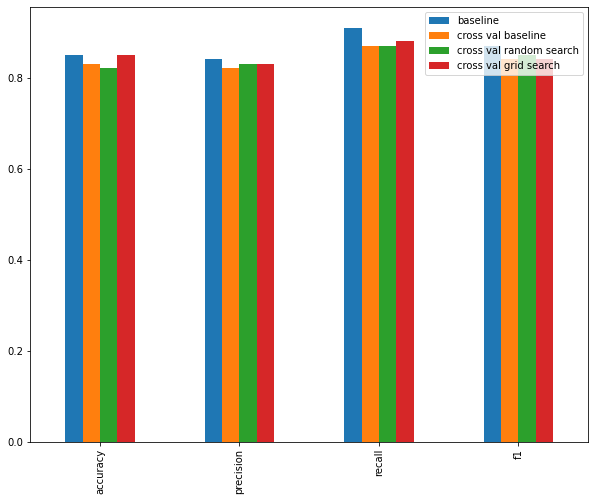

In [38]:
metrics_comparison = pd.DataFrame({"baseline": baseline_metrics,
                                   "cross val baseline": baseline_cross_val_metrics,
                                   "cross val random search": randomSearch_cross_val_metrics,
                                   "cross val grid search": gridSearch_cross_val_metrics}
                                  )

metrics_comparison.plot.bar(figsize=(10, 8));

##  2. `LogisticRegression`

In [39]:
from sklearn.linear_model import LogisticRegression

np.random.seed(77)

# Creating Features Matrix and Labels
X = heart.drop("target", axis=1)
y = heart["target"]

# Normalizing the data
ss = StandardScaler()
X = ss.fit_transform(X)

# Splitting data into Train and Test splits (80% 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiating our model
log_reg = LogisticRegression()

# Fitting our model
log_reg.fit(X_train, y_train)

LogisticRegression()

##  2.1 `LogisticRegression` Baseline

##### Cross-Validated Accuracy Score

In [41]:
np.random.seed(77)

baseline_log_reg_cvs = cross_val_score(log_reg, X, y, cv=5)
np.mean(baseline_log_reg_cvs)

print(f'The non cross-validated score for the baseline model is: {log_reg.score(X_test, y_test)}')
print(f'The cross-validated score for the baseline model is: {np.mean(baseline_log_reg_cvs)}')

The non cross-validated score for the baseline model is: 0.9016393442622951
The cross-validated score for the baseline model is: 0.8348633879781422


##### Area under Reciever Operating Characteristic Curve (AUC/ROC)

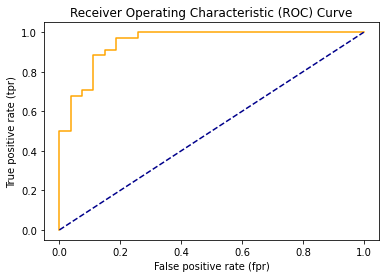

In [42]:
np.random.seed(77)

# Make predictions
y_predict = log_reg.predict(X_test)
y_probability = log_reg.predict_proba(X_test)
y_probability_positive = y_probability[:, 1]

# Get fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probability_positive)
roc_curve_plot(fpr, tpr)

In [43]:
baseline_log_reg_roc_auc = roc_auc_score(y_test, y_probability_positive)
baseline_log_reg_roc_auc

0.9488017429193899

##### Model Accuracy, Precision, Recall and F1 score with `sklearn.metrics`

In [44]:
baseline_log_reg_metrics = model_prediction(y_test, y_predict)
baseline_log_reg_metrics

Accuracy: 90.16%
Precision: 86.84%
Recall: 97.06%
f1: 91.67%


{'accuracy': 0.9, 'precision': 0.87, 'recall': 0.97, 'f1': 0.92}

##### Cross-Validated Metrics

In [46]:
baseline_cv_log_reg_metrics = cross_val_metrics(log_reg, X, y)
baseline_cv_log_reg_metrics

Accuracy: 83.49%
Precision: 82.51%
Recall: 89.09%
f1: 85.54%


{'accuracy': 0.83, 'precision': 0.83, 'recall': 0.89, 'f1': 0.86}

##### Confusion Matrix

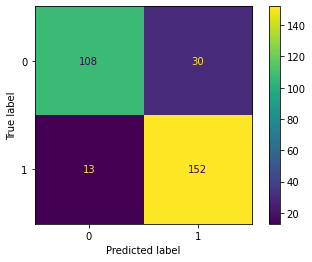

In [47]:
plot_confusion_matrix(log_reg, X, y)

##### Baseline Summary

In [48]:
print('The results on the baseline LogisticRegression Model are as follows:\n')
print(f'Cross-Validated Accuracy: {np.mean(baseline_log_reg_cvs)}')
print(f'AUC_ROC: {baseline_log_reg_roc_auc}')
print(f'Metrics: {baseline_log_reg_metrics}')
print(f'Cross-Validated Metrics: {baseline_cv_log_reg_metrics}')

The results on the baseline LogisticRegression Model are as follows:

Cross-Validated Accuracy: 0.8348633879781422
AUC_ROC: 0.9488017429193899
Metrics: {'accuracy': 0.9, 'precision': 0.87, 'recall': 0.97, 'f1': 0.92}
Cross-Validated Metrics: {'accuracy': 0.83, 'precision': 0.83, 'recall': 0.89, 'f1': 0.86}


##  2.2 `LogisticRegression` Hyperparameter adjustments/testing using `RandomizedSearchCV` and `GridSearchCV`

#####  2.2.1 `RandomizedSearchCV`

In [49]:
log_reg_random_grid = {"C": np.logspace(-5, 5, 20),
                       "solver": ["liblinear"]}

np.random.seed(77)

# Creating Features Matrix and Labels
X = heart.drop("target", axis=1)
y = heart["target"]

# Normalizing the data
ss = StandardScaler()
X = ss.fit_transform(X)

# Splitting data into Train and Test splits (80% 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiating our model
log_reg = LogisticRegression()

# Using RandomizedSearchCV
randomSearch_log_reg = RandomizedSearchCV(estimator=log_reg,
                            param_distributions=log_reg_random_grid, 
                            n_iter=10, 
                            cv=5, # Automatically crossvalidates it for us
                            verbose=2)
# Fitting our model
randomSearch_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] solver=liblinear, C=233.57214690901213 ..........................
[CV] ........... solver=liblinear, C=233.57214690901213, total=   0.1s
[CV] solver=liblinear, C=233.57214690901213 ..........................
[CV] ........... solver=liblinear, C=233.57214690901213, total=   0.0s
[CV] solver=liblinear, C=233.57214690901213 ..........................
[CV] ........... solver=liblinear, C=233.57214690901213, total=   0.0s
[CV] solver=liblinear, C=233.57214690901213 ..........................
[CV] ........... solver=liblinear, C=233.57214690901213, total=   0.0s
[CV] solver=liblinear, C=233.57214690901213 ..........................
[CV] ........... solver=liblinear, C=233.57214690901213, total=   0.0s
[CV] solver=liblinear, C=0.00011288378916846884 ......................
[CV] ....... solver=liblinear, C=0.00011288378916846884, total=   0.0s
[CV] solver=liblinear, C=0.00011288378916846884 ......................
[CV] ....... sol

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ....... solver=liblinear, C=0.00011288378916846884, total=   0.1s
[CV] solver=liblinear, C=0.00011288378916846884 ......................
[CV] ....... solver=liblinear, C=0.00011288378916846884, total=   0.0s
[CV] solver=liblinear, C=0.00011288378916846884 ......................
[CV] ....... solver=liblinear, C=0.00011288378916846884, total=   0.0s
[CV] solver=liblinear, C=1e-05 .......................................
[CV] ........................ solver=liblinear, C=1e-05, total=   0.0s
[CV] solver=liblinear, C=1e-05 .......................................
[CV] ........................ solver=liblinear, C=1e-05, total=   0.0s
[CV] solver=liblinear, C=1e-05 .......................................
[CV] ........................ solver=liblinear, C=1e-05, total=   0.0s
[CV] solver=liblinear, C=1e-05 .......................................
[CV] ........................ solver=liblinear, C=1e-05, total=   0.0s
[CV] solver=liblinear, C=1e-05 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05]),
                                        'solver': ['liblinear']},
                   verbose=2)

In [50]:
# Best parameters it found
randomSearch_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.1623776739188721}

##### `RandomizedSearchCV`  Cross-Validated Accuracy

In [51]:
randomSearch_log_reg_cvs = cross_val_score(randomSearch_log_reg, X, y, cv=5)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] solver=liblinear, C=0.000379269019073225 ........................
[CV] ......... solver=liblinear, C=0.000379269019073225, total=   0.0s
[CV] solver=liblinear, C=0.000379269019073225 ........................
[CV] ......... solver=liblinear, C=0.000379269019073225, total=   0.0s
[CV] solver=liblinear, C=0.000379269019073225 ........................
[CV] ......... solver=liblinear, C=0.000379269019073225, total=   0.0s
[CV] solver=liblinear, C=0.000379269019073225 ........................
[CV] ......... solver=liblinear, C=0.000379269019073225, total=   0.0s
[CV] solver=liblinear, C=0.000379269019073225 ........................
[CV] ......... solver=liblinear, C=0.000379269019073225, total=   0.0s
[CV] solver=liblinear, C=29763.51441631313 ...........................
[CV] ............ solver=liblinear, C=29763.51441631313, total=   0.0s
[CV] solver=liblinear, C=29763.51441631313 ...........................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......... solver=liblinear, C=0.01438449888287663, total=   0.0s
[CV] solver=liblinear, C=0.01438449888287663 .........................
[CV] .......... solver=liblinear, C=0.01438449888287663, total=   0.0s
[CV] solver=liblinear, C=0.01438449888287663 .........................
[CV] .......... solver=liblinear, C=0.01438449888287663, total=   0.0s
[CV] solver=liblinear, C=3.359818286283781e-05 .......................
[CV] ........ solver=liblinear, C=3.359818286283781e-05, total=   0.0s
[CV] solver=liblinear, C=3.359818286283781e-05 .......................
[CV] ........ solver=liblinear, C=3.359818286283781e-05, total=   0.0s
[CV] solver=liblinear, C=3.359818286283781e-05 .......................
[CV] ........ solver=liblinear, C=3.359818286283781e-05, total=   0.0s
[CV] solver=liblinear, C=3.359818286283781e-05 .......................
[CV] ........ solver=liblinear, C=3.359818286283781e-05, total=   0.0s
[CV] solver=liblinear, C=3.359818286283781e-05 .......................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........ solver=liblinear, C=3.359818286283781e-05, total=   0.0s
[CV] solver=liblinear, C=3.359818286283781e-05 .......................
[CV] ........ solver=liblinear, C=3.359818286283781e-05, total=   0.0s
[CV] solver=liblinear, C=3.359818286283781e-05 .......................
[CV] ........ solver=liblinear, C=3.359818286283781e-05, total=   0.0s
[CV] solver=liblinear, C=3.359818286283781e-05 .......................
[CV] ........ solver=liblinear, C=3.359818286283781e-05, total=   0.0s
[CV] solver=liblinear, C=3.359818286283781e-05 .......................
[CV] ........ solver=liblinear, C=3.359818286283781e-05, total=   0.0s
[CV] solver=liblinear, C=0.5455594781168515 ..........................
[CV] ........... solver=liblinear, C=0.5455594781168515, total=   0.0s
[CV] solver=liblinear, C=0.5455594781168515 ..........................
[CV] ........... solver=liblinear, C=0.5455594781168515, total=   0.0s
[CV] solver=liblinear, C=0.5455594781168515 ..........................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............ solver=liblinear, C=29763.51441631313, total=   0.0s
[CV] solver=liblinear, C=29763.51441631313 ...........................
[CV] ............ solver=liblinear, C=29763.51441631313, total=   0.0s
[CV] solver=liblinear, C=29763.51441631313 ...........................
[CV] ............ solver=liblinear, C=29763.51441631313, total=   0.0s
[CV] solver=liblinear, C=0.04832930238571752 .........................
[CV] .......... solver=liblinear, C=0.04832930238571752, total=   0.0s
[CV] solver=liblinear, C=0.04832930238571752 .........................
[CV] .......... solver=liblinear, C=0.04832930238571752, total=   0.0s
[CV] solver=liblinear, C=0.04832930238571752 .........................
[CV] .......... solver=liblinear, C=0.04832930238571752, total=   0.0s
[CV] solver=liblinear, C=0.04832930238571752 .........................
[CV] .......... solver=liblinear, C=0.04832930238571752, total=   0.0s
[CV] solver=liblinear, C=0.04832930238571752 .........................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........ solver=liblinear, C=3.359818286283781e-05, total=   0.0s
[CV] solver=liblinear, C=3.359818286283781e-05 .......................
[CV] ........ solver=liblinear, C=3.359818286283781e-05, total=   0.0s
[CV] solver=liblinear, C=3.359818286283781e-05 .......................
[CV] ........ solver=liblinear, C=3.359818286283781e-05, total=   0.0s
[CV] solver=liblinear, C=0.0012742749857031334 .......................
[CV] ........ solver=liblinear, C=0.0012742749857031334, total=   0.0s
[CV] solver=liblinear, C=0.0012742749857031334 .......................
[CV] ........ solver=liblinear, C=0.0012742749857031334, total=   0.0s
[CV] solver=liblinear, C=0.0012742749857031334 .......................
[CV] ........ solver=liblinear, C=0.0012742749857031334, total=   0.0s
[CV] solver=liblinear, C=0.0012742749857031334 .......................
[CV] ........ solver=liblinear, C=0.0012742749857031334, total=   0.0s
[CV] solver=liblinear, C=0.0012742749857031334 .......................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] solver=liblinear, C=0.000379269019073225 ........................
[CV] ......... solver=liblinear, C=0.000379269019073225, total=   0.0s
[CV] solver=liblinear, C=0.000379269019073225 ........................
[CV] ......... solver=liblinear, C=0.000379269019073225, total=   0.0s
[CV] solver=liblinear, C=0.000379269019073225 ........................
[CV] ......... solver=liblinear, C=0.000379269019073225, total=   0.0s
[CV] solver=liblinear, C=0.000379269019073225 ........................
[CV] ......... solver=liblinear, C=0.000379269019073225, total=   0.0s
[CV] solver=liblinear, C=0.000379269019073225 ........................
[CV] ......... solver=liblinear, C=0.000379269019073225, total=   0.0s
[CV] solver=liblinear, C=69.51927961775606 ...........................
[CV] ............ solver=liblinear, C=69.51927961775606, total=   0.0s
[CV] solver=liblinear, C=69.51927961775606 ...........................
[CV] ............ solver=liblinear, C=69.51927961775606, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


In [53]:
np.mean(randomSearch_log_reg_cvs)

0.8281967213114754

##### `RandomizedSearchCV` Metrics

In [54]:
randomSearch_log_reg_y_preds = randomSearch_log_reg.predict(X_test)
randomSearch_log_reg_metrics = model_prediction(y_test, randomSearch_log_reg_y_preds)

Accuracy: 90.16%
Precision: 86.84%
Recall: 97.06%
f1: 91.67%


In [55]:
randomSearch_log_reg_cv_metrics = cross_val_metrics(randomSearch_log_reg, X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] solver=liblinear, C=0.0012742749857031334 .......................
[CV] ........ solver=liblinear, C=0.0012742749857031334, total=   0.0s
[CV] solver=liblinear, C=0.0012742749857031334 .......................
[CV] ........ solver=liblinear, C=0.0012742749857031334, total=   0.0s
[CV] solver=liblinear, C=0.0012742749857031334 .......................
[CV] ........ solver=liblinear, C=0.0012742749857031334, total=   0.0s
[CV] solver=liblinear, C=0.0012742749857031334 .......................
[CV] ........ solver=liblinear, C=0.0012742749857031334, total=   0.0s
[CV] solver=liblinear, C=0.0012742749857031334 .......................
[CV] ........ solver=liblinear, C=0.0012742749857031334, total=   0.0s
[CV] solver=liblinear, C=0.000379269019073225 ........................
[CV] ......... solver=liblinear, C=0.000379269019073225, total=   0.0s
[CV] solver=liblinear, C=0.000379269019073225 ........................
[CV] ......... s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............. solver=liblinear, C=20.6913808111479, total=   0.0s
[CV] solver=liblinear, C=20.6913808111479 ............................
[CV] ............. solver=liblinear, C=20.6913808111479, total=   0.0s
[CV] solver=liblinear, C=20.6913808111479 ............................
[CV] ............. solver=liblinear, C=20.6913808111479, total=   0.0s
[CV] solver=liblinear, C=20.6913808111479 ............................
[CV] ............. solver=liblinear, C=20.6913808111479, total=   0.0s
[CV] solver=liblinear, C=20.6913808111479 ............................
[CV] ............. solver=liblinear, C=20.6913808111479, total=   0.0s
[CV] solver=liblinear, C=0.04832930238571752 .........................
[CV] .......... solver=liblinear, C=0.04832930238571752, total=   0.0s
[CV] solver=liblinear, C=0.04832930238571752 .........................
[CV] .......... solver=liblinear, C=0.04832930238571752, total=   0.0s
[CV] solver=liblinear, C=0.04832930238571752 .........................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........... solver=liblinear, C=233.57214690901213, total=   0.0s
[CV] solver=liblinear, C=233.57214690901213 ..........................
[CV] ........... solver=liblinear, C=233.57214690901213, total=   0.0s
[CV] solver=liblinear, C=233.57214690901213 ..........................
[CV] ........... solver=liblinear, C=233.57214690901213, total=   0.0s
[CV] solver=liblinear, C=233.57214690901213 ..........................
[CV] ........... solver=liblinear, C=233.57214690901213, total=   0.0s
[CV] solver=liblinear, C=233.57214690901213 ..........................
[CV] ........... solver=liblinear, C=233.57214690901213, total=   0.0s
[CV] solver=liblinear, C=0.00011288378916846884 ......................
[CV] ....... solver=liblinear, C=0.00011288378916846884, total=   0.0s
[CV] solver=liblinear, C=0.00011288378916846884 ......................
[CV] ....... solver=liblinear, C=0.00011288378916846884, total=   0.0s
[CV] solver=liblinear, C=0.00011288378916846884 ......................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......... solver=liblinear, C=0.01438449888287663, total=   0.0s
[CV] solver=liblinear, C=0.01438449888287663 .........................
[CV] .......... solver=liblinear, C=0.01438449888287663, total=   0.0s
[CV] solver=liblinear, C=0.01438449888287663 .........................
[CV] .......... solver=liblinear, C=0.01438449888287663, total=   0.0s
[CV] solver=liblinear, C=0.01438449888287663 .........................
[CV] .......... solver=liblinear, C=0.01438449888287663, total=   0.0s
[CV] solver=liblinear, C=0.04832930238571752 .........................
[CV] .......... solver=liblinear, C=0.04832930238571752, total=   0.0s
[CV] solver=liblinear, C=0.04832930238571752 .........................
[CV] .......... solver=liblinear, C=0.04832930238571752, total=   0.0s
[CV] solver=liblinear, C=0.04832930238571752 .........................
[CV] .......... solver=liblinear, C=0.04832930238571752, total=   0.0s
[CV] solver=liblinear, C=0.04832930238571752 .........................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......... solver=liblinear, C=0.01438449888287663, total=   0.0s
[CV] solver=liblinear, C=0.1623776739188721 ..........................
[CV] ........... solver=liblinear, C=0.1623776739188721, total=   0.0s
[CV] solver=liblinear, C=0.1623776739188721 ..........................
[CV] ........... solver=liblinear, C=0.1623776739188721, total=   0.0s
[CV] solver=liblinear, C=0.1623776739188721 ..........................
[CV] ........... solver=liblinear, C=0.1623776739188721, total=   0.0s
[CV] solver=liblinear, C=0.1623776739188721 ..........................
[CV] ........... solver=liblinear, C=0.1623776739188721, total=   0.0s
[CV] solver=liblinear, C=0.1623776739188721 ..........................
[CV] ........... solver=liblinear, C=0.1623776739188721, total=   0.0s
[CV] solver=liblinear, C=0.004281332398719391 ........................
[CV] ......... solver=liblinear, C=0.004281332398719391, total=   0.0s
[CV] solver=liblinear, C=0.004281332398719391 ........................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] solver=liblinear, C=2636.6508987303555 ..........................
[CV] ........... solver=liblinear, C=2636.6508987303555, total=   0.0s
[CV] solver=liblinear, C=2636.6508987303555 ..........................
[CV] ........... solver=liblinear, C=2636.6508987303555, total=   0.0s
[CV] solver=liblinear, C=2636.6508987303555 ..........................
[CV] ........... solver=liblinear, C=2636.6508987303555, total=   0.0s
[CV] solver=liblinear, C=2636.6508987303555 ..........................
[CV] ........... solver=liblinear, C=2636.6508987303555, total=   0.0s
[CV] solver=liblinear, C=2636.6508987303555 ..........................
[CV] ........... solver=liblinear, C=2636.6508987303555, total=   0.0s
[CV] solver=liblinear, C=784.7599703514607 ...........................
[CV] ............ solver=liblinear, C=784.7599703514607, total=   0.0s
[CV] solver=liblinear, C=784.7599703514607 ...........................
[CV] ............ solver=liblinear, C=784.7599703514607, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] solver=liblinear, C=0.0012742749857031334 .......................
[CV] ........ solver=liblinear, C=0.0012742749857031334, total=   0.0s
[CV] solver=liblinear, C=0.5455594781168515 ..........................
[CV] ........... solver=liblinear, C=0.5455594781168515, total=   0.0s
[CV] solver=liblinear, C=0.5455594781168515 ..........................
[CV] ........... solver=liblinear, C=0.5455594781168515, total=   0.0s
[CV] solver=liblinear, C=0.5455594781168515 ..........................
[CV] ........... solver=liblinear, C=0.5455594781168515, total=   0.0s
[CV] solver=liblinear, C=0.5455594781168515 ..........................
[CV] ........... solver=liblinear, C=0.5455594781168515, total=   0.0s
[CV] solver=liblinear, C=0.5455594781168515 ..........................
[CV] ........... solver=liblinear, C=0.5455594781168515, total=   0.0s
[CV] solver=liblinear, C=0.00011288378916846884 ......................
[CV] ....... solver=liblinear, C=0.00011288378916846884, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............ solver=liblinear, C=8858.667904100832, total=   0.0s
[CV] solver=liblinear, C=8858.667904100832 ...........................
[CV] ............ solver=liblinear, C=8858.667904100832, total=   0.0s
[CV] solver=liblinear, C=8858.667904100832 ...........................
[CV] ............ solver=liblinear, C=8858.667904100832, total=   0.0s
[CV] solver=liblinear, C=8858.667904100832 ...........................
[CV] ............ solver=liblinear, C=8858.667904100832, total=   0.0s
[CV] solver=liblinear, C=8858.667904100832 ...........................
[CV] ............ solver=liblinear, C=8858.667904100832, total=   0.0s
[CV] solver=liblinear, C=0.0012742749857031334 .......................
[CV] ........ solver=liblinear, C=0.0012742749857031334, total=   0.0s
[CV] solver=liblinear, C=0.0012742749857031334 .......................
[CV] ........ solver=liblinear, C=0.0012742749857031334, total=   0.0s
[CV] solver=liblinear, C=0.0012742749857031334 .......................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ......... solver=liblinear, C=0.000379269019073225, total=   0.0s
[CV] solver=liblinear, C=0.000379269019073225 ........................
[CV] ......... solver=liblinear, C=0.000379269019073225, total=   0.0s
[CV] solver=liblinear, C=0.000379269019073225 ........................
[CV] ......... solver=liblinear, C=0.000379269019073225, total=   0.0s
[CV] solver=liblinear, C=0.000379269019073225 ........................
[CV] ......... solver=liblinear, C=0.000379269019073225, total=   0.0s
[CV] solver=liblinear, C=0.000379269019073225 ........................
[CV] ......... solver=liblinear, C=0.000379269019073225, total=   0.0s
[CV] solver=liblinear, C=100000.0 ....................................
[CV] ..................... solver=liblinear, C=100000.0, total=   0.0s
[CV] solver=liblinear, C=100000.0 ....................................
[CV] ..................... solver=liblinear, C=100000.0, total=   0.0s
[CV] solver=liblinear, C=100000.0 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] ............. solver=liblinear, C=20.6913808111479, total=   0.0s
[CV] solver=liblinear, C=784.7599703514607 ...........................
[CV] ............ solver=liblinear, C=784.7599703514607, total=   0.0s
[CV] solver=liblinear, C=784.7599703514607 ...........................
[CV] ............ solver=liblinear, C=784.7599703514607, total=   0.0s
[CV] solver=liblinear, C=784.7599703514607 ...........................
[CV] ............ solver=liblinear, C=784.7599703514607, total=   0.0s
[CV] solver=liblinear, C=784.7599703514607 ...........................
[CV] ............ solver=liblinear, C=784.7599703514607, total=   0.0s
[CV] solver=liblinear, C=784.7599703514607 ...........................
[CV] ............ solver=liblinear, C=784.7599703514607, total=   0.0s
[CV] solver=liblinear, C=29763.51441631313 ...........................
[CV] ............ solver=liblinear, C=29763.51441631313, total=   0.0s
[CV] solver=liblinear, C=29763.51441631313 ...........................
[CV] 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ......... solver=liblinear, C=0.000379269019073225, total=   0.0s
[CV] solver=liblinear, C=0.000379269019073225 ........................
[CV] ......... solver=liblinear, C=0.000379269019073225, total=   0.0s
[CV] solver=liblinear, C=3.359818286283781e-05 .......................
[CV] ........ solver=liblinear, C=3.359818286283781e-05, total=   0.0s
[CV] solver=liblinear, C=3.359818286283781e-05 .......................
[CV] ........ solver=liblinear, C=3.359818286283781e-05, total=   0.0s
[CV] solver=liblinear, C=3.359818286283781e-05 .......................
[CV] ........ solver=liblinear, C=3.359818286283781e-05, total=   0.0s
[CV] solver=liblinear, C=3.359818286283781e-05 .......................
[CV] ........ solver=liblinear, C=3.359818286283781e-05, total=   0.0s
[CV] solver=liblinear, C=3.359818286283781e-05 .......................
[CV] ........ solver=liblinear, C=3.359818286283781e-05, total=   0.0s
[CV] solver=liblinear, C=8858.667904100832 ...........................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] solver=liblinear, C=29763.51441631313 ...........................
[CV] ............ solver=liblinear, C=29763.51441631313, total=   0.0s
[CV] solver=liblinear, C=29763.51441631313 ...........................
[CV] ............ solver=liblinear, C=29763.51441631313, total=   0.0s
[CV] solver=liblinear, C=29763.51441631313 ...........................
[CV] ............ solver=liblinear, C=29763.51441631313, total=   0.0s
[CV] solver=liblinear, C=29763.51441631313 ...........................
[CV] ............ solver=liblinear, C=29763.51441631313, total=   0.0s
[CV] solver=liblinear, C=0.004281332398719391 ........................
[CV] ......... solver=liblinear, C=0.004281332398719391, total=   0.0s
[CV] solver=liblinear, C=0.004281332398719391 ........................
[CV] ......... solver=liblinear, C=0.004281332398719391, total=   0.0s
[CV] solver=liblinear, C=0.004281332398719391 ........................
[CV] ......... solver=liblinear, C=0.004281332398719391, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] ....... solver=liblinear, C=0.00011288378916846884, total=   0.0s
[CV] solver=liblinear, C=29763.51441631313 ...........................
[CV] ............ solver=liblinear, C=29763.51441631313, total=   0.0s
[CV] solver=liblinear, C=29763.51441631313 ...........................
[CV] ............ solver=liblinear, C=29763.51441631313, total=   0.0s
[CV] solver=liblinear, C=29763.51441631313 ...........................
[CV] ............ solver=liblinear, C=29763.51441631313, total=   0.0s
[CV] solver=liblinear, C=29763.51441631313 ...........................
[CV] ............ solver=liblinear, C=29763.51441631313, total=   0.0s
[CV] solver=liblinear, C=29763.51441631313 ...........................
[CV] ............ solver=liblinear, C=29763.51441631313, total=   0.0s
[CV] solver=liblinear, C=8858.667904100832 ...........................
[CV] ............ solver=liblinear, C=8858.667904100832, total=   0.0s
[CV] solver=liblinear, C=8858.667904100832 ...........................
[CV] 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] solver=liblinear, C=233.57214690901213 ..........................
[CV] ........... solver=liblinear, C=233.57214690901213, total=   0.0s
[CV] solver=liblinear, C=233.57214690901213 ..........................
[CV] ........... solver=liblinear, C=233.57214690901213, total=   0.0s
[CV] solver=liblinear, C=233.57214690901213 ..........................
[CV] ........... solver=liblinear, C=233.57214690901213, total=   0.0s
[CV] solver=liblinear, C=233.57214690901213 ..........................
[CV] ........... solver=liblinear, C=233.57214690901213, total=   0.0s
[CV] solver=liblinear, C=0.04832930238571752 .........................
[CV] .......... solver=liblinear, C=0.04832930238571752, total=   0.0s
[CV] solver=liblinear, C=0.04832930238571752 .........................
[CV] .......... solver=liblinear, C=0.04832930238571752, total=   0.0s
[CV] solver=liblinear, C=0.04832930238571752 .........................
[CV] .......... solver=liblinear, C=0.04832930238571752, total=   0.0s
[CV] s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........... solver=liblinear, C=2636.6508987303555, total=   0.0s
[CV] solver=liblinear, C=100000.0 ....................................
[CV] ..................... solver=liblinear, C=100000.0, total=   0.0s
[CV] solver=liblinear, C=100000.0 ....................................
[CV] ..................... solver=liblinear, C=100000.0, total=   0.0s
[CV] solver=liblinear, C=100000.0 ....................................
[CV] ..................... solver=liblinear, C=100000.0, total=   0.0s
[CV] solver=liblinear, C=100000.0 ....................................
[CV] ..................... solver=liblinear, C=100000.0, total=   0.0s
[CV] solver=liblinear, C=100000.0 ....................................
[CV] ..................... solver=liblinear, C=100000.0, total=   0.0s
[CV] solver=liblinear, C=69.51927961775606 ...........................
[CV] ............ solver=liblinear, C=69.51927961775606, total=   0.0s
[CV] solver=liblinear, C=69.51927961775606 ...........................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........ solver=liblinear, C=0.0012742749857031334, total=   0.0s
[CV] solver=liblinear, C=0.004281332398719391 ........................
[CV] ......... solver=liblinear, C=0.004281332398719391, total=   0.0s
[CV] solver=liblinear, C=0.004281332398719391 ........................
[CV] ......... solver=liblinear, C=0.004281332398719391, total=   0.0s
[CV] solver=liblinear, C=0.004281332398719391 ........................
[CV] ......... solver=liblinear, C=0.004281332398719391, total=   0.0s
[CV] solver=liblinear, C=0.004281332398719391 ........................
[CV] ......... solver=liblinear, C=0.004281332398719391, total=   0.0s
[CV] solver=liblinear, C=0.004281332398719391 ........................
[CV] ......... solver=liblinear, C=0.004281332398719391, total=   0.0s
[CV] solver=liblinear, C=0.00011288378916846884 ......................
[CV] ....... solver=liblinear, C=0.00011288378916846884, total=   0.0s
[CV] solver=liblinear, C=0.00011288378916846884 ......................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] solver=liblinear, C=0.5455594781168515 ..........................
[CV] ........... solver=liblinear, C=0.5455594781168515, total=   0.0s
[CV] solver=liblinear, C=0.1623776739188721 ..........................
[CV] ........... solver=liblinear, C=0.1623776739188721, total=   0.0s
[CV] solver=liblinear, C=0.1623776739188721 ..........................
[CV] ........... solver=liblinear, C=0.1623776739188721, total=   0.0s
[CV] solver=liblinear, C=0.1623776739188721 ..........................
[CV] ........... solver=liblinear, C=0.1623776739188721, total=   0.0s
[CV] solver=liblinear, C=0.1623776739188721 ..........................
[CV] ........... solver=liblinear, C=0.1623776739188721, total=   0.0s
[CV] solver=liblinear, C=0.1623776739188721 ..........................
[CV] ........... solver=liblinear, C=0.1623776739188721, total=   0.0s
[CV] solver=liblinear, C=1e-05 .......................................
[CV] ........................ solver=liblinear, C=1e-05, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] solver=liblinear, C=0.00011288378916846884 ......................
[CV] ....... solver=liblinear, C=0.00011288378916846884, total=   0.0s
[CV] solver=liblinear, C=0.00011288378916846884 ......................
[CV] ....... solver=liblinear, C=0.00011288378916846884, total=   0.0s
[CV] solver=liblinear, C=0.000379269019073225 ........................
[CV] ......... solver=liblinear, C=0.000379269019073225, total=   0.0s
[CV] solver=liblinear, C=0.000379269019073225 ........................
[CV] ......... solver=liblinear, C=0.000379269019073225, total=   0.0s
[CV] solver=liblinear, C=0.000379269019073225 ........................
[CV] ......... solver=liblinear, C=0.000379269019073225, total=   0.0s
[CV] solver=liblinear, C=0.000379269019073225 ........................
[CV] ......... solver=liblinear, C=0.000379269019073225, total=   0.0s
[CV] solver=liblinear, C=0.000379269019073225 ........................
[CV] ......... solver=liblinear, C=0.000379269019073225, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ......... solver=liblinear, C=0.004281332398719391, total=   0.0s
[CV] solver=liblinear, C=0.004281332398719391 ........................
[CV] ......... solver=liblinear, C=0.004281332398719391, total=   0.0s
[CV] solver=liblinear, C=0.000379269019073225 ........................
[CV] ......... solver=liblinear, C=0.000379269019073225, total=   0.0s
[CV] solver=liblinear, C=0.000379269019073225 ........................
[CV] ......... solver=liblinear, C=0.000379269019073225, total=   0.0s
[CV] solver=liblinear, C=0.000379269019073225 ........................
[CV] ......... solver=liblinear, C=0.000379269019073225, total=   0.0s
[CV] solver=liblinear, C=0.000379269019073225 ........................
[CV] ......... solver=liblinear, C=0.000379269019073225, total=   0.0s
[CV] solver=liblinear, C=0.000379269019073225 ........................
[CV] ......... solver=liblinear, C=0.000379269019073225, total=   0.0s
[CV] solver=liblinear, C=20.6913808111479 ............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] solver=liblinear, C=6.1584821106602545 ..........................
[CV] ........... solver=liblinear, C=6.1584821106602545, total=   0.0s
[CV] solver=liblinear, C=6.1584821106602545 ..........................
[CV] ........... solver=liblinear, C=6.1584821106602545, total=   0.0s
[CV] solver=liblinear, C=6.1584821106602545 ..........................
[CV] ........... solver=liblinear, C=6.1584821106602545, total=   0.0s
[CV] solver=liblinear, C=784.7599703514607 ...........................
[CV] ............ solver=liblinear, C=784.7599703514607, total=   0.0s
[CV] solver=liblinear, C=784.7599703514607 ...........................
[CV] ............ solver=liblinear, C=784.7599703514607, total=   0.0s
[CV] solver=liblinear, C=784.7599703514607 ...........................
[CV] ............ solver=liblinear, C=784.7599703514607, total=   0.0s
[CV] solver=liblinear, C=784.7599703514607 ...........................
[CV] ............ solver=liblinear, C=784.7599703514607, total=   0.0s
[CV] s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........ solver=liblinear, C=3.359818286283781e-05, total=   0.0s
[CV] solver=liblinear, C=3.359818286283781e-05 .......................
[CV] ........ solver=liblinear, C=3.359818286283781e-05, total=   0.0s
[CV] solver=liblinear, C=3.359818286283781e-05 .......................
[CV] ........ solver=liblinear, C=3.359818286283781e-05, total=   0.0s
[CV] solver=liblinear, C=3.359818286283781e-05 .......................
[CV] ........ solver=liblinear, C=3.359818286283781e-05, total=   0.0s
[CV] solver=liblinear, C=0.000379269019073225 ........................
[CV] ......... solver=liblinear, C=0.000379269019073225, total=   0.0s
[CV] solver=liblinear, C=0.000379269019073225 ........................
[CV] ......... solver=liblinear, C=0.000379269019073225, total=   0.0s
[CV] solver=liblinear, C=0.000379269019073225 ........................
[CV] ......... solver=liblinear, C=0.000379269019073225, total=   0.0s
[CV] solver=liblinear, C=0.000379269019073225 ........................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


##### Cross-Validated Metrics

In [56]:
randomSearch_log_reg_cv_metrics

{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

##### Area under Reciever Operating Characteristic Curve (AUC/ROC)

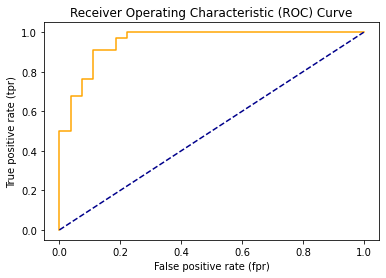

In [57]:
# Make predictions
y_probability = randomSearch_log_reg.predict_proba(X_test)
y_probability_positive = y_probability[:, 1]

# Get fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probability_positive)
roc_curve_plot(fpr, tpr)

In [58]:
randomSearch_log_reg_roc_auc = roc_auc_score(y_test, y_probability_positive)
randomSearch_log_reg_roc_auc

0.9531590413943355

##### Confusion Matrix

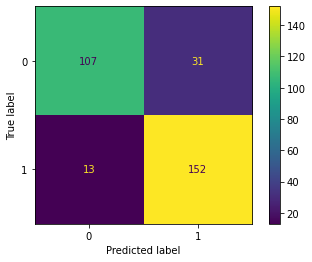

In [59]:
plot_confusion_matrix(randomSearch_log_reg, X, y)

##### `RandomizedSearchCV` Summary

In [60]:
print('The results on the RandomizedSearchCV LogisticRegression Model are as follows:\n')
print(f'Cross-Validated Accuracy: {np.mean(randomSearch_log_reg_cvs)}')
print(f'AUC_ROC: {randomSearch_log_reg_roc_auc}')
print(f'Metrics: {randomSearch_log_reg_metrics}')
print(f'CV Metrics: {randomSearch_log_reg_cv_metrics}')

The results on the RandomizedSearchCV LogisticRegression Model are as follows:

Cross-Validated Accuracy: 0.8281967213114754
AUC_ROC: 0.9531590413943355
Metrics: {'accuracy': 0.9, 'precision': 0.87, 'recall': 0.97, 'f1': 0.92}
CV Metrics: {'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}


##### 2.2.2 `GridSearchCV`

In [61]:
np.random.seed(77)

log_reg_grid = {"C": np.logspace(-5, 5, 30),
                "solver": ["liblinear"]}

# Creating Features Matrix and Labels
X = heart.drop("target", axis=1)
y = heart["target"]

# Normalizing the data
ss = StandardScaler()
X = ss.fit_transform(X)

# Splitting data into Train and Test splits (80% 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Setup grid hyperparameter search for LogReg
gridSearch_log_reg = GridSearchCV(LogisticRegression(),
                                  param_grid=log_reg_grid,
                                  cv=5,
                                  verbose=True)

# Fit our grid hyperparameter search model
gridSearch_log_reg.fit(X_train, y_train) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 2.21221629e-05, 4.89390092e-05, 1.08263673e-04,
       2.39502662e-04, 5.29831691e-04, 1.17210230e-03, 2.59294380e-03,
       5.73615251e-03, 1.26896100e-02, 2.80721620e-02, 6.21016942e-02,
       1.37382380e-01, 3.03919538e-01, 6.72335754e-01, 1.48735211e+00,
       3.29034456e+00, 7.27895384e+00, 1.61026203e+01, 3.56224789e+01,
       7.88046282e+01, 1.74332882e+02, 3.85662042e+02, 8.53167852e+02,
       1.88739182e+03, 4.17531894e+03, 9.23670857e+03, 2.04335972e+04,
       4.52035366e+04, 1.00000000e+05]),
                         'solver': ['liblinear']},
             verbose=True)

In [62]:
gridSearch_log_reg.best_params_

{'C': 0.028072162039411784, 'solver': 'liblinear'}

##### `GridSearchCV` Cross-Validated Accuracy

In [63]:
gridSearch_log_reg_cvs = cross_val_score(gridSearch_log_reg, X, y, cv=5)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished


In [64]:
np.mean(gridSearch_log_reg_cvs)

0.8249180327868852

##### `GridSearchCV` Metrics

In [65]:
gridSearch_log_reg_y_preds = gridSearch_log_reg.predict(X_test)
gridSearch_log_reg_metrics = model_prediction(y_test, gridSearch_log_reg_y_preds)

Accuracy: 88.52%
Precision: 84.62%
Recall: 97.06%
f1: 90.41%


##### `GridSearchCV` Cross-Validated Metrics

In [66]:
gridSearch_log_reg_cv_metrics = cross_val_metrics(gridSearch_log_reg, X, y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Accuracy: 82.49%
Precision: 81.35%
Recall: 88.48%
f1: 84.70%


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished


In [67]:
gridSearch_log_reg_cv_metrics

{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

##### Area under Reciever Operating Characteristic Curve (AUC/ROC)

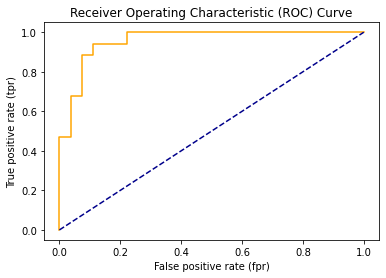

In [68]:
# Make predictions
y_predict = gridSearch_log_reg.predict(X_test)
y_probability = gridSearch_log_reg.predict_proba(X_test)
y_probability_positive = y_probability[:, 1]

# Get fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probability_positive)
roc_curve_plot(fpr, tpr)

In [69]:
gridSearch_log_reg_roc_auc = roc_auc_score(y_test, y_probability_positive)
gridSearch_log_reg_roc_auc

0.957516339869281

##### Confusion Matrix

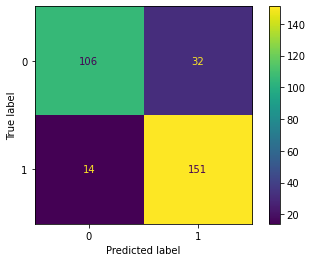

In [70]:
plot_confusion_matrix(gridSearch_log_reg, X, y);

##### `GridSearchCV` Summary

In [71]:
print('The results on the gridSearchCV LogisticRegression Model are as follows:\n')
print(f'Cross-Validated Accuracy: {np.mean(gridSearch_log_reg_cvs)}')
print(f'AUC_ROC: {gridSearch_log_reg_roc_auc}')
print(f'Metrics: {gridSearch_log_reg_metrics}')
print(f'CV Metrics: {gridSearch_log_reg_cv_metrics}')

The results on the gridSearchCV LogisticRegression Model are as follows:

Cross-Validated Accuracy: 0.8249180327868852
AUC_ROC: 0.957516339869281
Metrics: {'accuracy': 0.89, 'precision': 0.85, 'recall': 0.97, 'f1': 0.9}
CV Metrics: {'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}


## 2.3 `LogisticRegression` Results Comparison
A comparison of all results gathered

Cross-Validated Accuracy

In [72]:
print(f'Baseline CVS: {np.mean(baseline_log_reg_cvs)}')
print(f'RandomSearch CVS: {np.mean(randomSearch_log_reg_cvs)}')
print(f'GridSearch CVS: {np.mean(gridSearch_log_reg_cvs)}')

Baseline CVS: 0.8348633879781422
RandomSearch CVS: 0.8281967213114754
GridSearch CVS: 0.8249180327868852


ROC AUC Score

In [73]:
print(f'Baseline ROC_AUC: {baseline_log_reg_roc_auc}')
print(f'RandomSearch ROC_AUC: {randomSearch_log_reg_roc_auc}')
print(f'GridSearch ROC_AUC: {gridSearch_log_reg_roc_auc}')

Baseline ROC_AUC: 0.9488017429193899
RandomSearch ROC_AUC: 0.9531590413943355
GridSearch ROC_AUC: 0.957516339869281


Metrics

In [74]:
print(f'Baseline Metrics: {baseline_log_reg_metrics}')
print(f'Cross-Val Baseline Metrics {baseline_cv_log_reg_metrics}')
print(f'RandomSearch Metrics: {randomSearch_log_reg_metrics}')
print(f'Cross-Val RandomSearch Metrics {randomSearch_log_reg_cv_metrics}')
print(f'GridSearch Metrics: {gridSearch_log_reg_metrics}')
print(f'Cross-Val GridSearch Metrics {gridSearch_log_reg_cv_metrics}')

Baseline Metrics: {'accuracy': 0.9, 'precision': 0.87, 'recall': 0.97, 'f1': 0.92}
Cross-Val Baseline Metrics {'accuracy': 0.83, 'precision': 0.83, 'recall': 0.89, 'f1': 0.86}
RandomSearch Metrics: {'accuracy': 0.9, 'precision': 0.87, 'recall': 0.97, 'f1': 0.92}
Cross-Val RandomSearch Metrics {'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}
GridSearch Metrics: {'accuracy': 0.89, 'precision': 0.85, 'recall': 0.97, 'f1': 0.9}
Cross-Val GridSearch Metrics {'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}


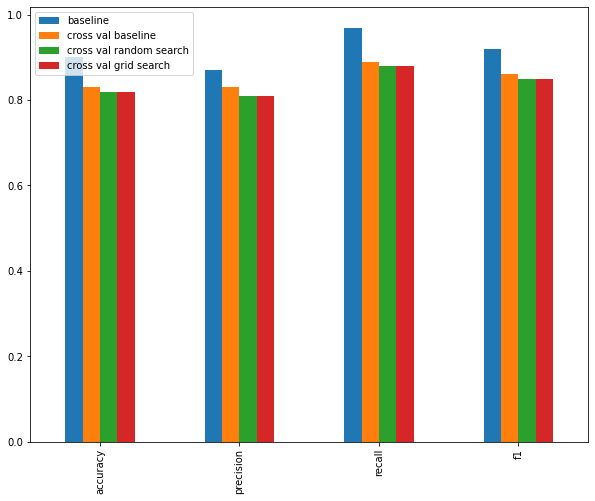

In [75]:
log_reg_metrics_comparison = pd.DataFrame({"baseline": baseline_log_reg_metrics,
                                           "cross val baseline": baseline_cv_log_reg_metrics,
                                           "cross val random search": randomSearch_log_reg_cv_metrics,
                                           "cross val grid search": gridSearch_log_reg_cv_metrics}
                                          )

log_reg_metrics_comparison.plot.bar(figsize=(10, 8));

## 3. `KneighborsClassifier`

In [6]:
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(77)
ss = StandardScaler()

# Creating Features Matrix and Labels
X = heart.drop("target", axis=1)
y = heart["target"]

# Normalizing the data
X = ss.fit_transform(X)

# Splitting data into Train and Test splits (80% 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiating our model
KNC = KNeighborsClassifier(n_neighbors=5)

# Fitting our model
KNC.fit(X_train, y_train)

KNeighborsClassifier()

### 3.1 `KNeighborsClassifier` Baseline

In [7]:
# Random Seed for reproducable results
np.random.seed(77)

baseline_KNC_cvs = cross_val_score(KNC, X, y, cv=5)
np.mean(baseline_KNC_cvs)

print(f'The non cross-validated score for the baseline model is: {KNC.score(X_test, y_test)}')
print(f'The cross-validated score for the baseline model is: {np.mean(baseline_KNC_cvs)}')

The non cross-validated score for the baseline model is: 0.9016393442622951
The cross-validated score for the baseline model is: 0.8118579234972678


##### Area under Reciever Operating Characteristic Curve (AUC/ROC)

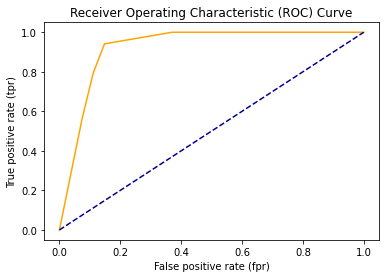

In [8]:
np.random.seed(77)

# Make predictions
y_predict = KNC.predict(X_test)
y_probability = KNC.predict_proba(X_test)
y_probability_positive = y_probability[:, 1]

# Get fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probability_positive)
roc_curve_plot(fpr, tpr)

In [9]:
baseline_KNC_roc_auc = roc_auc_score(y_test, y_probability_positive)
baseline_KNC_roc_auc

0.923202614379085

##### Confusion Matrix

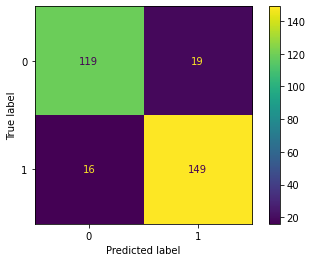

In [10]:
plot_confusion_matrix(KNC, X, y);

##### `KNeighborsClassifier` Metrics

In [11]:
baseline_KNC_y_preds = KNC.predict(X_test)
baseline_KNC_metrics = model_prediction(y_test, baseline_KNC_y_preds)

Accuracy: 90.16%
Precision: 88.89%
Recall: 94.12%
f1: 91.43%


##### `KNeighborsClassifier` Cross-Validated Metrics

In [12]:
baseline_KNC_cv_metrics = cross_val_metrics(KNC, X, y)

Accuracy: 81.19%
Precision: 80.52%
Recall: 87.27%
f1: 83.55%


##### `KNeighborsClassifier` Baseline Summary

In [13]:
print('The results on the baseline KNeighborsClassifier Model are as follows:\n')
print(f'Cross-Validated Accuracy: {np.mean(baseline_KNC_cvs)}')
print(f'AUC_ROC: {baseline_KNC_roc_auc}')
print(f'Metrics: {baseline_KNC_metrics}')
print(f'CV Metrics: {baseline_KNC_cv_metrics}')

The results on the baseline KNeighborsClassifier Model are as follows:

Cross-Validated Accuracy: 0.8118579234972678
AUC_ROC: 0.923202614379085
Metrics: {'accuracy': 0.9, 'precision': 0.89, 'recall': 0.94, 'f1': 0.91}
CV Metrics: {'accuracy': 0.81, 'precision': 0.81, 'recall': 0.87, 'f1': 0.84}


##  3.2 `KNeighborsClassifier` Hyperparameter adjustments/testing using `RandomizedSearchCV` and `GridSearchCV`

### 3.2.1 `RandomizedSearchCV`

In [14]:
# Set up the random grid
KNC_random_grid = {
    "n_neighbors": np.arange(3, 21, 2),
    "weights": ["uniform", "distance"],
    "metric": ["manhattan", "euclidean"]
}

np.random.seed(77)

# Splitting data into Train and Test splits (80% 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Instantiating our model
KNC = KNeighborsClassifier(n_neighbors=5)

# Using RandomizedSearchCV
randomSearch_KNC = RandomizedSearchCV(estimator=KNC,
                            param_distributions=KNC_random_grid, 
                            n_iter=20, 
                            cv=5, # Automatically crossvalidates it for us
                            verbose=2)
# Fitting our model
randomSearch_KNC.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] weights=distance, n_neighbors=5, metric=manhattan ...............
[CV]  weights=distance, n_neighbors=5, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=5, metric=manhattan ...............
[CV]  weights=distance, n_neighbors=5, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=5, metric=manhattan ...............
[CV]  weights=distance, n_neighbors=5, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=5, metric=manhattan ...............
[CV]  weights=distance, n_neighbors=5, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=5, metric=manhattan ...............
[CV]  weights=distance, n_neighbors=5, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=17, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=17, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=17, metric=manhattan ..............
[CV]  weights=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] weights=uniform, n_neighbors=3, metric=manhattan ................
[CV] . weights=uniform, n_neighbors=3, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=3, metric=manhattan ................
[CV] . weights=uniform, n_neighbors=3, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=3, metric=manhattan ................
[CV] . weights=uniform, n_neighbors=3, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=13, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=13, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=13, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=13, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=13, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=13, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=13, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=13, metric=manhattan, total=   0.0s
[CV] w

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'metric': ['manhattan', 'euclidean'],
                                        'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'weights': ['uniform', 'distance']},
                   verbose=2)

In [15]:
# Best parameters it found
randomSearch_KNC.best_params_

{'weights': 'uniform', 'n_neighbors': 19, 'metric': 'euclidean'}

##### `RandomizedSearchCV` Cross-Validated Accuracy 

In [16]:
randomSearch_KNC_cvs = cross_val_score(randomSearch_KNC, X, y, cv=5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] weights=uniform, n_neighbors=13, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=13, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=13, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=13, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=13, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=13, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=13, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=13, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=13, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=13, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=7, metric=manhattan ................
[CV] . weights=uniform, n_neighbors=7, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=7, metric=manhattan ................
[CV] . weights=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  weights=distance, n_neighbors=15, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=15, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=15, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=11, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=11, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=11, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=11, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=11, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=11, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=11, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=11, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=11, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=11, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=17, metric=euclidean ...............

[CV] . weights=uniform, n_neighbors=7, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=7, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=7, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=7, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=7, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=7, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=7, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=13, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=13, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=13, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=13, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=13, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=13, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=13, metric=manhattan ..............
[CV

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  weights=distance, n_neighbors=19, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=19, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=19, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=19, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=19, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=19, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=19, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=19, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=19, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=9, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=9, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=9, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=9, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=9, metric=euclidean ................
[

[CV]  weights=uniform, n_neighbors=11, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=11, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=11, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=5, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=5, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=5, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=5, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=5, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=5, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=5, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=5, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=5, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=5, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=17, metric=manhattan ..............
[CV]  

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  weights=uniform, n_neighbors=17, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=17, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=17, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=17, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=17, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=5, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=5, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=5, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=5, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=5, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=5, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=5, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=5, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=5, metric=euclidean ................
[CV] .

[CV]  weights=distance, n_neighbors=7, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=17, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=17, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=17, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=17, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=17, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=17, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=17, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=17, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=17, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=17, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=9, metric=manhattan ................
[CV] . weights=uniform, n_neighbors=9, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=9, metric=manhattan ................
[

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  weights=distance, n_neighbors=9, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=9, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=9, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=11, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=11, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=11, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=11, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=11, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=11, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=11, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=11, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=11, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=11, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=7, metric=manhattan ...............
[CV]  

[CV] . weights=uniform, n_neighbors=3, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=3, metric=manhattan ................
[CV] . weights=uniform, n_neighbors=3, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=15, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=15, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=15, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=15, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=15, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=15, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=15, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=15, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=15, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=15, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=3, metric=euclidean ...............
[

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] weights=distance, n_neighbors=7, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=7, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=7, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=7, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=7, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=7, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=7, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=7, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=7, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=7, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=19, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=19, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=19, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=19, metric=manhattan, total=   0.0s
[CV

[CV] . weights=uniform, n_neighbors=9, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=9, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=9, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=9, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=9, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=9, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=9, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=9, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=9, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=15, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=15, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=15, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=15, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=15, metric=euclidean ...............
[CV]  

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


In [17]:
np.mean(randomSearch_KNC_cvs)

0.8249180327868851

##### Area under Reciever Operating Characteristic Curve (AUC/ROC)

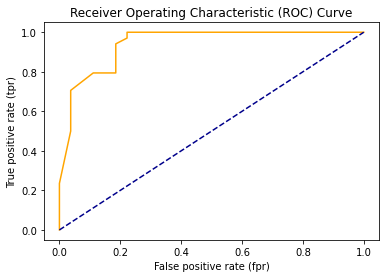

In [18]:
np.random.seed(77)

# Make predictions
y_predict = randomSearch_KNC.predict(X_test)
y_probability = randomSearch_KNC.predict_proba(X_test)
y_probability_positive = y_probability[:, 1]

# Get fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probability_positive)
roc_curve_plot(fpr, tpr)

In [19]:
randomSearch_KNC_roc_auc = roc_auc_score(y_test, y_probability_positive)
randomSearch_KNC_roc_auc

0.9411764705882353

##### Confusion Matrix


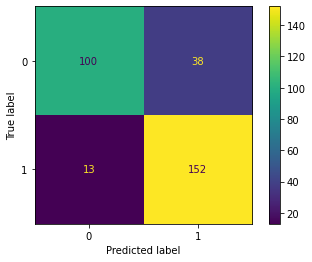

In [112]:
plot_confusion_matrix(randomSearch_KNC, X, y);

##### `RandomizedSearchCV` Metrics

In [113]:
randomSearch_KNC_y_preds = randomSearch_KNC.predict(X_test)
randomSearch_KNC_metrics = model_prediction(y_test, randomSearch_KNC_y_preds)

Accuracy: 88.52%
Precision: 84.62%
Recall: 97.06%
f1: 90.41%


##### `RandomizedSearchCV` Cross-Validated Metrics

In [114]:
randomSearch_KNC_cv_metrics = cross_val_metrics(randomSearch_KNC, X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] weights=uniform, n_neighbors=5, metric=manhattan ................
[CV] . weights=uniform, n_neighbors=5, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=5, metric=manhattan ................
[CV] . weights=uniform, n_neighbors=5, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=5, metric=manhattan ................
[CV] . weights=uniform, n_neighbors=5, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=5, metric=manhattan ................
[CV] . weights=uniform, n_neighbors=5, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=5, metric=manhattan ................
[CV] . weights=uniform, n_neighbors=5, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=3, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=3, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=3, metric=euclidean ................
[CV] . weights=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] weights=distance, n_neighbors=19, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=19, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=19, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=19, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=19, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=19, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=19, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=19, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=7, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=7, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=7, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=7, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=7, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=7, metric=euclidean, total=   0.0s
[

[CV]  weights=distance, n_neighbors=17, metric=manhattan, total=   0.0s
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] weights=distance, n_neighbors=3, metric=manhattan ...............
[CV]  weights=distance, n_neighbors=3, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=3, metric=manhattan ...............
[CV]  weights=distance, n_neighbors=3, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=3, metric=manhattan ...............
[CV]  weights=distance, n_neighbors=3, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=3, metric=manhattan ...............
[CV]  weights=distance, n_neighbors=3, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=3, metric=manhattan ...............
[CV]  weights=distance, n_neighbors=3, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=9, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=9, metric=euclidean, total=   0.0s
[CV] weights=u

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] weights=uniform, n_neighbors=7, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=7, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=7, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=7, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=7, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=7, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=7, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=7, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=11, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=11, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=11, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=11, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=11, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=11, metric=euclidean, total=   0.0s
[C

[CV] . weights=uniform, n_neighbors=5, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=19, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=19, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=19, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=19, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=19, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=19, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=19, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=19, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=19, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=19, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=15, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=15, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=15, metric=euclidean ..............


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV]  weights=uniform, n_neighbors=13, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=13, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=13, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=13, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=13, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=13, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=13, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=13, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=13, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=13, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=13, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=13, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=13, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=11, metric=euclidean ...............


[CV] . weights=uniform, n_neighbors=7, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=7, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=7, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=7, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=7, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=3, metric=manhattan ................
[CV] . weights=uniform, n_neighbors=3, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=3, metric=manhattan ................
[CV] . weights=uniform, n_neighbors=3, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=3, metric=manhattan ................
[CV] . weights=uniform, n_neighbors=3, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=3, metric=manhattan ................
[CV] . weights=uniform, n_neighbors=3, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=3, metric=manhattan ................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] weights=distance, n_neighbors=7, metric=manhattan ...............
[CV]  weights=distance, n_neighbors=7, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=13, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=13, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=13, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=13, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=13, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=13, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=13, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=13, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=13, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=13, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=17, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=17, metric=euclidean, total=   0.0s


[CV]  weights=uniform, n_neighbors=11, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=11, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=11, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=11, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=11, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=11, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=11, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=11, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=11, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=11, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=11, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=11, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=11, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=11, metric=manhattan ...............
[CV]  

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  weights=distance, n_neighbors=3, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=3, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=3, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=3, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=3, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=3, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=3, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=3, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=3, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=11, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=11, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=11, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=11, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=11, metric=euclidean ...............
[CV]  

[CV]  weights=distance, n_neighbors=15, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=15, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=15, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=15, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=15, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=15, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=15, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=15, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=15, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=3, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=3, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=3, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=3, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=3, metric=euclidean ................
[

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  weights=distance, n_neighbors=7, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=7, metric=manhattan ...............
[CV]  weights=distance, n_neighbors=7, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=17, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=17, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=17, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=17, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=17, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=17, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=17, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=17, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=17, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=17, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=13, metric=manhattan ..............
[CV]  

[CV]  weights=distance, n_neighbors=7, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=7, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=7, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=7, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=7, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=7, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=7, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=7, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=7, metric=euclidean, total=   0.0s
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] weights=uniform, n_neighbors=17, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=17, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=17, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=17, metric=euclidean, total=   0.0s
[CV] weights=un

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  weights=uniform, n_neighbors=15, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=15, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=15, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=7, metric=manhattan ...............
[CV]  weights=distance, n_neighbors=7, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=7, metric=manhattan ...............
[CV]  weights=distance, n_neighbors=7, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=7, metric=manhattan ...............
[CV]  weights=distance, n_neighbors=7, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=7, metric=manhattan ...............
[CV]  weights=distance, n_neighbors=7, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=7, metric=manhattan ...............
[CV]  weights=distance, n_neighbors=7, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=19, metric=manhattan ..............
[CV]  

[CV]  weights=uniform, n_neighbors=15, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=15, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=15, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=19, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=19, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=19, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=19, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=19, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=19, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=19, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=19, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=19, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=19, metric=euclidean, total=   0.0s
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] weigh

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  weights=uniform, n_neighbors=15, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=15, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=15, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=15, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=15, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=5, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=5, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=5, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=5, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=5, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=5, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=5, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=5, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=5, metric=euclidean ................
[CV] .

[CV] weights=distance, n_neighbors=17, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=17, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=3, metric=manhattan ...............
[CV]  weights=distance, n_neighbors=3, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=3, metric=manhattan ...............
[CV]  weights=distance, n_neighbors=3, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=3, metric=manhattan ...............
[CV]  weights=distance, n_neighbors=3, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=3, metric=manhattan ...............
[CV]  weights=distance, n_neighbors=3, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=3, metric=manhattan ...............
[CV]  weights=distance, n_neighbors=3, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=11, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=11, metric=euclidean, total=   0.0s
[CV]

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] weights=distance, n_neighbors=17, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=17, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=17, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=17, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=17, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=17, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=17, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=17, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=3, metric=manhattan ................
[CV] . weights=uniform, n_neighbors=3, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=3, metric=manhattan ................
[CV] . weights=uniform, n_neighbors=3, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=3, metric=manhattan ................
[CV] . weights=uniform, n_neighbors=3, metric=manhattan, total=   0.0s
[

[CV] . weights=uniform, n_neighbors=5, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=5, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=5, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=15, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=15, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=15, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=15, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=15, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=15, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=15, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=15, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=15, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=15, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=7, metric=manhattan ................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] weights=uniform, n_neighbors=5, metric=manhattan ................
[CV] . weights=uniform, n_neighbors=5, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=5, metric=manhattan ................
[CV] . weights=uniform, n_neighbors=5, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=15, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=15, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=15, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=15, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=15, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=15, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=15, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=15, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=15, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=15, metric=euclidean, total=   0.0s


[CV]  weights=distance, n_neighbors=3, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=15, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=15, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=15, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=15, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=15, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=15, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=15, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=15, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=15, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=15, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=3, metric=manhattan ...............
[CV]  weights=distance, n_neighbors=3, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=3, metric=manhattan ...............
[CV]  

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  weights=distance, n_neighbors=3, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=3, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=3, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=9, metric=manhattan ...............
[CV]  weights=distance, n_neighbors=9, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=9, metric=manhattan ...............
[CV]  weights=distance, n_neighbors=9, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=9, metric=manhattan ...............
[CV]  weights=distance, n_neighbors=9, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=9, metric=manhattan ...............
[CV]  weights=distance, n_neighbors=9, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=9, metric=manhattan ...............
[CV]  weights=distance, n_neighbors=9, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=9, metric=euclidean ................
[CV] .

[CV] . weights=uniform, n_neighbors=7, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=7, metric=manhattan ................
[CV] . weights=uniform, n_neighbors=7, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=7, metric=manhattan ................
[CV] . weights=uniform, n_neighbors=7, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=7, metric=manhattan ................
[CV] . weights=uniform, n_neighbors=7, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=7, metric=manhattan ................
[CV] . weights=uniform, n_neighbors=7, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=19, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=19, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=19, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=19, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=19, metric=manhattan ...............
[CV]  

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  weights=uniform, n_neighbors=17, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=17, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=17, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=17, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=17, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=17, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=17, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=17, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=17, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=17, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=17, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=17, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=17, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=19, metric=euclidean ...............
[

[CV]  weights=uniform, n_neighbors=11, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=11, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=11, metric=manhattan, total=   0.0s
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] weights=uniform, n_neighbors=5, metric=manhattan ................
[CV] . weights=uniform, n_neighbors=5, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=5, metric=manhattan ................
[CV] . weights=uniform, n_neighbors=5, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=5, metric=manhattan ................
[CV] . weights=uniform, n_neighbors=5, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=5, metric=manhattan ................
[CV] . weights=uniform, n_neighbors=5, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=5, metric=manhattan ................
[CV] . weights=uniform, n_neighbors=5, metric=manhattan, total=   0.0s
[CV] weights=un

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] weights=uniform, n_neighbors=15, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=15, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=19, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=19, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=19, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=19, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=19, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=19, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=19, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=19, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=19, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=19, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=3, metric=manhattan ................
[CV] . weights=uniform, n_neighbors=3, metric=manhattan, total=   0.0s


[CV]  weights=uniform, n_neighbors=13, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=13, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=13, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=13, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=13, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=13, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=13, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=13, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=13, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=17, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=17, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=17, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=17, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=17, metric=euclidean ..............
[CV]

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  weights=uniform, n_neighbors=17, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=17, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=17, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=17, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=17, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=17, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=17, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=7, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=7, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=7, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=7, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=7, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=7, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=7, metric=euclidean ...............
[CV]  

[CV]  weights=uniform, n_neighbors=19, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=19, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=19, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=17, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=17, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=17, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=17, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=17, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=17, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=17, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=17, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=17, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=17, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=17, metric=euclidean ..............
[CV]  

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  weights=distance, n_neighbors=19, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=19, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=19, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=19, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=19, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=19, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=19, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=19, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=19, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=9, metric=manhattan ...............
[CV]  weights=distance, n_neighbors=9, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=9, metric=manhattan ...............
[CV]  weights=distance, n_neighbors=9, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=9, metric=manhattan ...............
[

[CV] . weights=uniform, n_neighbors=9, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=9, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=9, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=9, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=9, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=17, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=17, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=17, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=17, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=17, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=17, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=17, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=17, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=17, metric=euclidean ..............
[C

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  weights=uniform, n_neighbors=11, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=11, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=11, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=11, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=11, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=11, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=11, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=11, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=11, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=11, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=11, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=11, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=11, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=9, metric=euclidean ...............
[CV]  

[CV]  weights=distance, n_neighbors=5, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=7, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=7, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=7, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=7, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=7, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=7, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=7, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=7, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=7, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=7, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=15, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=15, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=15, metric=manhattan ..............
[CV] 

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] . weights=uniform, n_neighbors=5, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=5, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=5, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=5, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=5, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=5, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=5, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=3, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=3, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=3, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=3, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=3, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=3, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=3, metric=euclidean ...............
[CV]  

[CV] . weights=uniform, n_neighbors=9, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=9, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=9, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=9, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=9, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=15, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=15, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=15, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=15, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=15, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=15, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=15, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=15, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=15, metric=euclidean ...............
[CV]  

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV]  weights=distance, n_neighbors=3, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=3, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=3, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=19, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=19, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=19, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=19, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=19, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=19, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=19, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=19, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=19, metric=euclidean ...............
[CV]  weights=uniform, n_neighbors=19, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=5, metric=manhattan ...............
[CV] 

[CV] . weights=uniform, n_neighbors=3, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=17, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=17, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=17, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=17, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=17, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=17, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=17, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=17, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=17, metric=manhattan ...............
[CV]  weights=uniform, n_neighbors=17, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=9, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=9, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=9, metric=euclidean ................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] . weights=uniform, n_neighbors=9, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=9, metric=manhattan ................
[CV] . weights=uniform, n_neighbors=9, metric=manhattan, total=   0.0s
[CV] weights=uniform, n_neighbors=9, metric=manhattan ................
[CV] . weights=uniform, n_neighbors=9, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=5, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=5, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=5, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=5, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=5, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=5, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=5, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=5, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=5, metric=euclidean ...............
[CV]  

[CV] . weights=uniform, n_neighbors=7, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=7, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=7, metric=euclidean, total=   0.0s
[CV] weights=uniform, n_neighbors=7, metric=euclidean ................
[CV] . weights=uniform, n_neighbors=7, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=9, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=9, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=9, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=9, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=9, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=9, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=9, metric=euclidean ...............
[CV]  weights=distance, n_neighbors=9, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=9, metric=euclidean ...............
[CV]  

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] weights=distance, n_neighbors=15, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=15, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=15, metric=euclidean ..............
[CV]  weights=distance, n_neighbors=15, metric=euclidean, total=   0.0s
[CV] weights=distance, n_neighbors=17, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=17, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=17, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=17, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=17, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=17, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=17, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=17, metric=manhattan, total=   0.0s
[CV] weights=distance, n_neighbors=17, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=17, metric=manhattan, total=   0.0

[CV]  weights=uniform, n_neighbors=15, metric=euclidean, total=   0.0s
Accuracy: 81.84%
Precision: 80.59%
Recall: 89.70%
f1: 85.50%


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


In [115]:
randomSearch_KNC_cv_metrics

{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.9, 'f1': 0.86}

##### `KNeighborsClassifier` `RandomizedSearchCV` summary

In [116]:
print('The results on the RandomizedSearchCV KNeighborsClassifier Model are as follows:\n')
print(f'Cross-Validated Accuracy: {np.mean(randomSearch_KNC_cvs)}')
print(f'AUC_ROC: {randomSearch_KNC_roc_auc}')
print(f'Metrics: {randomSearch_KNC_metrics}')
print(f'CV Metrics: {randomSearch_KNC_cv_metrics}')

The results on the RandomizedSearchCV KNeighborsClassifier Model are as follows:

Cross-Validated Accuracy: 0.8249180327868851
AUC_ROC: 0.9411764705882353
Metrics: {'accuracy': 0.89, 'precision': 0.85, 'recall': 0.97, 'f1': 0.9}
CV Metrics: {'accuracy': 0.82, 'precision': 0.81, 'recall': 0.9, 'f1': 0.86}


### 3.2.2 `GridSearchCV`

In [20]:
np.random.seed(77)

KNC_grid = {
    "n_neighbors": np.arange(19, 25, 2),
    "weights": ["uniform"],
    "metric": ["euclidean"]
}
np.random.seed(77)

# Splitting data into Train and Test splits (80% 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiating our model
KNC = KNeighborsClassifier(n_neighbors=5)

# Using RandomizedSearchCV
gridSearch_KNC = GridSearchCV(KNC,
                              param_grid=KNC_grid,
                              cv=5,
                              verbose=True)
# Fitting our model
gridSearch_KNC.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean'],
                         'n_neighbors': array([19, 21, 23]),
                         'weights': ['uniform']},
             verbose=True)

In [21]:
# Best parameters it found
gridSearch_KNC.best_params_

{'metric': 'euclidean', 'n_neighbors': 23, 'weights': 'uniform'}

##### `GridSearchCV` Cross-Validated Accuracy

In [118]:
gridSearch_KNC_cvs = cross_val_score(gridSearch_KNC, X, y, cv=5)
np.mean(gridSearch_KNC_cvs)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished


0.8315300546448088

##### Area under Reciever Operating Characteristic Curve (AUC/ROC)

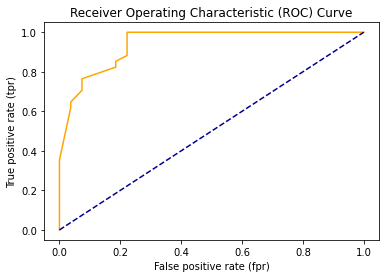

In [22]:
np.random.seed(77)

# Make predictions
y_predict = gridSearch_KNC.predict(X_test)
y_probability = gridSearch_KNC.predict_proba(X_test)
y_probability_positive = y_probability[:, 1]

# Get fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probability_positive)
roc_curve_plot(fpr, tpr)

In [23]:
gridSearch_KNC_roc_auc = roc_auc_score(y_test, y_probability_positive)
gridSearch_KNC_roc_auc

0.9411764705882353

##### Confusion Matrix

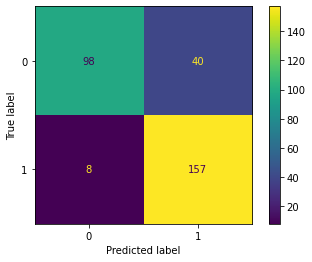

In [121]:
plot_confusion_matrix(gridSearch_KNC, X, y);

##### `GridSearchCV` Metrics

In [122]:
gridSearch_KNC_y_preds = gridSearch_KNC.predict(X_test)
gridSearch_KNC_metrics = model_prediction(y_test, gridSearch_KNC_y_preds)

Accuracy: 90.16%
Precision: 85.00%
Recall: 100.00%
f1: 91.89%


##### `GridSearchCV` Cross-Validated Metrics

In [123]:
gridSearch_KNC_cv_metrics = cross_val_metrics(gridSearch_KNC, X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Accuracy: 83.15%
Precision: 79.63%
Recall: 93.33%
f1: 85.86%


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished


In [124]:
gridSearch_KNC_cv_metrics

{'accuracy': 0.83, 'precision': 0.8, 'recall': 0.93, 'f1': 0.86}

##### `KNeighborsClassifier` `GridSearchCV` summary

In [125]:
print('The results on the GridSearchCV KNeighborsClassifier Model are as follows:\n')
print(f'Cross-Validated Accuracy: {np.mean(gridSearch_KNC_cvs)}')
print(f'AUC_ROC: {gridSearch_KNC_roc_auc}')
print(f'Metrics: {gridSearch_KNC_metrics}')
print(f'CV Metrics: {gridSearch_KNC_cv_metrics}')

The results on the GridSearchCV KNeighborsClassifier Model are as follows:

Cross-Validated Accuracy: 0.8315300546448088
AUC_ROC: 0.9411764705882353
Metrics: {'accuracy': 0.9, 'precision': 0.85, 'recall': 1.0, 'f1': 0.92}
CV Metrics: {'accuracy': 0.83, 'precision': 0.8, 'recall': 0.93, 'f1': 0.86}


## 3.3 `KNeighborsClassifier` Results Comparison
A comparison of all results gathered

cross-validated accuracy

In [126]:
print(f'Baseline CVS: {np.mean(baseline_KNC_cvs)}')
print(f'RandomSearch CVS: {np.mean(randomSearch_KNC_cvs)}')
print(f'GridSearch CVS: {np.mean(gridSearch_KNC_cvs)}')

Baseline CVS: 0.8118579234972678
RandomSearch CVS: 0.8249180327868851
GridSearch CVS: 0.8315300546448088


ROC AUC Score

In [24]:
print(f'Baseline ROC_AUC: {baseline_KNC_roc_auc}')
print(f'RandomSearch ROC_AUC: {randomSearch_KNC_roc_auc}')
print(f'GridSearch ROC_AUC: {gridSearch_KNC_roc_auc}')

Baseline ROC_AUC: 0.923202614379085
RandomSearch ROC_AUC: 0.9411764705882353
GridSearch ROC_AUC: 0.9411764705882353


Metrics

In [128]:
print(f'Baseline Metrics: {baseline_KNC_metrics}')
print(f'Cross-Val Baseline Metrics {baseline_KNC_cv_metrics}')
print(f'RandomSearch Metrics: {randomSearch_KNC_metrics}')
print(f'Cross-Val RandomSearch Metrics {randomSearch_KNC_cv_metrics}')
print(f'GridSearch Metrics: {gridSearch_KNC_metrics}')
print(f'Cross-Val GridSearch Metrics {gridSearch_KNC_cv_metrics}')

Baseline Metrics: {'accuracy': 0.9, 'precision': 0.89, 'recall': 0.94, 'f1': 0.91}
Cross-Val Baseline Metrics {'accuracy': 0.81, 'precision': 0.81, 'recall': 0.87, 'f1': 0.84}
RandomSearch Metrics: {'accuracy': 0.89, 'precision': 0.85, 'recall': 0.97, 'f1': 0.9}
Cross-Val RandomSearch Metrics {'accuracy': 0.82, 'precision': 0.81, 'recall': 0.9, 'f1': 0.86}
GridSearch Metrics: {'accuracy': 0.9, 'precision': 0.85, 'recall': 1.0, 'f1': 0.92}
Cross-Val GridSearch Metrics {'accuracy': 0.83, 'precision': 0.8, 'recall': 0.93, 'f1': 0.86}


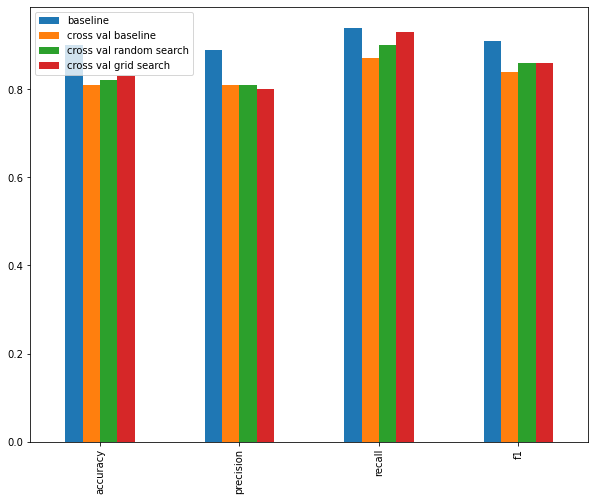

In [47]:
KNC_metrics_comparison = pd.DataFrame({"baseline": baseline_KNC_metrics,
                                           "cross val baseline": baseline_KNC_cv_metrics,
                                           "cross val random search": randomSearch_KNC_cv_metrics,
                                           "cross val grid search": gridSearch_KNC_cv_metrics}
                                          )
KNC_metrics_comparison.plot.bar(figsize=(10, 8));

## 4. `AdaBoostClassifier`

In [129]:
# Import the model
from sklearn.ensemble import AdaBoostClassifier


# Setup random seed
np.random.seed(77)
ss = StandardScaler()

# Make the data
X = heart.drop("target", axis=1)
y = heart["target"]

# Normalizing the data
X = ss.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate
ada = AdaBoostClassifier(n_estimators=200)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=200)

### 4.1 `AdaBoostClassifier` Baseline

In [130]:
# Random Seed for reproducable results
np.random.seed(77)

baseline_ada_cvs = cross_val_score(ada, X, y, cv=5)
np.mean(baseline_ada_cvs)

print(f'The non cross-validated score for the baseline model is: {ada.score(X_test, y_test)}')
print(f'The cross-validated score for the baseline model is: {np.mean(baseline_ada_cvs)}')

The non cross-validated score for the baseline model is: 0.7704918032786885
The cross-validated score for the baseline model is: 0.7620765027322405


#### Area under Reciever Operating Characteristic Curve (AUC/ROC)

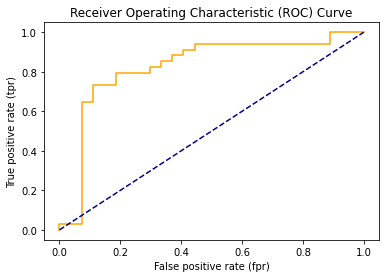

In [131]:
np.random.seed(77)

# Make predictions
y_probability = ada.predict_proba(X_test)
y_probability_positive = y_probability[:, 1]

# Get fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probability_positive)
roc_curve_plot(fpr, tpr)

In [132]:
ada_roc_auc = roc_auc_score(y_test, y_probability_positive)
ada_roc_auc

0.826797385620915

##### Confusion Matix

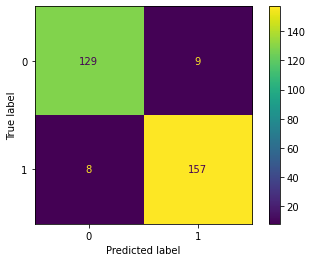

In [133]:
plot_confusion_matrix(ada, X, y);

##### `AdaBoostClassifier` Baseline Metrics

In [134]:
ada_y_preds = ada.predict(X_test)
baseline_ada_metrics = model_prediction(y_test, ada_y_preds)

Accuracy: 77.05%
Precision: 77.78%
Recall: 82.35%
f1: 80.00%


##### `AdaBoostClassifier` Cross-Validated Metrics

In [135]:
# Higher cross val scores than regular scores?
baseline_ada_cv_metrics = cross_val_metrics(ada, X, y)

Accuracy: 76.21%
Precision: 77.18%
Recall: 81.82%
f1: 79.12%


##### `AdaBoostClassifier` Baseline Summary

In [136]:
print('The results on the Baseline AdaBoostClassifier Model are as follows:\n')
print(f'Cross-Validated Accuracy: {np.mean(baseline_ada_cvs)}')
print(f'AUC_ROC: {ada_roc_auc}')
print(f'Metrics: {baseline_ada_metrics}')
print(f'CV Metrics: {baseline_ada_cv_metrics}')

The results on the Baseline AdaBoostClassifier Model are as follows:

Cross-Validated Accuracy: 0.7620765027322405
AUC_ROC: 0.826797385620915
Metrics: {'accuracy': 0.77, 'precision': 0.78, 'recall': 0.82, 'f1': 0.8}
CV Metrics: {'accuracy': 0.76, 'precision': 0.77, 'recall': 0.82, 'f1': 0.79}


##  4.2 `AdaBoostClassifier` Hyperparameter adjustments/testing using `RandomizedSearchCV` and `GridSearchCV`

### 4.2.1 `RandomizedSearchCV`

In [137]:
ada_random_grid = {
    "n_estimators": np.arange(50, 1000, 50),
    "learning_rate": np.arange(1, 10, 1),
    #"algorithm": ["SAMME", "SAMME.R"]
}

# Setup random seed
np.random.seed(77)
ss = StandardScaler()

# Make the data
X = heart.drop("target", axis=1)
y = heart["target"]

# Normalizing the data
X = ss.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


# Instantiating our model
ada = AdaBoostClassifier()

# Using RandomizedSearchCV
randomSearch_ada = RandomizedSearchCV(estimator=ada,
                            param_distributions=ada_random_grid, 
                            n_iter=10, 
                            cv=5, # Automatically crossvalidates it for us
                            verbose=2)
# Fitting our model
randomSearch_ada.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, learning_rate=1 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ n_estimators=200, learning_rate=1, total=   0.6s
[CV] n_estimators=200, learning_rate=1 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ................ n_estimators=200, learning_rate=1, total=   0.7s
[CV] n_estimators=200, learning_rate=1 ...............................
[CV] ................ n_estimators=200, learning_rate=1, total=   0.6s
[CV] n_estimators=200, learning_rate=1 ...............................
[CV] ................ n_estimators=200, learning_rate=1, total=   0.6s
[CV] n_estimators=200, learning_rate=1 ...............................
[CV] ................ n_estimators=200, learning_rate=1, total=   0.6s
[CV] n_estimators=400, learning_rate=8 ...............................
[CV] ................ n_estimators=400, learning_rate=8, total=   1.2s
[CV] n_estimators=400, learning_rate=8 ...............................
[CV] ................ n_estimators=400, learning_rate=8, total=   1.2s
[CV] n_estimators=400, learning_rate=8 ...............................
[CV] ................ n_estimators=400, learning_rate=8, total=   1.2s
[CV] n_estimators=400, learning_rate=8 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650,
       700, 750, 800, 850, 900, 950])},
                   verbose=2)

In [138]:
randomSearch_ada.best_params_

{'n_estimators': 200, 'learning_rate': 1}

##### `RandomizedSearchCV` Cross-Validated Accuracy

In [139]:
randomSearch_ada_cvs = cross_val_score(randomSearch_ada, X, y, cv=5)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=700, learning_rate=4 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ n_estimators=700, learning_rate=4, total=   2.1s
[CV] n_estimators=700, learning_rate=4 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ................ n_estimators=700, learning_rate=4, total=   2.0s
[CV] n_estimators=700, learning_rate=4 ...............................
[CV] ................ n_estimators=700, learning_rate=4, total=   2.0s
[CV] n_estimators=700, learning_rate=4 ...............................
[CV] ................ n_estimators=700, learning_rate=4, total=   2.1s
[CV] n_estimators=700, learning_rate=4 ...............................
[CV] ................ n_estimators=700, learning_rate=4, total=   2.0s
[CV] n_estimators=100, learning_rate=7 ...............................
[CV] ................ n_estimators=100, learning_rate=7, total=   0.3s
[CV] n_estimators=100, learning_rate=7 ...............................
[CV] ................ n_estimators=100, learning_rate=7, total=   0.3s
[CV] n_estimators=100, learning_rate=7 ...............................
[CV] ................ n_estimators=100, learning_rate=7, total=   0.3s
[CV] n_estimators=100, learning_rate=7 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   57.7s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, learning_rate=1 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ n_estimators=600, learning_rate=1, total=   1.7s
[CV] n_estimators=600, learning_rate=1 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ................ n_estimators=600, learning_rate=1, total=   1.7s
[CV] n_estimators=600, learning_rate=1 ...............................
[CV] ................ n_estimators=600, learning_rate=1, total=   1.7s
[CV] n_estimators=600, learning_rate=1 ...............................
[CV] ................ n_estimators=600, learning_rate=1, total=   1.7s
[CV] n_estimators=600, learning_rate=1 ...............................
[CV] ................ n_estimators=600, learning_rate=1, total=   1.7s
[CV] n_estimators=750, learning_rate=7 ...............................
[CV] ................ n_estimators=750, learning_rate=7, total=   2.1s
[CV] n_estimators=750, learning_rate=7 ...............................
[CV] ................ n_estimators=750, learning_rate=7, total=   2.2s
[CV] n_estimators=750, learning_rate=7 ...............................
[CV] ................ n_estimators=750, learning_rate=7, total=   2.1s
[CV] n_estimators=750, learning_rate=7 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   56.7s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=850, learning_rate=2 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ n_estimators=850, learning_rate=2, total=   2.4s
[CV] n_estimators=850, learning_rate=2 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV] ................ n_estimators=850, learning_rate=2, total=   2.4s
[CV] n_estimators=850, learning_rate=2 ...............................
[CV] ................ n_estimators=850, learning_rate=2, total=   2.4s
[CV] n_estimators=850, learning_rate=2 ...............................
[CV] ................ n_estimators=850, learning_rate=2, total=   2.4s
[CV] n_estimators=850, learning_rate=2 ...............................
[CV] ................ n_estimators=850, learning_rate=2, total=   2.4s
[CV] n_estimators=850, learning_rate=6 ...............................
[CV] ................ n_estimators=850, learning_rate=6, total=   2.4s
[CV] n_estimators=850, learning_rate=6 ...............................
[CV] ................ n_estimators=850, learning_rate=6, total=   2.4s
[CV] n_estimators=850, learning_rate=6 ...............................
[CV] ................ n_estimators=850, learning_rate=6, total=   2.4s
[CV] n_estimators=850, learning_rate=6 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=700, learning_rate=5 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ n_estimators=700, learning_rate=5, total=   2.0s
[CV] n_estimators=700, learning_rate=5 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] ................ n_estimators=700, learning_rate=5, total=   2.0s
[CV] n_estimators=700, learning_rate=5 ...............................
[CV] ................ n_estimators=700, learning_rate=5, total=   1.9s
[CV] n_estimators=700, learning_rate=5 ...............................
[CV] ................ n_estimators=700, learning_rate=5, total=   2.0s
[CV] n_estimators=700, learning_rate=5 ...............................
[CV] ................ n_estimators=700, learning_rate=5, total=   2.0s
[CV] n_estimators=250, learning_rate=5 ...............................
[CV] ................ n_estimators=250, learning_rate=5, total=   0.7s
[CV] n_estimators=250, learning_rate=5 ...............................
[CV] ................ n_estimators=250, learning_rate=5, total=   0.7s
[CV] n_estimators=250, learning_rate=5 ...............................
[CV] ................ n_estimators=250, learning_rate=5, total=   0.7s
[CV] n_estimators=250, learning_rate=5 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=500, learning_rate=2 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ n_estimators=500, learning_rate=2, total=   1.4s
[CV] n_estimators=500, learning_rate=2 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] ................ n_estimators=500, learning_rate=2, total=   1.4s
[CV] n_estimators=500, learning_rate=2 ...............................
[CV] ................ n_estimators=500, learning_rate=2, total=   1.4s
[CV] n_estimators=500, learning_rate=2 ...............................
[CV] ................ n_estimators=500, learning_rate=2, total=   1.4s
[CV] n_estimators=500, learning_rate=2 ...............................
[CV] ................ n_estimators=500, learning_rate=2, total=   1.4s
[CV] n_estimators=550, learning_rate=2 ...............................
[CV] ................ n_estimators=550, learning_rate=2, total=   1.6s
[CV] n_estimators=550, learning_rate=2 ...............................
[CV] ................ n_estimators=550, learning_rate=2, total=   1.5s
[CV] n_estimators=550, learning_rate=2 ...............................
[CV] ................ n_estimators=550, learning_rate=2, total=   1.6s
[CV] n_estimators=550, learning_rate=2 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


In [140]:
np.mean(randomSearch_ada_cvs)

0.7487431693989072

##### Area under Reciever Operating Characteristic Curve (AUC/ROC)

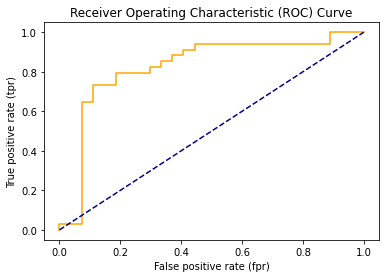

In [141]:
np.random.seed(77)

# Make predictions
y_probability = randomSearch_ada.predict_proba(X_test)
y_probability_positive = y_probability[:, 1]

# Get fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probability_positive)
roc_curve_plot(fpr, tpr)

In [142]:
randomSearch_ada_roc_auc = roc_auc_score(y_test, y_probability_positive)
randomSearch_ada_roc_auc

0.826797385620915

##### Confusion Matrix

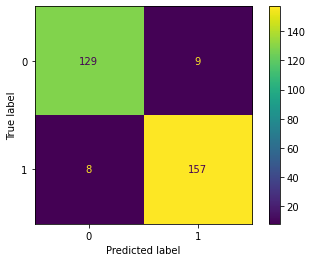

In [143]:
plot_confusion_matrix(randomSearch_ada, X, y);

##### `AdaBoostClassifier` `RandomizedSearchCV` Metrics

In [146]:
randomSearch_ada_y_preds = randomSearch_ada.predict(X_test)
randomSearch_ada_metrics = model_prediction(y_test, randomSearch_ada_y_preds)

Accuracy: 77.05%
Precision: 77.78%
Recall: 82.35%
f1: 80.00%


##### `AdaBoostClassifier` `RandomizedSearchCV`  Cross-Validated Metrics (Abnormally low? Maybe Worth Checking out?)

In [145]:
randomSearch_ada_cv_metrics = cross_val_metrics(randomSearch_ada, X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=300, learning_rate=6 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ n_estimators=300, learning_rate=6, total=   0.9s
[CV] n_estimators=300, learning_rate=6 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ................ n_estimators=300, learning_rate=6, total=   1.0s
[CV] n_estimators=300, learning_rate=6 ...............................
[CV] ................ n_estimators=300, learning_rate=6, total=   0.9s
[CV] n_estimators=300, learning_rate=6 ...............................
[CV] ................ n_estimators=300, learning_rate=6, total=   1.0s
[CV] n_estimators=300, learning_rate=6 ...............................
[CV] ................ n_estimators=300, learning_rate=6, total=   0.9s
[CV] n_estimators=850, learning_rate=1 ...............................
[CV] ................ n_estimators=850, learning_rate=1, total=   2.8s
[CV] n_estimators=850, learning_rate=1 ...............................
[CV] ................ n_estimators=850, learning_rate=1, total=   2.8s
[CV] n_estimators=850, learning_rate=1 ...............................
[CV] ................ n_estimators=850, learning_rate=1, total=   2.6s
[CV] n_estimators=850, learning_rate=1 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=550, learning_rate=7 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ n_estimators=550, learning_rate=7, total=   1.6s
[CV] n_estimators=550, learning_rate=7 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] ................ n_estimators=550, learning_rate=7, total=   1.6s
[CV] n_estimators=550, learning_rate=7 ...............................
[CV] ................ n_estimators=550, learning_rate=7, total=   1.6s
[CV] n_estimators=550, learning_rate=7 ...............................
[CV] ................ n_estimators=550, learning_rate=7, total=   1.6s
[CV] n_estimators=550, learning_rate=7 ...............................
[CV] ................ n_estimators=550, learning_rate=7, total=   1.7s
[CV] n_estimators=950, learning_rate=4 ...............................
[CV] ................ n_estimators=950, learning_rate=4, total=   2.9s
[CV] n_estimators=950, learning_rate=4 ...............................
[CV] ................ n_estimators=950, learning_rate=4, total=   3.0s
[CV] n_estimators=950, learning_rate=4 ...............................
[CV] ................ n_estimators=950, learning_rate=4, total=   2.8s
[CV] n_estimators=950, learning_rate=4 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, learning_rate=5 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ n_estimators=200, learning_rate=5, total=   0.6s
[CV] n_estimators=200, learning_rate=5 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ................ n_estimators=200, learning_rate=5, total=   0.6s
[CV] n_estimators=200, learning_rate=5 ...............................
[CV] ................ n_estimators=200, learning_rate=5, total=   0.6s
[CV] n_estimators=200, learning_rate=5 ...............................
[CV] ................ n_estimators=200, learning_rate=5, total=   0.6s
[CV] n_estimators=200, learning_rate=5 ...............................
[CV] ................ n_estimators=200, learning_rate=5, total=   0.6s
[CV] n_estimators=800, learning_rate=2 ...............................
[CV] ................ n_estimators=800, learning_rate=2, total=   2.4s
[CV] n_estimators=800, learning_rate=2 ...............................
[CV] ................ n_estimators=800, learning_rate=2, total=   2.4s
[CV] n_estimators=800, learning_rate=2 ...............................
[CV] ................ n_estimators=800, learning_rate=2, total=   2.4s
[CV] n_estimators=800, learning_rate=2 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=300, learning_rate=7 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ n_estimators=300, learning_rate=7, total=   0.9s
[CV] n_estimators=300, learning_rate=7 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ................ n_estimators=300, learning_rate=7, total=   0.9s
[CV] n_estimators=300, learning_rate=7 ...............................
[CV] ................ n_estimators=300, learning_rate=7, total=   0.9s
[CV] n_estimators=300, learning_rate=7 ...............................
[CV] ................ n_estimators=300, learning_rate=7, total=   0.9s
[CV] n_estimators=300, learning_rate=7 ...............................
[CV] ................ n_estimators=300, learning_rate=7, total=   0.9s
[CV] n_estimators=750, learning_rate=3 ...............................
[CV] ................ n_estimators=750, learning_rate=3, total=   2.2s
[CV] n_estimators=750, learning_rate=3 ...............................
[CV] ................ n_estimators=750, learning_rate=3, total=   2.2s
[CV] n_estimators=750, learning_rate=3 ...............................
[CV] ................ n_estimators=750, learning_rate=3, total=   2.2s
[CV] n_estimators=750, learning_rate=3 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=350, learning_rate=1 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ n_estimators=350, learning_rate=1, total=   1.1s
[CV] n_estimators=350, learning_rate=1 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ................ n_estimators=350, learning_rate=1, total=   1.1s
[CV] n_estimators=350, learning_rate=1 ...............................
[CV] ................ n_estimators=350, learning_rate=1, total=   1.0s
[CV] n_estimators=350, learning_rate=1 ...............................
[CV] ................ n_estimators=350, learning_rate=1, total=   1.0s
[CV] n_estimators=350, learning_rate=1 ...............................
[CV] ................ n_estimators=350, learning_rate=1, total=   1.0s
[CV] n_estimators=300, learning_rate=4 ...............................
[CV] ................ n_estimators=300, learning_rate=4, total=   0.9s
[CV] n_estimators=300, learning_rate=4 ...............................
[CV] ................ n_estimators=300, learning_rate=4, total=   0.9s
[CV] n_estimators=300, learning_rate=4 ...............................
[CV] ................ n_estimators=300, learning_rate=4, total=   0.9s
[CV] n_estimators=300, learning_rate=4 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=250, learning_rate=5 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ n_estimators=250, learning_rate=5, total=   0.7s
[CV] n_estimators=250, learning_rate=5 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ................ n_estimators=250, learning_rate=5, total=   0.8s
[CV] n_estimators=250, learning_rate=5 ...............................
[CV] ................ n_estimators=250, learning_rate=5, total=   0.7s
[CV] n_estimators=250, learning_rate=5 ...............................
[CV] ................ n_estimators=250, learning_rate=5, total=   0.7s
[CV] n_estimators=250, learning_rate=5 ...............................
[CV] ................ n_estimators=250, learning_rate=5, total=   0.7s
[CV] n_estimators=150, learning_rate=8 ...............................
[CV] ................ n_estimators=150, learning_rate=8, total=   0.5s
[CV] n_estimators=150, learning_rate=8 ...............................
[CV] ................ n_estimators=150, learning_rate=8, total=   0.5s
[CV] n_estimators=150, learning_rate=8 ...............................
[CV] ................ n_estimators=150, learning_rate=8, total=   0.5s
[CV] n_estimators=150, learning_rate=8 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.0min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=450, learning_rate=3 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ n_estimators=450, learning_rate=3, total=   1.4s
[CV] n_estimators=450, learning_rate=3 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] ................ n_estimators=450, learning_rate=3, total=   1.5s
[CV] n_estimators=450, learning_rate=3 ...............................
[CV] ................ n_estimators=450, learning_rate=3, total=   1.4s
[CV] n_estimators=450, learning_rate=3 ...............................
[CV] ................ n_estimators=450, learning_rate=3, total=   1.4s
[CV] n_estimators=450, learning_rate=3 ...............................
[CV] ................ n_estimators=450, learning_rate=3, total=   1.4s
[CV] n_estimators=800, learning_rate=5 ...............................
[CV] ................ n_estimators=800, learning_rate=5, total=   2.6s
[CV] n_estimators=800, learning_rate=5 ...............................
[CV] ................ n_estimators=800, learning_rate=5, total=   2.5s
[CV] n_estimators=800, learning_rate=5 ...............................
[CV] ................ n_estimators=800, learning_rate=5, total=   2.5s
[CV] n_estimators=800, learning_rate=5 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=850, learning_rate=1 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ n_estimators=850, learning_rate=1, total=   2.5s
[CV] n_estimators=850, learning_rate=1 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV] ................ n_estimators=850, learning_rate=1, total=   2.5s
[CV] n_estimators=850, learning_rate=1 ...............................
[CV] ................ n_estimators=850, learning_rate=1, total=   2.5s
[CV] n_estimators=850, learning_rate=1 ...............................
[CV] ................ n_estimators=850, learning_rate=1, total=   2.5s
[CV] n_estimators=850, learning_rate=1 ...............................
[CV] ................ n_estimators=850, learning_rate=1, total=   2.5s
[CV] n_estimators=100, learning_rate=7 ...............................
[CV] ................ n_estimators=100, learning_rate=7, total=   0.3s
[CV] n_estimators=100, learning_rate=7 ...............................
[CV] ................ n_estimators=100, learning_rate=7, total=   0.3s
[CV] n_estimators=100, learning_rate=7 ...............................
[CV] ................ n_estimators=100, learning_rate=7, total=   0.3s
[CV] n_estimators=100, learning_rate=7 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=950, learning_rate=7 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ n_estimators=950, learning_rate=7, total=   2.8s
[CV] n_estimators=950, learning_rate=7 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV] ................ n_estimators=950, learning_rate=7, total=   2.8s
[CV] n_estimators=950, learning_rate=7 ...............................
[CV] ................ n_estimators=950, learning_rate=7, total=   2.8s
[CV] n_estimators=950, learning_rate=7 ...............................
[CV] ................ n_estimators=950, learning_rate=7, total=   2.8s
[CV] n_estimators=950, learning_rate=7 ...............................
[CV] ................ n_estimators=950, learning_rate=7, total=   2.8s
[CV] n_estimators=550, learning_rate=9 ...............................
[CV] ................ n_estimators=550, learning_rate=9, total=   1.6s
[CV] n_estimators=550, learning_rate=9 ...............................
[CV] ................ n_estimators=550, learning_rate=9, total=   1.6s
[CV] n_estimators=550, learning_rate=9 ...............................
[CV] ................ n_estimators=550, learning_rate=9, total=   1.6s
[CV] n_estimators=550, learning_rate=9 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=650, learning_rate=3 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ n_estimators=650, learning_rate=3, total=   2.0s
[CV] n_estimators=650, learning_rate=3 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] ................ n_estimators=650, learning_rate=3, total=   2.1s
[CV] n_estimators=650, learning_rate=3 ...............................
[CV] ................ n_estimators=650, learning_rate=3, total=   2.2s
[CV] n_estimators=650, learning_rate=3 ...............................
[CV] ................ n_estimators=650, learning_rate=3, total=   2.1s
[CV] n_estimators=650, learning_rate=3 ...............................
[CV] ................ n_estimators=650, learning_rate=3, total=   2.1s
[CV] n_estimators=250, learning_rate=2 ...............................
[CV] ................ n_estimators=250, learning_rate=2, total=   0.8s
[CV] n_estimators=250, learning_rate=2 ...............................
[CV] ................ n_estimators=250, learning_rate=2, total=   0.8s
[CV] n_estimators=250, learning_rate=2 ...............................
[CV] ................ n_estimators=250, learning_rate=2, total=   0.8s
[CV] n_estimators=250, learning_rate=2 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   58.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=150, learning_rate=8 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ n_estimators=150, learning_rate=8, total=   0.5s
[CV] n_estimators=150, learning_rate=8 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ................ n_estimators=150, learning_rate=8, total=   0.5s
[CV] n_estimators=150, learning_rate=8 ...............................
[CV] ................ n_estimators=150, learning_rate=8, total=   0.5s
[CV] n_estimators=150, learning_rate=8 ...............................
[CV] ................ n_estimators=150, learning_rate=8, total=   0.5s
[CV] n_estimators=150, learning_rate=8 ...............................
[CV] ................ n_estimators=150, learning_rate=8, total=   0.5s
[CV] n_estimators=50, learning_rate=9 ................................
[CV] ................. n_estimators=50, learning_rate=9, total=   0.2s
[CV] n_estimators=50, learning_rate=9 ................................
[CV] ................. n_estimators=50, learning_rate=9, total=   0.2s
[CV] n_estimators=50, learning_rate=9 ................................
[CV] ................. n_estimators=50, learning_rate=9, total=   0.2s
[CV] n_estimators=50, learning_rate=9 ................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   54.4s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=800, learning_rate=4 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ n_estimators=800, learning_rate=4, total=   2.4s
[CV] n_estimators=800, learning_rate=4 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV] ................ n_estimators=800, learning_rate=4, total=   2.4s
[CV] n_estimators=800, learning_rate=4 ...............................
[CV] ................ n_estimators=800, learning_rate=4, total=   2.4s
[CV] n_estimators=800, learning_rate=4 ...............................
[CV] ................ n_estimators=800, learning_rate=4, total=   2.3s
[CV] n_estimators=800, learning_rate=4 ...............................
[CV] ................ n_estimators=800, learning_rate=4, total=   2.4s
[CV] n_estimators=200, learning_rate=4 ...............................
[CV] ................ n_estimators=200, learning_rate=4, total=   0.6s
[CV] n_estimators=200, learning_rate=4 ...............................
[CV] ................ n_estimators=200, learning_rate=4, total=   0.6s
[CV] n_estimators=200, learning_rate=4 ...............................
[CV] ................ n_estimators=200, learning_rate=4, total=   0.6s
[CV] n_estimators=200, learning_rate=4 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.6min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=450, learning_rate=6 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ n_estimators=450, learning_rate=6, total=   1.3s
[CV] n_estimators=450, learning_rate=6 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] ................ n_estimators=450, learning_rate=6, total=   1.3s
[CV] n_estimators=450, learning_rate=6 ...............................
[CV] ................ n_estimators=450, learning_rate=6, total=   1.3s
[CV] n_estimators=450, learning_rate=6 ...............................
[CV] ................ n_estimators=450, learning_rate=6, total=   1.3s
[CV] n_estimators=450, learning_rate=6 ...............................
[CV] ................ n_estimators=450, learning_rate=6, total=   1.3s
[CV] n_estimators=650, learning_rate=5 ...............................
[CV] ................ n_estimators=650, learning_rate=5, total=   1.9s
[CV] n_estimators=650, learning_rate=5 ...............................
[CV] ................ n_estimators=650, learning_rate=5, total=   1.9s
[CV] n_estimators=650, learning_rate=5 ...............................
[CV] ................ n_estimators=650, learning_rate=5, total=   1.9s
[CV] n_estimators=650, learning_rate=5 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.6min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=750, learning_rate=9 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ n_estimators=750, learning_rate=9, total=   2.3s
[CV] n_estimators=750, learning_rate=9 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV] ................ n_estimators=750, learning_rate=9, total=   2.5s
[CV] n_estimators=750, learning_rate=9 ...............................
[CV] ................ n_estimators=750, learning_rate=9, total=   2.3s
[CV] n_estimators=750, learning_rate=9 ...............................
[CV] ................ n_estimators=750, learning_rate=9, total=   2.5s
[CV] n_estimators=750, learning_rate=9 ...............................
[CV] ................ n_estimators=750, learning_rate=9, total=   2.4s
[CV] n_estimators=850, learning_rate=6 ...............................
[CV] ................ n_estimators=850, learning_rate=6, total=   2.8s
[CV] n_estimators=850, learning_rate=6 ...............................
[CV] ................ n_estimators=850, learning_rate=6, total=   2.8s
[CV] n_estimators=850, learning_rate=6 ...............................
[CV] ................ n_estimators=850, learning_rate=6, total=   2.6s
[CV] n_estimators=850, learning_rate=6 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.6min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=750, learning_rate=6 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ n_estimators=750, learning_rate=6, total=   2.3s
[CV] n_estimators=750, learning_rate=6 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV] ................ n_estimators=750, learning_rate=6, total=   2.3s
[CV] n_estimators=750, learning_rate=6 ...............................
[CV] ................ n_estimators=750, learning_rate=6, total=   2.3s
[CV] n_estimators=750, learning_rate=6 ...............................
[CV] ................ n_estimators=750, learning_rate=6, total=   2.2s
[CV] n_estimators=750, learning_rate=6 ...............................
[CV] ................ n_estimators=750, learning_rate=6, total=   2.2s
[CV] n_estimators=350, learning_rate=4 ...............................
[CV] ................ n_estimators=350, learning_rate=4, total=   1.1s
[CV] n_estimators=350, learning_rate=4 ...............................
[CV] ................ n_estimators=350, learning_rate=4, total=   1.1s
[CV] n_estimators=350, learning_rate=4 ...............................
[CV] ................ n_estimators=350, learning_rate=4, total=   1.0s
[CV] n_estimators=350, learning_rate=4 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=300, learning_rate=6 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ n_estimators=300, learning_rate=6, total=   1.0s
[CV] n_estimators=300, learning_rate=6 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ................ n_estimators=300, learning_rate=6, total=   0.9s
[CV] n_estimators=300, learning_rate=6 ...............................
[CV] ................ n_estimators=300, learning_rate=6, total=   1.1s
[CV] n_estimators=300, learning_rate=6 ...............................
[CV] ................ n_estimators=300, learning_rate=6, total=   1.0s
[CV] n_estimators=300, learning_rate=6 ...............................
[CV] ................ n_estimators=300, learning_rate=6, total=   1.0s
[CV] n_estimators=550, learning_rate=2 ...............................
[CV] ................ n_estimators=550, learning_rate=2, total=   1.8s
[CV] n_estimators=550, learning_rate=2 ...............................
[CV] ................ n_estimators=550, learning_rate=2, total=   1.9s
[CV] n_estimators=550, learning_rate=2 ...............................
[CV] ................ n_estimators=550, learning_rate=2, total=   1.8s
[CV] n_estimators=550, learning_rate=2 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=350, learning_rate=6 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ n_estimators=350, learning_rate=6, total=   1.2s
[CV] n_estimators=350, learning_rate=6 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] ................ n_estimators=350, learning_rate=6, total=   1.2s
[CV] n_estimators=350, learning_rate=6 ...............................
[CV] ................ n_estimators=350, learning_rate=6, total=   1.1s
[CV] n_estimators=350, learning_rate=6 ...............................
[CV] ................ n_estimators=350, learning_rate=6, total=   1.1s
[CV] n_estimators=350, learning_rate=6 ...............................
[CV] ................ n_estimators=350, learning_rate=6, total=   1.1s
[CV] n_estimators=400, learning_rate=6 ...............................
[CV] ................ n_estimators=400, learning_rate=6, total=   1.3s
[CV] n_estimators=400, learning_rate=6 ...............................
[CV] ................ n_estimators=400, learning_rate=6, total=   1.2s
[CV] n_estimators=400, learning_rate=6 ...............................
[CV] ................ n_estimators=400, learning_rate=6, total=   1.2s
[CV] n_estimators=400, learning_rate=6 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=700, learning_rate=5 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ n_estimators=700, learning_rate=5, total=   2.0s
[CV] n_estimators=700, learning_rate=5 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] ................ n_estimators=700, learning_rate=5, total=   2.0s
[CV] n_estimators=700, learning_rate=5 ...............................
[CV] ................ n_estimators=700, learning_rate=5, total=   2.0s
[CV] n_estimators=700, learning_rate=5 ...............................
[CV] ................ n_estimators=700, learning_rate=5, total=   2.0s
[CV] n_estimators=700, learning_rate=5 ...............................
[CV] ................ n_estimators=700, learning_rate=5, total=   2.0s
[CV] n_estimators=950, learning_rate=3 ...............................
[CV] ................ n_estimators=950, learning_rate=3, total=   2.7s
[CV] n_estimators=950, learning_rate=3 ...............................
[CV] ................ n_estimators=950, learning_rate=3, total=   2.7s
[CV] n_estimators=950, learning_rate=3 ...............................
[CV] ................ n_estimators=950, learning_rate=3, total=   2.7s
[CV] n_estimators=950, learning_rate=3 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=650, learning_rate=7 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ n_estimators=650, learning_rate=7, total=   1.8s
[CV] n_estimators=650, learning_rate=7 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] ................ n_estimators=650, learning_rate=7, total=   1.9s
[CV] n_estimators=650, learning_rate=7 ...............................
[CV] ................ n_estimators=650, learning_rate=7, total=   1.9s
[CV] n_estimators=650, learning_rate=7 ...............................
[CV] ................ n_estimators=650, learning_rate=7, total=   1.9s
[CV] n_estimators=650, learning_rate=7 ...............................
[CV] ................ n_estimators=650, learning_rate=7, total=   1.9s
[CV] n_estimators=800, learning_rate=7 ...............................
[CV] ................ n_estimators=800, learning_rate=7, total=   2.2s
[CV] n_estimators=800, learning_rate=7 ...............................
[CV] ................ n_estimators=800, learning_rate=7, total=   2.3s
[CV] n_estimators=800, learning_rate=7 ...............................
[CV] ................ n_estimators=800, learning_rate=7, total=   2.3s
[CV] n_estimators=800, learning_rate=7 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=800, learning_rate=3 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ n_estimators=800, learning_rate=3, total=   2.3s
[CV] n_estimators=800, learning_rate=3 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV] ................ n_estimators=800, learning_rate=3, total=   2.3s
[CV] n_estimators=800, learning_rate=3 ...............................
[CV] ................ n_estimators=800, learning_rate=3, total=   2.3s
[CV] n_estimators=800, learning_rate=3 ...............................
[CV] ................ n_estimators=800, learning_rate=3, total=   2.2s
[CV] n_estimators=800, learning_rate=3 ...............................
[CV] ................ n_estimators=800, learning_rate=3, total=   2.3s
[CV] n_estimators=500, learning_rate=5 ...............................
[CV] ................ n_estimators=500, learning_rate=5, total=   1.4s
[CV] n_estimators=500, learning_rate=5 ...............................
[CV] ................ n_estimators=500, learning_rate=5, total=   1.4s
[CV] n_estimators=500, learning_rate=5 ...............................
[CV] ................ n_estimators=500, learning_rate=5, total=   1.4s
[CV] n_estimators=500, learning_rate=5 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished


Accuracy: 69.31%
Precision: 55.82%
Recall: 41.21%
f1: 55.92%


##### `AdaBoostClassifier`  `RandomizedSearchCV` Summary

In [147]:
print('The results on the RandomizedSearchCV AdaBoostClassifier Model are as follows:\n')
print(f'Cross-Validated Accuracy: {np.mean(randomSearch_ada_cvs)}')
print(f'AUC_ROC: {randomSearch_ada_roc_auc}')
print(f'Metrics: {randomSearch_ada_metrics}')
print(f'CV Metrics: {randomSearch_ada_cv_metrics}')

The results on the RandomizedSearchCV AdaBoostClassifier Model are as follows:

Cross-Validated Accuracy: 0.7487431693989072
AUC_ROC: 0.826797385620915
Metrics: {'accuracy': 0.77, 'precision': 0.78, 'recall': 0.82, 'f1': 0.8}
CV Metrics: {'accuracy': 0.69, 'precision': 0.56, 'recall': 0.41, 'f1': 0.56}


### 4.2.2 `GridSearchCV`

In [149]:
ada_grid = {
    "n_estimators": [200, 250, 300],
    "learning_rate": [1, 2]
}

# Setup random seed
np.random.seed(77)
ss = StandardScaler()

# Make the data
X = heart.drop("target", axis=1)
y = heart["target"]

# Normalizing the data
X = ss.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


# Instantiating our model
ada = AdaBoostClassifier()

# Using RandomizedSearchCV
gridSearch_ada = GridSearchCV(ada,
                              param_grid=ada_grid,
                              cv=5,
                              verbose=True)
# Fitting our model
gridSearch_ada.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   22.8s finished


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [1, 2],
                         'n_estimators': [200, 250, 300]},
             verbose=True)

##### `GridSearchCV` Cross-Validated Accuracy

In [150]:
gridSearch_ada_cvs = cross_val_score(gridSearch_ada, X, y, cv=5)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   23.5s finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   22.7s finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   23.1s finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   22.0s finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   21.6s finished


In [151]:
np.mean(gridSearch_ada_cvs)

0.7520765027322404

##### Area under Reciever Operating Characteristic Curve (AUC/ROC)

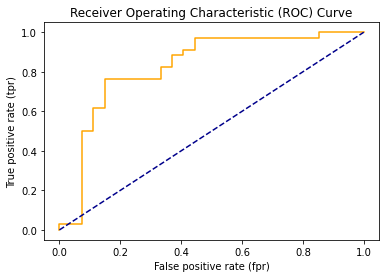

In [153]:
np.random.seed(77)

# Make predictions
y_probability = gridSearch_ada.predict_proba(X_test)
y_probability_positive = y_probability[:, 1]

# Get fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probability_positive)
roc_curve_plot(fpr, tpr)

In [154]:
gridSearch_ada_roc_auc = roc_auc_score(y_test, y_probability_positive)
gridSearch_ada_roc_auc

0.8257080610021786

##### Confusion Matrix

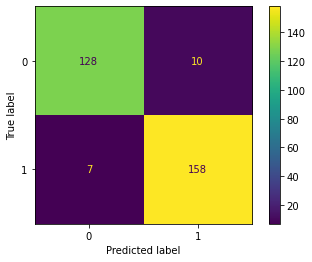

In [155]:
plot_confusion_matrix(gridSearch_ada, X, y);

##### `AdaBoostClassifier` `GridSearchCV` Metrics

In [156]:
gridSearch_ada_y_preds = gridSearch_ada.predict(X_test)
gridSearch_ada_metrics = model_prediction(y_test, gridSearch_ada_y_preds)

Accuracy: 73.77%
Precision: 75.00%
Recall: 79.41%
f1: 77.14%


##### `AdaBoostClassifier` `GridSearchCV`  Cross-Validated Metrics

In [157]:
gridSearch_ada_cv_metrics = cross_val_metrics(gridSearch_ada, X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   23.0s finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   22.8s finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   22.5s finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   22.5s finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   23.3s finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   23.0s finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   23.6s finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   22.5s finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   23.7s finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   21.4s finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   21.7s finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   21.9s finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   21.8s finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   21.1s finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   20.9s finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   21.1s finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   20.9s finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   20.9s finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   20.8s finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   20.8s finished


Accuracy: 75.21%
Precision: 76.78%
Recall: 80.61%
f1: 78.27%


##### `AdaBoostClassifier` `GridSearchCV` Summary

In [158]:
print('The results on the GridSearchCV AdaBoostClassifier Model are as follows:\n')
print(f'Cross-Validated Accuracy: {np.mean(gridSearch_ada_cvs)}')
print(f'AUC_ROC: {gridSearch_ada_roc_auc}')
print(f'Metrics: {gridSearch_ada_metrics}')
print(f'CV Metrics: {gridSearch_ada_cv_metrics}')

The results on the GridSearchCV AdaBoostClassifier Model are as follows:

Cross-Validated Accuracy: 0.7520765027322404
AUC_ROC: 0.8257080610021786
Metrics: {'accuracy': 0.74, 'precision': 0.75, 'recall': 0.79, 'f1': 0.77}
CV Metrics: {'accuracy': 0.75, 'precision': 0.77, 'recall': 0.81, 'f1': 0.78}


## 4.3 `AdaBoostClassifier` Results Comparison
A comparison of all results gathered

##### Cross-Validated Accuracy

In [159]:
print(f'Baseline CVS: {np.mean(baseline_ada_cvs)}')
print(f'RandomSearch CVS: {np.mean(randomSearch_ada_cvs)}')
print(f'GridSearch CVS: {np.mean(gridSearch_ada_cvs)}')

Baseline CVS: 0.7620765027322405
RandomSearch CVS: 0.7487431693989072
GridSearch CVS: 0.7520765027322404


##### ROC AUC Score

In [161]:
print(f'Baseline ROC_AUC: {ada_roc_auc}')
print(f'RandomSearch ROC_AUC: {randomSearch_ada_roc_auc}')
print(f'GridSearch ROC_AUC: {gridSearch_ada_roc_auc}')

Baseline ROC_AUC: 0.826797385620915
RandomSearch ROC_AUC: 0.826797385620915
GridSearch ROC_AUC: 0.8257080610021786


##### Metrics

In [164]:
print(f'Baseline Metrics: {baseline_ada_metrics}')
print(f'Cross-Val Baseline Metrics {baseline_ada_cv_metrics}')
print("--------------------------------------------------------------------------------------------------")
print(f'RandomSearch Metrics: {randomSearch_ada_metrics}')
print(f'Cross-Val RandomSearch Metrics {randomSearch_ada_cv_metrics}')
print("--------------------------------------------------------------------------------------------------")
print(f'GridSearch Metrics: {gridSearch_ada_metrics}')
print(f'Cross-Val GridSearch Metrics {gridSearch_ada_cv_metrics}')

Baseline Metrics: {'accuracy': 0.77, 'precision': 0.78, 'recall': 0.82, 'f1': 0.8}
Cross-Val Baseline Metrics {'accuracy': 0.76, 'precision': 0.77, 'recall': 0.82, 'f1': 0.79}
--------------------------------------------------------------------------------------------------
RandomSearch Metrics: {'accuracy': 0.77, 'precision': 0.78, 'recall': 0.82, 'f1': 0.8}
Cross-Val RandomSearch Metrics {'accuracy': 0.69, 'precision': 0.56, 'recall': 0.41, 'f1': 0.56}
--------------------------------------------------------------------------------------------------
GridSearch Metrics: {'accuracy': 0.74, 'precision': 0.75, 'recall': 0.79, 'f1': 0.77}
Cross-Val GridSearch Metrics {'accuracy': 0.75, 'precision': 0.77, 'recall': 0.81, 'f1': 0.78}


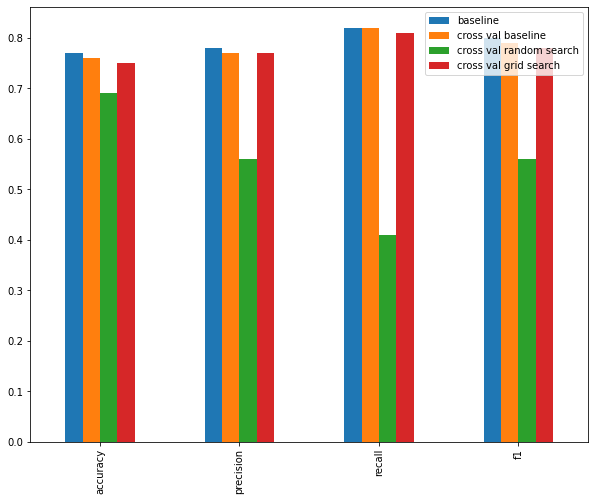

In [165]:
ada_metrics_comparison = pd.DataFrame({"baseline": baseline_ada_metrics,
                                           "cross val baseline": baseline_ada_cv_metrics,
                                           "cross val random search": randomSearch_ada_cv_metrics,
                                           "cross val grid search": gridSearch_ada_cv_metrics}
                                          )
ada_metrics_comparison.plot.bar(figsize=(10, 8));

## 5. `SGDClassifier`


In [63]:
from sklearn.linear_model import SGDClassifier

np.random.seed(77)
ss = StandardScaler()

# Make the data
X = heart.drop("target", axis=1)
y = heart["target"]

# Normalizing the data
X = ss.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


SGD = SGDClassifier(loss="log")
SGD.fit(X_train, y_train)

SGDClassifier(loss='log')

### 5.1 `SGDClassifier` Baseline

In [65]:
# Random Seed for reproducable results
np.random.seed(77)

baseline_SGD_cvs = cross_val_score(SGD, X, y, cv=5)
np.mean(baseline_SGD_cvs)

print(f'The non cross-validated score for the baseline model is: {SGD.score(X_test, y_test)}')
print(f'The cross-validated score for the baseline model is: {np.mean(baseline_SGD_cvs)}')

The non cross-validated score for the baseline model is: 0.8524590163934426
The cross-validated score for the baseline model is: 0.7919672131147542


#### Area under Reciever Operating Characteristic Curve (AUC/ROC)

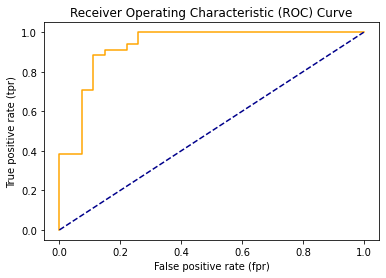

In [66]:
np.random.seed(77)

# Make predictions
y_probability = SGD.predict_proba(X_test)
y_probability_positive = y_probability[:, 1]

# Get fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probability_positive)
roc_curve_plot(fpr, tpr)

In [67]:
baseline_SGD_roc_auc = roc_auc_score(y_test, y_probability_positive)
baseline_SGD_roc_auc

0.9302832244008714

#### Confusion Matrix

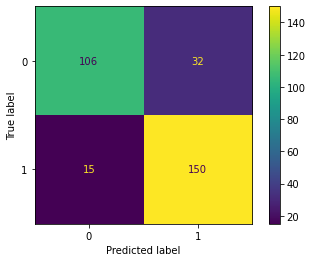

In [68]:
plot_confusion_matrix(SGD, X, y);

#### `SGDClassifier` Metrics

In [69]:
SGD_y_preds = SGD.predict(X_test)
baseline_SGD_metrics = model_prediction(y_test, SGD_y_preds)

Accuracy: 85.25%
Precision: 82.05%
Recall: 94.12%
f1: 87.67%


#### `SGDClassifier` `Cross-Validated` Metrics

In [70]:
baseline_SGD_cv_metrics = cross_val_metrics(SGD, X, y)

Accuracy: 79.20%
Precision: 81.12%
Recall: 80.61%
f1: 74.53%


#### `SGDClassifier` Baseline Summary

In [71]:
print('The results on the Baseline SGDClassifier Model are as follows:\n')
print(f'Cross-Validated Accuracy: {np.mean(baseline_SGD_cvs)}')
print(f'AUC_ROC: {baseline_SGD_roc_auc}')
print(f'Metrics: {baseline_SGD_metrics}')
print(f'CV Metrics: {baseline_SGD_cv_metrics}')

The results on the Baseline SGDClassifier Model are as follows:

Cross-Validated Accuracy: 0.7919672131147542
AUC_ROC: 0.9302832244008714
Metrics: {'accuracy': 0.85, 'precision': 0.82, 'recall': 0.94, 'f1': 0.88}
CV Metrics: {'accuracy': 0.79, 'precision': 0.81, 'recall': 0.81, 'f1': 0.75}


### 5.2 `SGDClassifier` hyperparameter tuning using `RandomizedSearchCV` and `GridSearchCV`

#### 5.2.1 `RandomizedSearchCV`

In [72]:
from sklearn.linear_model import SGDClassifier

SGD_random_grid = {
    #"loss": "log",
    "penalty": ["l1", "l2", "elasticnet"],
    "alpha":  [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "learning_rate": ['optimal'],
    "max_iter": np.arange(500, 1500, 10)
}

# Setup random seed
np.random.seed(77)
ss = StandardScaler()

# Make the data
X = heart.drop("target", axis=1)
y = heart["target"]

# Normalizing the data
X = ss.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


# Instantiating our model
SGD = SGDClassifier(loss="log")

# Using RandomizedSearchCV
randomSearch_SGD = RandomizedSearchCV(estimator=SGD,
                            param_distributions=SGD_random_grid, 
                            n_iter=35, 
                            cv=5, # Automatically crossvalidates it for us
                            verbose=2)
# Fitting our model
randomSearch_SGD.fit(X_train, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] penalty=elasticnet, max_iter=1210, learning_rate=optimal, alpha=10 
[CV]  penalty=elasticnet, max_iter=1210, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=elasticnet, max_iter=1210, learning_rate=optimal, alpha=10 
[CV]  penalty=elasticnet, max_iter=1210, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=elasticnet, max_iter=1210, learning_rate=optimal, alpha=10 
[CV]  penalty=elasticnet, max_iter=1210, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=elasticnet, max_iter=1210, learning_rate=optimal, alpha=10 
[CV]  penalty=elasticnet, max_iter=1210, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=elasticnet, max_iter=1210, learning_rate=optimal, alpha=10 
[CV]  penalty=elasticnet, max_iter=1210, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l1, max_iter=1120, learning_rate=optimal, alpha=100 .....
[CV]  penalty=l1, max_iter=1120, learning_rate=optimal, alpha=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] penalty=l2, max_iter=710, learning_rate=optimal, alpha=10 .......
[CV]  penalty=l2, max_iter=710, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l2, max_iter=710, learning_rate=optimal, alpha=10 .......
[CV]  penalty=l2, max_iter=710, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l2, max_iter=710, learning_rate=optimal, alpha=10 .......
[CV]  penalty=l2, max_iter=710, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l2, max_iter=710, learning_rate=optimal, alpha=10 .......
[CV]  penalty=l2, max_iter=710, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l2, max_iter=710, learning_rate=optimal, alpha=10 .......
[CV]  penalty=l2, max_iter=710, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l2, max_iter=570, learning_rate=optimal, alpha=0.1 ......
[CV]  penalty=l2, max_iter=570, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=l2, max_iter=570, learning_rate=optimal, alpha=0.1 ......
[CV]  penalty=l2, max_iter=

[CV] penalty=l2, max_iter=1000, learning_rate=optimal, alpha=1000 ....
[CV]  penalty=l2, max_iter=1000, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l2, max_iter=1000, learning_rate=optimal, alpha=1000 ....
[CV]  penalty=l2, max_iter=1000, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l2, max_iter=1000, learning_rate=optimal, alpha=1000 ....
[CV]  penalty=l2, max_iter=1000, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l2, max_iter=1000, learning_rate=optimal, alpha=1000 ....
[CV]  penalty=l2, max_iter=1000, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l1, max_iter=1190, learning_rate=optimal, alpha=0.01 ....
[CV]  penalty=l1, max_iter=1190, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l1, max_iter=1190, learning_rate=optimal, alpha=0.01 ....
[CV]  penalty=l1, max_iter=1190, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l1, max_iter=1190, learning_rate=optimal, alpha=0.01 ....
[CV]  penal

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.8s finished


RandomizedSearchCV(cv=5, estimator=SGDClassifier(loss='log'), n_iter=35,
                   param_distributions={'alpha': [0.001, 0.01, 0.1, 1, 10, 100,
                                                  1000],
                                        'learning_rate': ['optimal'],
                                        'max_iter': array([ 500,  510,  520,  530,  540,  550,  560,  570,  580,  590,  600,
        610,  620,  630,  640,  650,  660,  670,  680,  690,  700,  710,
        720,  730,  740,  750,  760,  770,  780,  790,  800,  810,  820,
        830,  840,  850,  860,  870,  880,  890,  900,  910,  920,  930,
        940,  950,  960,  970,  980,  990, 1000, 1010, 1020, 1030, 1040,
       1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150,
       1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1250, 1260,
       1270, 1280, 1290, 1300, 1310, 1320, 1330, 1340, 1350, 1360, 1370,
       1380, 1390, 1400, 1410, 1420, 1430, 1440, 1450, 1460, 1470, 1480,
       1490

##### `RandomizedSearchCV` Cross-Validated Accuracy

In [73]:
randomSearch_SGD_cvs = cross_val_score(randomSearch_SGD, X, y, cv=5)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] penalty=elasticnet, max_iter=940, learning_rate=optimal, alpha=1000 
[CV]  penalty=elasticnet, max_iter=940, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=elasticnet, max_iter=940, learning_rate=optimal, alpha=1000 
[CV]  penalty=elasticnet, max_iter=940, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=elasticnet, max_iter=940, learning_rate=optimal, alpha=1000 
[CV]  penalty=elasticnet, max_iter=940, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=elasticnet, max_iter=940, learning_rate=optimal, alpha=1000 
[CV]  penalty=elasticnet, max_iter=940, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=elasticnet, max_iter=940, learning_rate=optimal, alpha=1000 
[CV]  penalty=elasticnet, max_iter=940, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l1, max_iter=790, learning_rate=optimal, alpha=0.01 .....
[CV]  penalty=l1, max_iter=790, learning_rate=optima

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] penalty=l1, max_iter=510, learning_rate=optimal, alpha=0.001 ....
[CV]  penalty=l1, max_iter=510, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l1, max_iter=510, learning_rate=optimal, alpha=0.001 ....
[CV]  penalty=l1, max_iter=510, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=elasticnet, max_iter=1240, learning_rate=optimal, alpha=0.01 
[CV]  penalty=elasticnet, max_iter=1240, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=elasticnet, max_iter=1240, learning_rate=optimal, alpha=0.01 
[CV]  penalty=elasticnet, max_iter=1240, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=elasticnet, max_iter=1240, learning_rate=optimal, alpha=0.01 
[CV]  penalty=elasticnet, max_iter=1240, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=elasticnet, max_iter=1240, learning_rate=optimal, alpha=0.01 
[CV]  penalty=elasticnet, max_iter=1240, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=elasticnet, max_iter

[CV]  penalty=elasticnet, max_iter=1080, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=elasticnet, max_iter=1080, learning_rate=optimal, alpha=1 
[CV]  penalty=elasticnet, max_iter=1080, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=elasticnet, max_iter=1080, learning_rate=optimal, alpha=1 
[CV]  penalty=elasticnet, max_iter=1080, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l2, max_iter=1080, learning_rate=optimal, alpha=1000 ....
[CV]  penalty=l2, max_iter=1080, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l2, max_iter=1080, learning_rate=optimal, alpha=1000 ....
[CV]  penalty=l2, max_iter=1080, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l2, max_iter=1080, learning_rate=optimal, alpha=1000 ....
[CV]  penalty=l2, max_iter=1080, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l2, max_iter=1080, learning_rate=optimal, alpha=1000 ....
[CV]  penalty=l2, max_iter=1080, learning_rate=optimal, alpha=100

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  penalty=elasticnet, max_iter=1010, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=elasticnet, max_iter=1010, learning_rate=optimal, alpha=0.01 
[CV]  penalty=elasticnet, max_iter=1010, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l1, max_iter=910, learning_rate=optimal, alpha=1000 .....
[CV]  penalty=l1, max_iter=910, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l1, max_iter=910, learning_rate=optimal, alpha=1000 .....
[CV]  penalty=l1, max_iter=910, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l1, max_iter=910, learning_rate=optimal, alpha=1000 .....
[CV]  penalty=l1, max_iter=910, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l1, max_iter=910, learning_rate=optimal, alpha=1000 .....
[CV]  penalty=l1, max_iter=910, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l1, max_iter=910, learning_rate=optimal, alpha=1000 .....
[CV]  penalty=l1, max_iter=910, learning_rate=optimal, alpha=1000,

[CV]  penalty=elasticnet, max_iter=1030, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=elasticnet, max_iter=1030, learning_rate=optimal, alpha=100 
[CV]  penalty=elasticnet, max_iter=1030, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=elasticnet, max_iter=1030, learning_rate=optimal, alpha=100 
[CV]  penalty=elasticnet, max_iter=1030, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=elasticnet, max_iter=1010, learning_rate=optimal, alpha=0.1 
[CV]  penalty=elasticnet, max_iter=1010, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=elasticnet, max_iter=1010, learning_rate=optimal, alpha=0.1 
[CV]  penalty=elasticnet, max_iter=1010, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=elasticnet, max_iter=1010, learning_rate=optimal, alpha=0.1 
[CV]  penalty=elasticnet, max_iter=1010, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=elasticnet, max_iter=1010, learning_rate=optimal, alpha=0.1 
[CV]  penalty=elasticn

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  penalty=l2, max_iter=1240, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l2, max_iter=1240, learning_rate=optimal, alpha=100 .....
[CV]  penalty=l2, max_iter=1240, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l2, max_iter=1240, learning_rate=optimal, alpha=100 .....
[CV]  penalty=l2, max_iter=1240, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l2, max_iter=1240, learning_rate=optimal, alpha=100 .....
[CV]  penalty=l2, max_iter=1240, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l2, max_iter=880, learning_rate=optimal, alpha=0.01 .....
[CV]  penalty=l2, max_iter=880, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l2, max_iter=880, learning_rate=optimal, alpha=0.01 .....
[CV]  penalty=l2, max_iter=880, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l2, max_iter=880, learning_rate=optimal, alpha=0.01 .....
[CV]  penalty=l2, max_iter=880, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] pe

[CV]  penalty=elasticnet, max_iter=650, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l1, max_iter=840, learning_rate=optimal, alpha=10 .......
[CV]  penalty=l1, max_iter=840, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l1, max_iter=840, learning_rate=optimal, alpha=10 .......
[CV]  penalty=l1, max_iter=840, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l1, max_iter=840, learning_rate=optimal, alpha=10 .......
[CV]  penalty=l1, max_iter=840, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l1, max_iter=840, learning_rate=optimal, alpha=10 .......
[CV]  penalty=l1, max_iter=840, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l1, max_iter=840, learning_rate=optimal, alpha=10 .......
[CV]  penalty=l1, max_iter=840, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l2, max_iter=1180, learning_rate=optimal, alpha=0.001 ...
[CV]  penalty=l2, max_iter=1180, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] pe

[CV]  penalty=elasticnet, max_iter=640, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=elasticnet, max_iter=640, learning_rate=optimal, alpha=0.01 
[CV]  penalty=elasticnet, max_iter=640, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=elasticnet, max_iter=640, learning_rate=optimal, alpha=0.01 
[CV]  penalty=elasticnet, max_iter=640, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=elasticnet, max_iter=640, learning_rate=optimal, alpha=0.01 
[CV]  penalty=elasticnet, max_iter=640, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l1, max_iter=1320, learning_rate=optimal, alpha=0.001 ...
[CV]  penalty=l1, max_iter=1320, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l1, max_iter=1320, learning_rate=optimal, alpha=0.001 ...
[CV]  penalty=l1, max_iter=1320, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l1, max_iter=1320, learning_rate=optimal, alpha=0.001 ...
[CV]  penalty=l1, max_iter=1320, learning_r

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  penalty=l2, max_iter=1170, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l2, max_iter=1170, learning_rate=optimal, alpha=0.01 ....
[CV]  penalty=l2, max_iter=1170, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l2, max_iter=1170, learning_rate=optimal, alpha=0.01 ....
[CV]  penalty=l2, max_iter=1170, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l2, max_iter=1170, learning_rate=optimal, alpha=0.01 ....
[CV]  penalty=l2, max_iter=1170, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l2, max_iter=1110, learning_rate=optimal, alpha=0.1 .....
[CV]  penalty=l2, max_iter=1110, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=l2, max_iter=1110, learning_rate=optimal, alpha=0.1 .....
[CV]  penalty=l2, max_iter=1110, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=l2, max_iter=1110, learning_rate=optimal, alpha=0.1 .....
[CV]  penalty=l2, max_iter=1110, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV

[CV]  penalty=elasticnet, max_iter=720, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=elasticnet, max_iter=720, learning_rate=optimal, alpha=0.01 
[CV]  penalty=elasticnet, max_iter=720, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=elasticnet, max_iter=530, learning_rate=optimal, alpha=100 
[CV]  penalty=elasticnet, max_iter=530, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=elasticnet, max_iter=530, learning_rate=optimal, alpha=100 
[CV]  penalty=elasticnet, max_iter=530, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=elasticnet, max_iter=530, learning_rate=optimal, alpha=100 
[CV]  penalty=elasticnet, max_iter=530, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=elasticnet, max_iter=530, learning_rate=optimal, alpha=100 
[CV]  penalty=elasticnet, max_iter=530, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=elasticnet, max_iter=530, learning_rate=optimal, alpha=100 
[CV]  penalty=elasticnet, max_i

[CV]  penalty=l2, max_iter=920, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l2, max_iter=920, learning_rate=optimal, alpha=1 ........
[CV]  penalty=l2, max_iter=920, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l2, max_iter=920, learning_rate=optimal, alpha=1 ........
[CV]  penalty=l2, max_iter=920, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l2, max_iter=920, learning_rate=optimal, alpha=1 ........
[CV]  penalty=l2, max_iter=920, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l2, max_iter=920, learning_rate=optimal, alpha=1 ........
[CV]  penalty=l2, max_iter=920, learning_rate=optimal, alpha=1, total=   0.0s
Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] penalty=elasticnet, max_iter=1260, learning_rate=optimal, alpha=10 
[CV]  penalty=elasticnet, max_iter=1260, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=elasticnet, max_iter=1260, learning_rate=optimal, alpha=10 
[CV]  penalty=elasticnet, max_

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  penalty=l1, max_iter=560, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l1, max_iter=560, learning_rate=optimal, alpha=100 ......
[CV]  penalty=l1, max_iter=560, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l1, max_iter=560, learning_rate=optimal, alpha=100 ......
[CV]  penalty=l1, max_iter=560, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l1, max_iter=1240, learning_rate=optimal, alpha=1000 ....
[CV]  penalty=l1, max_iter=1240, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l1, max_iter=1240, learning_rate=optimal, alpha=1000 ....
[CV]  penalty=l1, max_iter=1240, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l1, max_iter=1240, learning_rate=optimal, alpha=1000 ....
[CV]  penalty=l1, max_iter=1240, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l1, max_iter=1240, learning_rate=optimal, alpha=1000 ....
[CV]  penalty=l1, max_iter=1240, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] p

[CV]  penalty=l2, max_iter=1030, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l2, max_iter=1030, learning_rate=optimal, alpha=0.001 ...
[CV]  penalty=l2, max_iter=1030, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l2, max_iter=1030, learning_rate=optimal, alpha=0.001 ...
[CV]  penalty=l2, max_iter=1030, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l2, max_iter=1030, learning_rate=optimal, alpha=0.001 ...
[CV]  penalty=l2, max_iter=1030, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l2, max_iter=1030, learning_rate=optimal, alpha=0.001 ...
[CV]  penalty=l2, max_iter=1030, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l2, max_iter=520, learning_rate=optimal, alpha=1000 .....
[CV]  penalty=l2, max_iter=520, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l2, max_iter=520, learning_rate=optimal, alpha=1000 .....
[CV]  penalty=l2, max_iter=520, learning_rate=optimal, alpha=1000, total=   0.

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.7s finished


In [75]:
np.mean(randomSearch_SGD_cvs)

0.8281967213114754

##### Area under Reciever Operating Characteristic Curve (AUC/ROC)

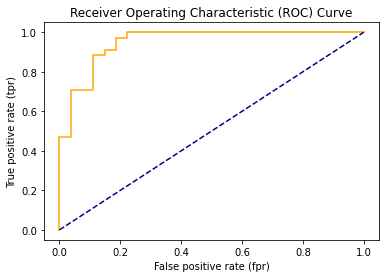

In [76]:
np.random.seed(77)

# Make predictions
y_probability = randomSearch_SGD.predict_proba(X_test)
y_probability_positive = y_probability[:, 1]

# Get fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probability_positive)
roc_curve_plot(fpr, tpr)

In [77]:
randomSearch_SGD_roc_auc = roc_auc_score(y_test, y_probability_positive)
randomSearch_SGD_roc_auc

0.9498910675381264

##### Confusion Matrix

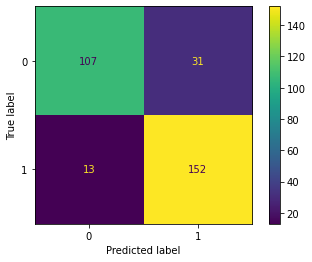

In [78]:
plot_confusion_matrix(randomSearch_SGD, X, y);

##### Cross-Validated Metrics

In [79]:
randomSearch_SGD_cv_metrics = cross_val_metrics(randomSearch_SGD, X, y)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] penalty=l2, max_iter=1480, learning_rate=optimal, alpha=10 ......
[CV]  penalty=l2, max_iter=1480, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l2, max_iter=1480, learning_rate=optimal, alpha=10 ......
[CV]  penalty=l2, max_iter=1480, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l2, max_iter=1480, learning_rate=optimal, alpha=10 ......
[CV]  penalty=l2, max_iter=1480, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l2, max_iter=1480, learning_rate=optimal, alpha=10 ......
[CV]  penalty=l2, max_iter=1480, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l2, max_iter=1480, learning_rate=optimal, alpha=10 ......
[CV]  penalty=l2, max_iter=1480, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l1, max_iter=570, learning_rate=optimal, alpha=1000 .....
[CV]  penalty=l1, max_iter=570, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l1, max_iter=570, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  penalty=elasticnet, max_iter=1210, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=elasticnet, max_iter=510, learning_rate=optimal, alpha=0.1 
[CV]  penalty=elasticnet, max_iter=510, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=elasticnet, max_iter=510, learning_rate=optimal, alpha=0.1 
[CV]  penalty=elasticnet, max_iter=510, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=elasticnet, max_iter=510, learning_rate=optimal, alpha=0.1 
[CV]  penalty=elasticnet, max_iter=510, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=elasticnet, max_iter=510, learning_rate=optimal, alpha=0.1 
[CV]  penalty=elasticnet, max_iter=510, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=elasticnet, max_iter=510, learning_rate=optimal, alpha=0.1 
[CV]  penalty=elasticnet, max_iter=510, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=l2, max_iter=520, learning_rate=optimal, alpha=1000 .....
[CV]  penalty=l2, max_iter=520, lea

[CV]  penalty=elasticnet, max_iter=1050, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=elasticnet, max_iter=1050, learning_rate=optimal, alpha=10 
[CV]  penalty=elasticnet, max_iter=1050, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=elasticnet, max_iter=1050, learning_rate=optimal, alpha=10 
[CV]  penalty=elasticnet, max_iter=1050, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=elasticnet, max_iter=1050, learning_rate=optimal, alpha=10 
[CV]  penalty=elasticnet, max_iter=1050, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=elasticnet, max_iter=1050, learning_rate=optimal, alpha=10 
[CV]  penalty=elasticnet, max_iter=1050, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=elasticnet, max_iter=1480, learning_rate=optimal, alpha=1 
[CV]  penalty=elasticnet, max_iter=1480, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=elasticnet, max_iter=1480, learning_rate=optimal, alpha=1 
[CV]  penalty=elasticnet, max_iter=14

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  penalty=elasticnet, max_iter=940, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=elasticnet, max_iter=940, learning_rate=optimal, alpha=1000 
[CV]  penalty=elasticnet, max_iter=940, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=elasticnet, max_iter=940, learning_rate=optimal, alpha=1000 
[CV]  penalty=elasticnet, max_iter=940, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=elasticnet, max_iter=940, learning_rate=optimal, alpha=1000 
[CV]  penalty=elasticnet, max_iter=940, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=elasticnet, max_iter=940, learning_rate=optimal, alpha=1000 
[CV]  penalty=elasticnet, max_iter=940, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l2, max_iter=1090, learning_rate=optimal, alpha=0.001 ...
[CV]  penalty=l2, max_iter=1090, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l2, max_iter=1090, learning_rate=optimal, alpha=0.001 ...
[CV]  penalty=l2, max_iter=1090, l

[CV]  penalty=l2, max_iter=620, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=elasticnet, max_iter=960, learning_rate=optimal, alpha=1 
[CV]  penalty=elasticnet, max_iter=960, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=elasticnet, max_iter=960, learning_rate=optimal, alpha=1 
[CV]  penalty=elasticnet, max_iter=960, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=elasticnet, max_iter=960, learning_rate=optimal, alpha=1 
[CV]  penalty=elasticnet, max_iter=960, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=elasticnet, max_iter=960, learning_rate=optimal, alpha=1 
[CV]  penalty=elasticnet, max_iter=960, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=elasticnet, max_iter=960, learning_rate=optimal, alpha=1 
[CV]  penalty=elasticnet, max_iter=960, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l2, max_iter=990, learning_rate=optimal, alpha=1 ........
[CV]  penalty=l2, max_iter=990, learning_rate=optimal, alpha=1, 

[CV]  penalty=l2, max_iter=900, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l2, max_iter=900, learning_rate=optimal, alpha=10 .......
[CV]  penalty=l2, max_iter=900, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l2, max_iter=900, learning_rate=optimal, alpha=10 .......
[CV]  penalty=l2, max_iter=900, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=elasticnet, max_iter=1210, learning_rate=optimal, alpha=0.01 
[CV]  penalty=elasticnet, max_iter=1210, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=elasticnet, max_iter=1210, learning_rate=optimal, alpha=0.01 
[CV]  penalty=elasticnet, max_iter=1210, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=elasticnet, max_iter=1210, learning_rate=optimal, alpha=0.01 
[CV]  penalty=elasticnet, max_iter=1210, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=elasticnet, max_iter=1210, learning_rate=optimal, alpha=0.01 
[CV]  penalty=elasticnet, max_iter=1210, learning_r

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] penalty=l1, max_iter=1230, learning_rate=optimal, alpha=100 .....
[CV]  penalty=l1, max_iter=1230, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l1, max_iter=1230, learning_rate=optimal, alpha=100 .....
[CV]  penalty=l1, max_iter=1230, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l1, max_iter=1230, learning_rate=optimal, alpha=100 .....
[CV]  penalty=l1, max_iter=1230, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l1, max_iter=860, learning_rate=optimal, alpha=0.1 ......
[CV]  penalty=l1, max_iter=860, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=l1, max_iter=860, learning_rate=optimal, alpha=0.1 ......
[CV]  penalty=l1, max_iter=860, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=l1, max_iter=860, learning_rate=optimal, alpha=0.1 ......
[CV]  penalty=l1, max_iter=860, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=l1, max_iter=860, learning_rate=optimal, alpha=0.1 ......
[CV]  penalty=l1, m

[CV]  penalty=elasticnet, max_iter=1300, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=l2, max_iter=1460, learning_rate=optimal, alpha=1000 ....
[CV]  penalty=l2, max_iter=1460, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l2, max_iter=1460, learning_rate=optimal, alpha=1000 ....
[CV]  penalty=l2, max_iter=1460, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l2, max_iter=1460, learning_rate=optimal, alpha=1000 ....
[CV]  penalty=l2, max_iter=1460, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l2, max_iter=1460, learning_rate=optimal, alpha=1000 ....
[CV]  penalty=l2, max_iter=1460, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l2, max_iter=1460, learning_rate=optimal, alpha=1000 ....
[CV]  penalty=l2, max_iter=1460, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=elasticnet, max_iter=1020, learning_rate=optimal, alpha=1 
[CV]  penalty=elasticnet, max_iter=1020, learning_rate=optimal, alpha=1, t

[CV]  penalty=elasticnet, max_iter=1060, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=elasticnet, max_iter=1060, learning_rate=optimal, alpha=0.001 
[CV]  penalty=elasticnet, max_iter=1060, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l1, max_iter=1410, learning_rate=optimal, alpha=0.1 .....
[CV]  penalty=l1, max_iter=1410, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=l1, max_iter=1410, learning_rate=optimal, alpha=0.1 .....
[CV]  penalty=l1, max_iter=1410, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=l1, max_iter=1410, learning_rate=optimal, alpha=0.1 .....
[CV]  penalty=l1, max_iter=1410, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=l1, max_iter=1410, learning_rate=optimal, alpha=0.1 .....
[CV]  penalty=l1, max_iter=1410, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=l1, max_iter=1410, learning_rate=optimal, alpha=0.1 .....
[CV]  penalty=l1, max_iter=1410, learning_rate=optimal, alpha=0

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  penalty=l2, max_iter=1040, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l2, max_iter=1040, learning_rate=optimal, alpha=1 .......
[CV]  penalty=l2, max_iter=1040, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l2, max_iter=1040, learning_rate=optimal, alpha=1 .......
[CV]  penalty=l2, max_iter=1040, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l2, max_iter=1040, learning_rate=optimal, alpha=1 .......
[CV]  penalty=l2, max_iter=1040, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=elasticnet, max_iter=740, learning_rate=optimal, alpha=0.01 
[CV]  penalty=elasticnet, max_iter=740, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=elasticnet, max_iter=740, learning_rate=optimal, alpha=0.01 
[CV]  penalty=elasticnet, max_iter=740, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=elasticnet, max_iter=740, learning_rate=optimal, alpha=0.01 
[CV]  penalty=elasticnet, max_iter=740, learning_rate=optimal, alpha=0.

[CV] penalty=l2, max_iter=920, learning_rate=optimal, alpha=0.01 .....
[CV]  penalty=l2, max_iter=920, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l2, max_iter=920, learning_rate=optimal, alpha=0.01 .....
[CV]  penalty=l2, max_iter=920, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l1, max_iter=760, learning_rate=optimal, alpha=0.1 ......
[CV]  penalty=l1, max_iter=760, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=l1, max_iter=760, learning_rate=optimal, alpha=0.1 ......
[CV]  penalty=l1, max_iter=760, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=l1, max_iter=760, learning_rate=optimal, alpha=0.1 ......
[CV]  penalty=l1, max_iter=760, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=l1, max_iter=760, learning_rate=optimal, alpha=0.1 ......
[CV]  penalty=l1, max_iter=760, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=l1, max_iter=760, learning_rate=optimal, alpha=0.1 ......
[CV]  penalty=l1, max

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  penalty=l2, max_iter=1320, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l2, max_iter=660, learning_rate=optimal, alpha=0.1 ......
[CV]  penalty=l2, max_iter=660, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=l2, max_iter=660, learning_rate=optimal, alpha=0.1 ......
[CV]  penalty=l2, max_iter=660, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=l2, max_iter=660, learning_rate=optimal, alpha=0.1 ......
[CV]  penalty=l2, max_iter=660, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=l2, max_iter=660, learning_rate=optimal, alpha=0.1 ......
[CV]  penalty=l2, max_iter=660, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=l2, max_iter=660, learning_rate=optimal, alpha=0.1 ......
[CV]  penalty=l2, max_iter=660, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=l2, max_iter=630, learning_rate=optimal, alpha=1000 .....
[CV]  penalty=l2, max_iter=630, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penal

[CV]  penalty=l1, max_iter=730, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l1, max_iter=730, learning_rate=optimal, alpha=0.001 ....
[CV]  penalty=l1, max_iter=730, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l1, max_iter=730, learning_rate=optimal, alpha=0.001 ....
[CV]  penalty=l1, max_iter=730, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l1, max_iter=730, learning_rate=optimal, alpha=0.001 ....
[CV]  penalty=l1, max_iter=730, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l1, max_iter=1220, learning_rate=optimal, alpha=100 .....
[CV]  penalty=l1, max_iter=1220, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l1, max_iter=1220, learning_rate=optimal, alpha=100 .....
[CV]  penalty=l1, max_iter=1220, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l1, max_iter=1220, learning_rate=optimal, alpha=100 .....
[CV]  penalty=l1, max_iter=1220, learning_rate=optimal, alpha=100, total=   0.0s
[CV

[CV]  penalty=l1, max_iter=1160, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l1, max_iter=1160, learning_rate=optimal, alpha=0.01 ....
[CV]  penalty=l1, max_iter=1160, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l1, max_iter=1160, learning_rate=optimal, alpha=0.01 ....
[CV]  penalty=l1, max_iter=1160, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l1, max_iter=1160, learning_rate=optimal, alpha=0.01 ....
[CV]  penalty=l1, max_iter=1160, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l1, max_iter=1160, learning_rate=optimal, alpha=0.01 ....
[CV]  penalty=l1, max_iter=1160, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=elasticnet, max_iter=670, learning_rate=optimal, alpha=0.001 
[CV]  penalty=elasticnet, max_iter=670, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=elasticnet, max_iter=670, learning_rate=optimal, alpha=0.001 
[CV]  penalty=elasticnet, max_iter=670, learning_rate=optimal, alp

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  penalty=elasticnet, max_iter=1200, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=elasticnet, max_iter=1290, learning_rate=optimal, alpha=10 
[CV]  penalty=elasticnet, max_iter=1290, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=elasticnet, max_iter=1290, learning_rate=optimal, alpha=10 
[CV]  penalty=elasticnet, max_iter=1290, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=elasticnet, max_iter=1290, learning_rate=optimal, alpha=10 
[CV]  penalty=elasticnet, max_iter=1290, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=elasticnet, max_iter=1290, learning_rate=optimal, alpha=10 
[CV]  penalty=elasticnet, max_iter=1290, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=elasticnet, max_iter=1290, learning_rate=optimal, alpha=10 
[CV]  penalty=elasticnet, max_iter=1290, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=elasticnet, max_iter=680, learning_rate=optimal, alpha=0.01 
[CV]  penalty=elasticnet, max_

[CV]  penalty=l2, max_iter=880, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l2, max_iter=880, learning_rate=optimal, alpha=100 ......
[CV]  penalty=l2, max_iter=880, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l2, max_iter=880, learning_rate=optimal, alpha=100 ......
[CV]  penalty=l2, max_iter=880, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=elasticnet, max_iter=500, learning_rate=optimal, alpha=100 
[CV]  penalty=elasticnet, max_iter=500, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=elasticnet, max_iter=500, learning_rate=optimal, alpha=100 
[CV]  penalty=elasticnet, max_iter=500, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=elasticnet, max_iter=500, learning_rate=optimal, alpha=100 
[CV]  penalty=elasticnet, max_iter=500, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=elasticnet, max_iter=500, learning_rate=optimal, alpha=100 
[CV]  penalty=elasticnet, max_iter=500, learning_rate=optimal,

[CV]  penalty=l1, max_iter=1470, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l1, max_iter=1470, learning_rate=optimal, alpha=0.01 ....
[CV]  penalty=l1, max_iter=1470, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l1, max_iter=1470, learning_rate=optimal, alpha=0.01 ....
[CV]  penalty=l1, max_iter=1470, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=elasticnet, max_iter=1410, learning_rate=optimal, alpha=1 
[CV]  penalty=elasticnet, max_iter=1410, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=elasticnet, max_iter=1410, learning_rate=optimal, alpha=1 
[CV]  penalty=elasticnet, max_iter=1410, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=elasticnet, max_iter=1410, learning_rate=optimal, alpha=1 
[CV]  penalty=elasticnet, max_iter=1410, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=elasticnet, max_iter=1410, learning_rate=optimal, alpha=1 
[CV]  penalty=elasticnet, max_iter=1410, learning_rate=optimal,

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] penalty=elasticnet, max_iter=1290, learning_rate=optimal, alpha=0.01 
[CV]  penalty=elasticnet, max_iter=1290, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=elasticnet, max_iter=1290, learning_rate=optimal, alpha=0.01 
[CV]  penalty=elasticnet, max_iter=1290, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=elasticnet, max_iter=1290, learning_rate=optimal, alpha=0.01 
[CV]  penalty=elasticnet, max_iter=1290, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=elasticnet, max_iter=1290, learning_rate=optimal, alpha=0.01 
[CV]  penalty=elasticnet, max_iter=1290, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=elasticnet, max_iter=950, learning_rate=optimal, alpha=10 
[CV]  penalty=elasticnet, max_iter=950, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=elasticnet, max_iter=950, learning_rate=optimal, alpha=10 
[CV]  penalty=elasticnet, max_iter=950, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=elasticn

[CV]  penalty=elasticnet, max_iter=1000, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=elasticnet, max_iter=1000, learning_rate=optimal, alpha=0.01 
[CV]  penalty=elasticnet, max_iter=1000, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=elasticnet, max_iter=1000, learning_rate=optimal, alpha=0.01 
[CV]  penalty=elasticnet, max_iter=1000, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=elasticnet, max_iter=580, learning_rate=optimal, alpha=1 
[CV]  penalty=elasticnet, max_iter=580, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=elasticnet, max_iter=580, learning_rate=optimal, alpha=1 
[CV]  penalty=elasticnet, max_iter=580, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=elasticnet, max_iter=580, learning_rate=optimal, alpha=1 
[CV]  penalty=elasticnet, max_iter=580, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=elasticnet, max_iter=580, learning_rate=optimal, alpha=1 
[CV]  penalty=elasticnet, max_iter=580

[CV]  penalty=l1, max_iter=1420, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l1, max_iter=1420, learning_rate=optimal, alpha=10 ......
[CV]  penalty=l1, max_iter=1420, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l1, max_iter=1420, learning_rate=optimal, alpha=10 ......
[CV]  penalty=l1, max_iter=1420, learning_rate=optimal, alpha=10, total=   0.0s
Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] penalty=l2, max_iter=850, learning_rate=optimal, alpha=1 ........
[CV]  penalty=l2, max_iter=850, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l2, max_iter=850, learning_rate=optimal, alpha=1 ........
[CV]  penalty=l2, max_iter=850, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l2, max_iter=850, learning_rate=optimal, alpha=1 ........
[CV]  penalty=l2, max_iter=850, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l2, max_iter=850, learning_rate=optimal, alpha=1 ........
[CV]  penalty=l2, max_iter=850, learni

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] penalty=elasticnet, max_iter=720, learning_rate=optimal, alpha=10 
[CV]  penalty=elasticnet, max_iter=720, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=elasticnet, max_iter=720, learning_rate=optimal, alpha=10 
[CV]  penalty=elasticnet, max_iter=720, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=elasticnet, max_iter=720, learning_rate=optimal, alpha=10 
[CV]  penalty=elasticnet, max_iter=720, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=elasticnet, max_iter=720, learning_rate=optimal, alpha=10 
[CV]  penalty=elasticnet, max_iter=720, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=elasticnet, max_iter=720, learning_rate=optimal, alpha=10 
[CV]  penalty=elasticnet, max_iter=720, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l2, max_iter=1440, learning_rate=optimal, alpha=0.001 ...
[CV]  penalty=l2, max_iter=1440, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l2, max_iter=1440, learning_rate=opti

[CV]  penalty=l2, max_iter=580, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l2, max_iter=580, learning_rate=optimal, alpha=1 ........
[CV]  penalty=l2, max_iter=580, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l2, max_iter=590, learning_rate=optimal, alpha=0.01 .....
[CV]  penalty=l2, max_iter=590, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l2, max_iter=590, learning_rate=optimal, alpha=0.01 .....
[CV]  penalty=l2, max_iter=590, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l2, max_iter=590, learning_rate=optimal, alpha=0.01 .....
[CV]  penalty=l2, max_iter=590, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l2, max_iter=590, learning_rate=optimal, alpha=0.01 .....
[CV]  penalty=l2, max_iter=590, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l2, max_iter=590, learning_rate=optimal, alpha=0.01 .....
[CV]  penalty=l2, max_iter=590, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  penalty=l1, max_iter=1200, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l1, max_iter=1200, learning_rate=optimal, alpha=1000 ....
[CV]  penalty=l1, max_iter=1200, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l1, max_iter=1020, learning_rate=optimal, alpha=1 .......
[CV]  penalty=l1, max_iter=1020, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l1, max_iter=1020, learning_rate=optimal, alpha=1 .......
[CV]  penalty=l1, max_iter=1020, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l1, max_iter=1020, learning_rate=optimal, alpha=1 .......
[CV]  penalty=l1, max_iter=1020, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l1, max_iter=1020, learning_rate=optimal, alpha=1 .......
[CV]  penalty=l1, max_iter=1020, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l1, max_iter=1020, learning_rate=optimal, alpha=1 .......
[CV]  penalty=l1, max_iter=1020, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l1

[CV]  penalty=l1, max_iter=1260, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l1, max_iter=1260, learning_rate=optimal, alpha=10 ......
[CV]  penalty=l1, max_iter=1260, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l1, max_iter=1260, learning_rate=optimal, alpha=10 ......
[CV]  penalty=l1, max_iter=1260, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l1, max_iter=1260, learning_rate=optimal, alpha=10 ......
[CV]  penalty=l1, max_iter=1260, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l1, max_iter=1260, learning_rate=optimal, alpha=10 ......
[CV]  penalty=l1, max_iter=1260, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l2, max_iter=740, learning_rate=optimal, alpha=1000 .....
[CV]  penalty=l2, max_iter=740, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l2, max_iter=740, learning_rate=optimal, alpha=1000 .....
[CV]  penalty=l2, max_iter=740, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty

[CV]  penalty=elasticnet, max_iter=990, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l1, max_iter=630, learning_rate=optimal, alpha=1000 .....
[CV]  penalty=l1, max_iter=630, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l1, max_iter=630, learning_rate=optimal, alpha=1000 .....
[CV]  penalty=l1, max_iter=630, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l1, max_iter=630, learning_rate=optimal, alpha=1000 .....
[CV]  penalty=l1, max_iter=630, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l1, max_iter=630, learning_rate=optimal, alpha=1000 .....
[CV]  penalty=l1, max_iter=630, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l1, max_iter=630, learning_rate=optimal, alpha=1000 .....
[CV]  penalty=l1, max_iter=630, learning_rate=optimal, alpha=1000, total=   0.0s
Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] penalty=elasticnet, max_iter=670, learning_rate=optimal, alpha=0.01 
[CV]  penalty=elas

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  penalty=l1, max_iter=530, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l1, max_iter=530, learning_rate=optimal, alpha=1 ........
[CV]  penalty=l1, max_iter=530, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l1, max_iter=530, learning_rate=optimal, alpha=1 ........
[CV]  penalty=l1, max_iter=530, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l1, max_iter=530, learning_rate=optimal, alpha=1 ........
[CV]  penalty=l1, max_iter=530, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l1, max_iter=530, learning_rate=optimal, alpha=1 ........
[CV]  penalty=l1, max_iter=530, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l2, max_iter=1220, learning_rate=optimal, alpha=10 ......
[CV]  penalty=l2, max_iter=1220, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l2, max_iter=1220, learning_rate=optimal, alpha=10 ......
[CV]  penalty=l2, max_iter=1220, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l2, max_ite

[CV]  penalty=elasticnet, max_iter=900, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l2, max_iter=1270, learning_rate=optimal, alpha=0.001 ...
[CV]  penalty=l2, max_iter=1270, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l2, max_iter=1270, learning_rate=optimal, alpha=0.001 ...
[CV]  penalty=l2, max_iter=1270, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l2, max_iter=1270, learning_rate=optimal, alpha=0.001 ...
[CV]  penalty=l2, max_iter=1270, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l2, max_iter=1270, learning_rate=optimal, alpha=0.001 ...
[CV]  penalty=l2, max_iter=1270, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l2, max_iter=1270, learning_rate=optimal, alpha=0.001 ...
[CV]  penalty=l2, max_iter=1270, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l1, max_iter=650, learning_rate=optimal, alpha=0.001 ....
[CV]  penalty=l1, max_iter=650, learning_rate=optimal, alpha=0.001, to

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  penalty=l2, max_iter=780, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l2, max_iter=780, learning_rate=optimal, alpha=100 ......
[CV]  penalty=l2, max_iter=780, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l1, max_iter=1020, learning_rate=optimal, alpha=100 .....
[CV]  penalty=l1, max_iter=1020, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l1, max_iter=1020, learning_rate=optimal, alpha=100 .....
[CV]  penalty=l1, max_iter=1020, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l1, max_iter=1020, learning_rate=optimal, alpha=100 .....
[CV]  penalty=l1, max_iter=1020, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l1, max_iter=1020, learning_rate=optimal, alpha=100 .....
[CV]  penalty=l1, max_iter=1020, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l1, max_iter=1020, learning_rate=optimal, alpha=100 .....
[CV]  penalty=l1, max_iter=1020, learning_rate=optimal, alpha=100, total=   0.0s
[CV] pena

[CV]  penalty=elasticnet, max_iter=880, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=elasticnet, max_iter=880, learning_rate=optimal, alpha=0.1 
[CV]  penalty=elasticnet, max_iter=880, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=elasticnet, max_iter=880, learning_rate=optimal, alpha=0.1 
[CV]  penalty=elasticnet, max_iter=880, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=elasticnet, max_iter=880, learning_rate=optimal, alpha=0.1 
[CV]  penalty=elasticnet, max_iter=880, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=elasticnet, max_iter=880, learning_rate=optimal, alpha=0.1 
[CV]  penalty=elasticnet, max_iter=880, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=l1, max_iter=730, learning_rate=optimal, alpha=0.001 ....
[CV]  penalty=l1, max_iter=730, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l1, max_iter=730, learning_rate=optimal, alpha=0.001 ....
[CV]  penalty=l1, max_iter=730, learning_rat

[CV]  penalty=l2, max_iter=530, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l2, max_iter=530, learning_rate=optimal, alpha=10 .......
[CV]  penalty=l2, max_iter=530, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l2, max_iter=530, learning_rate=optimal, alpha=10 .......
[CV]  penalty=l2, max_iter=530, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l2, max_iter=530, learning_rate=optimal, alpha=10 .......
[CV]  penalty=l2, max_iter=530, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l2, max_iter=530, learning_rate=optimal, alpha=10 .......
[CV]  penalty=l2, max_iter=530, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=elasticnet, max_iter=1430, learning_rate=optimal, alpha=10 
[CV]  penalty=elasticnet, max_iter=1430, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=elasticnet, max_iter=1430, learning_rate=optimal, alpha=10 
[CV]  penalty=elasticnet, max_iter=1430, learning_rate=optimal, alpha=10, total=   0.0s

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  penalty=elasticnet, max_iter=1030, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l1, max_iter=510, learning_rate=optimal, alpha=1 ........
[CV]  penalty=l1, max_iter=510, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l1, max_iter=510, learning_rate=optimal, alpha=1 ........
[CV]  penalty=l1, max_iter=510, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l1, max_iter=510, learning_rate=optimal, alpha=1 ........
[CV]  penalty=l1, max_iter=510, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l1, max_iter=510, learning_rate=optimal, alpha=1 ........
[CV]  penalty=l1, max_iter=510, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l1, max_iter=510, learning_rate=optimal, alpha=1 ........
[CV]  penalty=l1, max_iter=510, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l2, max_iter=1450, learning_rate=optimal, alpha=0.1 .....
[CV]  penalty=l2, max_iter=1450, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=

[CV]  penalty=elasticnet, max_iter=1190, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=elasticnet, max_iter=1190, learning_rate=optimal, alpha=10 
[CV]  penalty=elasticnet, max_iter=1190, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=elasticnet, max_iter=1190, learning_rate=optimal, alpha=10 
[CV]  penalty=elasticnet, max_iter=1190, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=elasticnet, max_iter=1190, learning_rate=optimal, alpha=10 
[CV]  penalty=elasticnet, max_iter=1190, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=elasticnet, max_iter=1190, learning_rate=optimal, alpha=10 
[CV]  penalty=elasticnet, max_iter=1190, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=elasticnet, max_iter=510, learning_rate=optimal, alpha=1000 
[CV]  penalty=elasticnet, max_iter=510, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=elasticnet, max_iter=510, learning_rate=optimal, alpha=1000 
[CV]  penalty=elasticnet, max_i

[CV]  penalty=l1, max_iter=1450, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l1, max_iter=1450, learning_rate=optimal, alpha=1 .......
[CV]  penalty=l1, max_iter=1450, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l1, max_iter=1450, learning_rate=optimal, alpha=1 .......
[CV]  penalty=l1, max_iter=1450, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l1, max_iter=1450, learning_rate=optimal, alpha=1 .......
[CV]  penalty=l1, max_iter=1450, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l1, max_iter=700, learning_rate=optimal, alpha=0.001 ....
[CV]  penalty=l1, max_iter=700, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l1, max_iter=700, learning_rate=optimal, alpha=0.001 ....
[CV]  penalty=l1, max_iter=700, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l1, max_iter=700, learning_rate=optimal, alpha=0.001 ....
[CV]  penalty=l1, max_iter=700, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] penalty=l2, max_iter=1030, learning_rate=optimal, alpha=0.01 ....
[CV]  penalty=l2, max_iter=1030, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l2, max_iter=1030, learning_rate=optimal, alpha=0.01 ....
[CV]  penalty=l2, max_iter=1030, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l2, max_iter=1030, learning_rate=optimal, alpha=0.01 ....
[CV]  penalty=l2, max_iter=1030, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l2, max_iter=1030, learning_rate=optimal, alpha=0.01 ....
[CV]  penalty=l2, max_iter=1030, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l2, max_iter=1030, learning_rate=optimal, alpha=0.01 ....
[CV]  penalty=l2, max_iter=1030, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=elasticnet, max_iter=630, learning_rate=optimal, alpha=100 
[CV]  penalty=elasticnet, max_iter=630, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=elasticnet, max_iter=630, learning_rate=optimal, alpha=100 


[CV]  penalty=elasticnet, max_iter=1010, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=elasticnet, max_iter=1010, learning_rate=optimal, alpha=1 
[CV]  penalty=elasticnet, max_iter=1010, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l2, max_iter=1040, learning_rate=optimal, alpha=10 ......
[CV]  penalty=l2, max_iter=1040, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l2, max_iter=1040, learning_rate=optimal, alpha=10 ......
[CV]  penalty=l2, max_iter=1040, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l2, max_iter=1040, learning_rate=optimal, alpha=10 ......
[CV]  penalty=l2, max_iter=1040, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l2, max_iter=1040, learning_rate=optimal, alpha=10 ......
[CV]  penalty=l2, max_iter=1040, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=l2, max_iter=1040, learning_rate=optimal, alpha=10 ......
[CV]  penalty=l2, max_iter=1040, learning_rate=optimal, alpha=10, total=   0.0s

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] penalty=l2, max_iter=960, learning_rate=optimal, alpha=0.001 ....
[CV]  penalty=l2, max_iter=960, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l2, max_iter=800, learning_rate=optimal, alpha=100 ......
[CV]  penalty=l2, max_iter=800, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l2, max_iter=800, learning_rate=optimal, alpha=100 ......
[CV]  penalty=l2, max_iter=800, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l2, max_iter=800, learning_rate=optimal, alpha=100 ......
[CV]  penalty=l2, max_iter=800, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l2, max_iter=800, learning_rate=optimal, alpha=100 ......
[CV]  penalty=l2, max_iter=800, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l2, max_iter=800, learning_rate=optimal, alpha=100 ......
[CV]  penalty=l2, max_iter=800, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=elasticnet, max_iter=930, learning_rate=optimal, alpha=100 
[CV]  penalty=elas

[CV]  penalty=l1, max_iter=1310, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l1, max_iter=1310, learning_rate=optimal, alpha=0.01 ....
[CV]  penalty=l1, max_iter=1310, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l2, max_iter=1160, learning_rate=optimal, alpha=0.001 ...
[CV]  penalty=l2, max_iter=1160, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l2, max_iter=1160, learning_rate=optimal, alpha=0.001 ...
[CV]  penalty=l2, max_iter=1160, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l2, max_iter=1160, learning_rate=optimal, alpha=0.001 ...
[CV]  penalty=l2, max_iter=1160, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l2, max_iter=1160, learning_rate=optimal, alpha=0.001 ...
[CV]  penalty=l2, max_iter=1160, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l2, max_iter=1160, learning_rate=optimal, alpha=0.001 ...
[CV]  penalty=l2, max_iter=1160, learning_rate=optimal, alpha=0.001, total=   

[CV]  penalty=l2, max_iter=660, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l2, max_iter=660, learning_rate=optimal, alpha=0.001 ....
[CV]  penalty=l2, max_iter=660, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l2, max_iter=660, learning_rate=optimal, alpha=0.001 ....
[CV]  penalty=l2, max_iter=660, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=elasticnet, max_iter=720, learning_rate=optimal, alpha=0.01 
[CV]  penalty=elasticnet, max_iter=720, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=elasticnet, max_iter=720, learning_rate=optimal, alpha=0.01 
[CV]  penalty=elasticnet, max_iter=720, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=elasticnet, max_iter=720, learning_rate=optimal, alpha=0.01 
[CV]  penalty=elasticnet, max_iter=720, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=elasticnet, max_iter=720, learning_rate=optimal, alpha=0.01 
[CV]  penalty=elasticnet, max_iter=720, learning_

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  penalty=l1, max_iter=790, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l1, max_iter=790, learning_rate=optimal, alpha=0.001 ....
[CV]  penalty=l1, max_iter=790, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l1, max_iter=790, learning_rate=optimal, alpha=0.001 ....
[CV]  penalty=l1, max_iter=790, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l1, max_iter=790, learning_rate=optimal, alpha=0.001 ....
[CV]  penalty=l1, max_iter=790, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l1, max_iter=790, learning_rate=optimal, alpha=0.001 ....
[CV]  penalty=l1, max_iter=790, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l2, max_iter=620, learning_rate=optimal, alpha=0.1 ......
[CV]  penalty=l2, max_iter=620, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=l2, max_iter=620, learning_rate=optimal, alpha=0.1 ......
[CV]  penalty=l2, max_iter=620, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV]

[CV]  penalty=elasticnet, max_iter=1180, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=elasticnet, max_iter=1180, learning_rate=optimal, alpha=0.001 
[CV]  penalty=elasticnet, max_iter=1180, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=elasticnet, max_iter=1180, learning_rate=optimal, alpha=0.001 
[CV]  penalty=elasticnet, max_iter=1180, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=elasticnet, max_iter=1180, learning_rate=optimal, alpha=0.001 
[CV]  penalty=elasticnet, max_iter=1180, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l2, max_iter=640, learning_rate=optimal, alpha=0.1 ......
[CV]  penalty=l2, max_iter=640, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=l2, max_iter=640, learning_rate=optimal, alpha=0.1 ......
[CV]  penalty=l2, max_iter=640, learning_rate=optimal, alpha=0.1, total=   0.0s
[CV] penalty=l2, max_iter=640, learning_rate=optimal, alpha=0.1 ......
[CV]  penalty=l2, max_iter=640, lea

[CV]  penalty=l2, max_iter=820, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l2, max_iter=820, learning_rate=optimal, alpha=0.01 .....
[CV]  penalty=l2, max_iter=820, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l2, max_iter=820, learning_rate=optimal, alpha=0.01 .....
[CV]  penalty=l2, max_iter=820, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l2, max_iter=820, learning_rate=optimal, alpha=0.01 .....
[CV]  penalty=l2, max_iter=820, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l2, max_iter=820, learning_rate=optimal, alpha=0.01 .....
[CV]  penalty=l2, max_iter=820, learning_rate=optimal, alpha=0.01, total=   0.0s
Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] penalty=l1, max_iter=590, learning_rate=optimal, alpha=100 ......
[CV]  penalty=l1, max_iter=590, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l1, max_iter=590, learning_rate=optimal, alpha=100 ......
[CV]  penalty=l1, max_iter=

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  penalty=l1, max_iter=1030, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=elasticnet, max_iter=530, learning_rate=optimal, alpha=100 
[CV]  penalty=elasticnet, max_iter=530, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=elasticnet, max_iter=530, learning_rate=optimal, alpha=100 
[CV]  penalty=elasticnet, max_iter=530, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=elasticnet, max_iter=530, learning_rate=optimal, alpha=100 
[CV]  penalty=elasticnet, max_iter=530, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=elasticnet, max_iter=530, learning_rate=optimal, alpha=100 
[CV]  penalty=elasticnet, max_iter=530, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=elasticnet, max_iter=530, learning_rate=optimal, alpha=100 
[CV]  penalty=elasticnet, max_iter=530, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l2, max_iter=970, learning_rate=optimal, alpha=0.001 ....
[CV]  penalty=l2, max_iter=970, learning_rat

[CV]  penalty=l2, max_iter=980, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l2, max_iter=980, learning_rate=optimal, alpha=100 ......
[CV]  penalty=l2, max_iter=980, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l2, max_iter=980, learning_rate=optimal, alpha=100 ......
[CV]  penalty=l2, max_iter=980, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=elasticnet, max_iter=1190, learning_rate=optimal, alpha=1000 
[CV]  penalty=elasticnet, max_iter=1190, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=elasticnet, max_iter=1190, learning_rate=optimal, alpha=1000 
[CV]  penalty=elasticnet, max_iter=1190, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=elasticnet, max_iter=1190, learning_rate=optimal, alpha=1000 
[CV]  penalty=elasticnet, max_iter=1190, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=elasticnet, max_iter=1190, learning_rate=optimal, alpha=1000 
[CV]  penalty=elasticnet, max_iter=1190, learnin

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  penalty=l1, max_iter=1270, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l1, max_iter=1270, learning_rate=optimal, alpha=1 .......
[CV]  penalty=l1, max_iter=1270, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l2, max_iter=510, learning_rate=optimal, alpha=0.01 .....
[CV]  penalty=l2, max_iter=510, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l2, max_iter=510, learning_rate=optimal, alpha=0.01 .....
[CV]  penalty=l2, max_iter=510, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l2, max_iter=510, learning_rate=optimal, alpha=0.01 .....
[CV]  penalty=l2, max_iter=510, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l2, max_iter=510, learning_rate=optimal, alpha=0.01 .....
[CV]  penalty=l2, max_iter=510, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l2, max_iter=510, learning_rate=optimal, alpha=0.01 .....
[CV]  penalty=l2, max_iter=510, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalt

[CV]  penalty=l1, max_iter=890, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l1, max_iter=890, learning_rate=optimal, alpha=100 ......
[CV]  penalty=l1, max_iter=890, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l1, max_iter=890, learning_rate=optimal, alpha=100 ......
[CV]  penalty=l1, max_iter=890, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l1, max_iter=890, learning_rate=optimal, alpha=100 ......
[CV]  penalty=l1, max_iter=890, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l1, max_iter=890, learning_rate=optimal, alpha=100 ......
[CV]  penalty=l1, max_iter=890, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=elasticnet, max_iter=660, learning_rate=optimal, alpha=100 
[CV]  penalty=elasticnet, max_iter=660, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=elasticnet, max_iter=660, learning_rate=optimal, alpha=100 
[CV]  penalty=elasticnet, max_iter=660, learning_rate=optimal, alpha=100, total=  

[CV]  penalty=l2, max_iter=1150, learning_rate=optimal, alpha=0.001, total=   0.0s
Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] penalty=elasticnet, max_iter=1120, learning_rate=optimal, alpha=1 
[CV]  penalty=elasticnet, max_iter=1120, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=elasticnet, max_iter=1120, learning_rate=optimal, alpha=1 
[CV]  penalty=elasticnet, max_iter=1120, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=elasticnet, max_iter=1120, learning_rate=optimal, alpha=1 
[CV]  penalty=elasticnet, max_iter=1120, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=elasticnet, max_iter=1120, learning_rate=optimal, alpha=1 
[CV]  penalty=elasticnet, max_iter=1120, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=elasticnet, max_iter=1120, learning_rate=optimal, alpha=1 
[CV]  penalty=elasticnet, max_iter=1120, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l2, max_iter=1300, learning_rate=optimal, alpha

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  penalty=elasticnet, max_iter=1360, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=elasticnet, max_iter=1360, learning_rate=optimal, alpha=1 
[CV]  penalty=elasticnet, max_iter=1360, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=elasticnet, max_iter=1360, learning_rate=optimal, alpha=1 
[CV]  penalty=elasticnet, max_iter=1360, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=elasticnet, max_iter=1360, learning_rate=optimal, alpha=1 
[CV]  penalty=elasticnet, max_iter=1360, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l2, max_iter=580, learning_rate=optimal, alpha=1 ........
[CV]  penalty=l2, max_iter=580, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l2, max_iter=580, learning_rate=optimal, alpha=1 ........
[CV]  penalty=l2, max_iter=580, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=l2, max_iter=580, learning_rate=optimal, alpha=1 ........
[CV]  penalty=l2, max_iter=580, learning_rate=optimal, alpha=1, tot

[CV] penalty=elasticnet, max_iter=1450, learning_rate=optimal, alpha=1 
[CV]  penalty=elasticnet, max_iter=1450, learning_rate=optimal, alpha=1, total=   0.0s
[CV] penalty=elasticnet, max_iter=1030, learning_rate=optimal, alpha=1000 
[CV]  penalty=elasticnet, max_iter=1030, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=elasticnet, max_iter=1030, learning_rate=optimal, alpha=1000 
[CV]  penalty=elasticnet, max_iter=1030, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=elasticnet, max_iter=1030, learning_rate=optimal, alpha=1000 
[CV]  penalty=elasticnet, max_iter=1030, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=elasticnet, max_iter=1030, learning_rate=optimal, alpha=1000 
[CV]  penalty=elasticnet, max_iter=1030, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=elasticnet, max_iter=1030, learning_rate=optimal, alpha=1000 
[CV]  penalty=elasticnet, max_iter=1030, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l1,

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  penalty=elasticnet, max_iter=1130, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=elasticnet, max_iter=1130, learning_rate=optimal, alpha=100 
[CV]  penalty=elasticnet, max_iter=1130, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=elasticnet, max_iter=520, learning_rate=optimal, alpha=10 
[CV]  penalty=elasticnet, max_iter=520, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=elasticnet, max_iter=520, learning_rate=optimal, alpha=10 
[CV]  penalty=elasticnet, max_iter=520, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=elasticnet, max_iter=520, learning_rate=optimal, alpha=10 
[CV]  penalty=elasticnet, max_iter=520, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=elasticnet, max_iter=520, learning_rate=optimal, alpha=10 
[CV]  penalty=elasticnet, max_iter=520, learning_rate=optimal, alpha=10, total=   0.0s
[CV] penalty=elasticnet, max_iter=520, learning_rate=optimal, alpha=10 
[CV]  penalty=elasticnet, max_iter=520, 

[CV]  penalty=l2, max_iter=610, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l2, max_iter=610, learning_rate=optimal, alpha=0.01 .....
[CV]  penalty=l2, max_iter=610, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l2, max_iter=610, learning_rate=optimal, alpha=0.01 .....
[CV]  penalty=l2, max_iter=610, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l2, max_iter=610, learning_rate=optimal, alpha=0.01 .....
[CV]  penalty=l2, max_iter=610, learning_rate=optimal, alpha=0.01, total=   0.0s
[CV] penalty=l1, max_iter=1490, learning_rate=optimal, alpha=1000 ....
[CV]  penalty=l1, max_iter=1490, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l1, max_iter=1490, learning_rate=optimal, alpha=1000 ....
[CV]  penalty=l1, max_iter=1490, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l1, max_iter=1490, learning_rate=optimal, alpha=1000 ....
[CV]  penalty=l1, max_iter=1490, learning_rate=optimal, alpha=1000, total=   0.0s
[CV]

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] penalty=elasticnet, max_iter=620, learning_rate=optimal, alpha=100 
[CV]  penalty=elasticnet, max_iter=620, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=elasticnet, max_iter=620, learning_rate=optimal, alpha=100 
[CV]  penalty=elasticnet, max_iter=620, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=elasticnet, max_iter=620, learning_rate=optimal, alpha=100 
[CV]  penalty=elasticnet, max_iter=620, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=elasticnet, max_iter=620, learning_rate=optimal, alpha=100 
[CV]  penalty=elasticnet, max_iter=620, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=elasticnet, max_iter=620, learning_rate=optimal, alpha=100 
[CV]  penalty=elasticnet, max_iter=620, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l2, max_iter=1000, learning_rate=optimal, alpha=1000 ....
[CV]  penalty=l2, max_iter=1000, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=l2, max_iter=1000, learning_r

[CV] penalty=l2, max_iter=1410, learning_rate=optimal, alpha=100 .....
[CV]  penalty=l2, max_iter=1410, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l2, max_iter=1410, learning_rate=optimal, alpha=100 .....
[CV]  penalty=l2, max_iter=1410, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l2, max_iter=1410, learning_rate=optimal, alpha=100 .....
[CV]  penalty=l2, max_iter=1410, learning_rate=optimal, alpha=100, total=   0.0s
[CV] penalty=l2, max_iter=1470, learning_rate=optimal, alpha=0.001 ...
[CV]  penalty=l2, max_iter=1470, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l2, max_iter=1470, learning_rate=optimal, alpha=0.001 ...
[CV]  penalty=l2, max_iter=1470, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l2, max_iter=1470, learning_rate=optimal, alpha=0.001 ...
[CV]  penalty=l2, max_iter=1470, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l2, max_iter=1470, learning_rate=optimal, alpha=0.001 ...
[CV]  penal

[CV]  penalty=l2, max_iter=1460, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l2, max_iter=1460, learning_rate=optimal, alpha=0.001 ...
[CV]  penalty=l2, max_iter=1460, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l2, max_iter=1460, learning_rate=optimal, alpha=0.001 ...
[CV]  penalty=l2, max_iter=1460, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=l2, max_iter=1460, learning_rate=optimal, alpha=0.001 ...
[CV]  penalty=l2, max_iter=1460, learning_rate=optimal, alpha=0.001, total=   0.0s
[CV] penalty=elasticnet, max_iter=1120, learning_rate=optimal, alpha=1000 
[CV]  penalty=elasticnet, max_iter=1120, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=elasticnet, max_iter=1120, learning_rate=optimal, alpha=1000 
[CV]  penalty=elasticnet, max_iter=1120, learning_rate=optimal, alpha=1000, total=   0.0s
[CV] penalty=elasticnet, max_iter=1120, learning_rate=optimal, alpha=1000 
[CV]  penalty=elasticnet, max_iter=1120, learning_

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.7s finished


##### `SGDClassifier` `RandomizedSearchCV` Summary

In [80]:
print('The results on the RandomizedSearchCV SGDClassifier Model are as follows:\n')
print(f'Cross-Validated Accuracy: {np.mean(randomSearch_SGD_cvs)}')
print(f'AUC_ROC: {randomSearch_SGD_roc_auc}')
print(f'CV Metrics: {randomSearch_SGD_cv_metrics}')

The results on the RandomizedSearchCV SGDClassifier Model are as follows:

Cross-Validated Accuracy: 0.8281967213114754
AUC_ROC: 0.9498910675381264
CV Metrics: {'accuracy': 0.82, 'precision': 0.81, 'recall': 0.92, 'f1': 0.85}


#### 5.2.2 `GridSearchCV`

In [81]:
randomSearch_SGD.best_params_

{'penalty': 'elasticnet',
 'max_iter': 710,
 'learning_rate': 'optimal',
 'alpha': 0.01}

In [82]:
SGD_grid = {
    "penalty": ["elasticnet"],
    "max_iter": np.arange(650, 800, 10),
    "learning_rate": ["optimal"],
    "alpha": np.arange(0.01, 0.1, 0.01)
}

# Setup random seed
np.random.seed(77)
ss = StandardScaler()

# Make the data
X = heart.drop("target", axis=1)
y = heart["target"]

# Normalizing the data
X = ss.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


# Instantiating our model
SGD = SGDClassifier(loss="log")

# Using RandomizedSearchCV
gridSearch_SGD = GridSearchCV(SGD,
                              param_grid=SGD_grid,
                              cv=5,
                              verbose=True)
# Fitting our model
gridSearch_SGD.fit(X_train, y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed:    2.7s finished


GridSearchCV(cv=5, estimator=SGDClassifier(loss='log'),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
                         'learning_rate': ['optimal'],
                         'max_iter': array([650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770,
       780, 790]),
                         'penalty': ['elasticnet']},
             verbose=True)

In [83]:
gridSearch_SGD.best_params_

{'alpha': 0.02,
 'learning_rate': 'optimal',
 'max_iter': 670,
 'penalty': 'elasticnet'}

##### `GridSearchCV` Cross-Validated Accuracy

In [84]:
gridSearch_SGD_cvs = cross_val_score(gridSearch_SGD, X, y, cv=5)
np.mean(gridSearch_SGD_cvs)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed:    2.6s finished


0.831584699453552

##### Area under Reciever Operating Characteristic Curve (AUC/ROC)

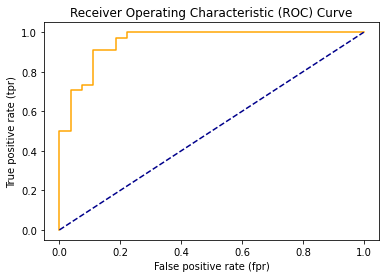

In [85]:
np.random.seed(77)

# Make predictions
y_probability = gridSearch_SGD.predict_proba(X_test)
y_probability_positive = y_probability[:, 1]

# Get fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probability_positive)
roc_curve_plot(fpr, tpr)

In [86]:
gridSearch_SGD_roc_auc = roc_auc_score(y_test, y_probability_positive)
gridSearch_SGD_roc_auc

0.9531590413943355

##### Confusion Matrix

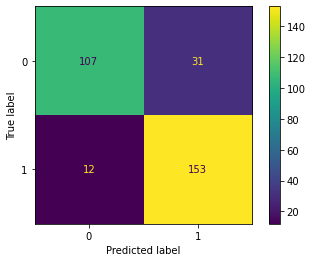

In [87]:
plot_confusion_matrix(gridSearch_SGD, X, y);

##### Cross-Validated Metrics

In [88]:
gridSearch_SGD_cv_metrics = cross_val_metrics(gridSearch_SGD, X, y)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 135 candidates, totalling 675 fits
Accuracy: 82.83%
Precision: 80.82%
Recall: 91.52%
f1: 85.54%


[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed:    2.5s finished


##### `GridSearchCV` Summary

In [89]:
print('The results on the GridSearchCV SGDClassifier Model are as follows:\n')
print(f'Cross-Validated Accuracy: {np.mean(gridSearch_SGD_cvs)}')
print(f'AUC_ROC: {gridSearch_SGD_roc_auc}')
print(f'CV Metrics: {gridSearch_SGD_cv_metrics}')

The results on the GridSearchCV SGDClassifier Model are as follows:

Cross-Validated Accuracy: 0.831584699453552
AUC_ROC: 0.9531590413943355
CV Metrics: {'accuracy': 0.83, 'precision': 0.81, 'recall': 0.92, 'f1': 0.86}


## 5.3 `SGDClassifier` Results Comparison
A comparison of the baseline, randomizedSearch, and gridSearch models

##### Cross-Validated Accuracy

In [90]:
print(f'Baseline CVS: {np.mean(baseline_SGD_cvs)}')
print(f'RandomSearch CVS: {np.mean(randomSearch_SGD_cvs)}')
print(f'GridSearch CVS: {np.mean(gridSearch_SGD_cvs)}')

Baseline CVS: 0.7919672131147542
RandomSearch CVS: 0.8281967213114754
GridSearch CVS: 0.831584699453552


##### ROC AUC Score

In [92]:
print(f'Baseline ROC_AUC: {baseline_SGD_roc_auc}')
print(f'RandomSearch ROC_AUC: {randomSearch_SGD_roc_auc}')
print(f'GridSearch ROC_AUC: {gridSearch_SGD_roc_auc}')

Baseline ROC_AUC: 0.9302832244008714
RandomSearch ROC_AUC: 0.9498910675381264
GridSearch ROC_AUC: 0.9531590413943355


##### Metrics

In [94]:
print(f'Baseline Metrics: {baseline_SGD_metrics}')
print(f'Cross-Val Baseline Metrics {baseline_SGD_cv_metrics}')
print("--------------------------------------------------------------------------------------------------")
print(f'Cross-Val RandomSearch Metrics {randomSearch_SGD_cv_metrics}')
print("--------------------------------------------------------------------------------------------------")
print(f'Cross-Val GridSearch Metrics {gridSearch_SGD_cv_metrics}')

Baseline Metrics: {'accuracy': 0.85, 'precision': 0.82, 'recall': 0.94, 'f1': 0.88}
Cross-Val Baseline Metrics {'accuracy': 0.79, 'precision': 0.81, 'recall': 0.81, 'f1': 0.75}
--------------------------------------------------------------------------------------------------
Cross-Val RandomSearch Metrics {'accuracy': 0.82, 'precision': 0.81, 'recall': 0.92, 'f1': 0.85}
--------------------------------------------------------------------------------------------------
Cross-Val GridSearch Metrics {'accuracy': 0.83, 'precision': 0.81, 'recall': 0.92, 'f1': 0.86}


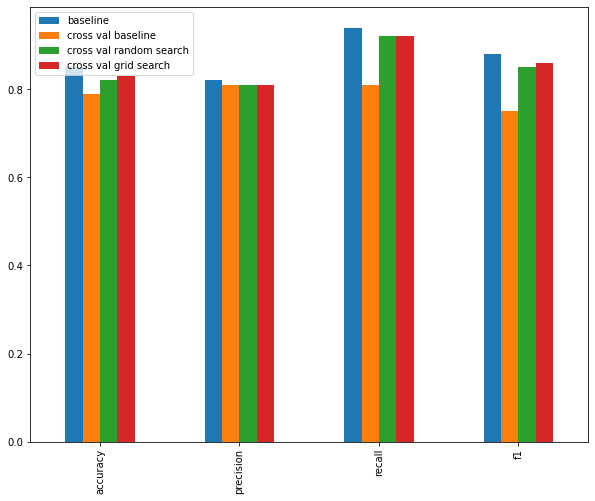

In [96]:
SGD_metrics_comparison = pd.DataFrame({"baseline": baseline_SGD_metrics,
                                           "cross val baseline": baseline_SGD_cv_metrics,
                                           "cross val random search": randomSearch_SGD_cv_metrics,
                                           "cross val grid search": gridSearch_SGD_cv_metrics}
                                          )
SGD_metrics_comparison.plot.bar(figsize=(10, 8));

## 6. `GaussianNB`

### 6.1 Baseline `GuassianNB`

In [6]:
from sklearn.naive_bayes import GaussianNB

# Setup random seed
np.random.seed(77)
ss = StandardScaler()

# Make the data
X = heart.drop("target", axis=1)
y = heart["target"]

# Normalizing the data
X = ss.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

#### Cross-Validated Accuracy

In [7]:
# Random Seed for reproducable results
np.random.seed(77)

baseline_GNB_cvs = cross_val_score(GNB, X, y, cv=5)
np.mean(baseline_GNB_cvs)

print(f'The non cross-validated score for the baseline model is: {GNB.score(X_test, y_test)}')
print(f'The cross-validated score for the baseline model is: {np.mean(baseline_GNB_cvs)}')

The non cross-validated score for the baseline model is: 0.8688524590163934
The cross-validated score for the baseline model is: 0.8050819672131148


#### Area under Reciever Operating Characteristic Curve (AUC/ROC)

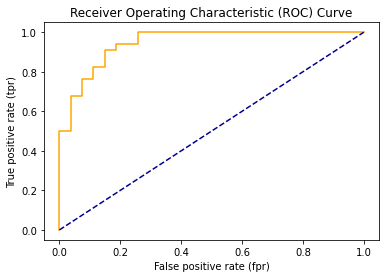

In [8]:
np.random.seed(77)

# Make predictions
y_probability = GNB.predict_proba(X_test)
y_probability_positive = y_probability[:, 1]

# Get fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probability_positive)
roc_curve_plot(fpr, tpr)

In [9]:
baseline_GNB_roc_auc = roc_auc_score(y_test, y_probability_positive)
baseline_GNB_roc_auc

0.9466230936819171

#### Confusion Matrix

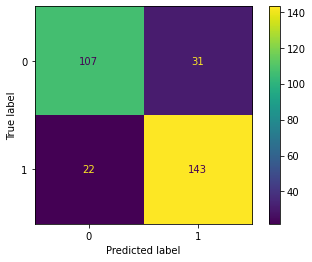

In [10]:
plot_confusion_matrix(GNB, X, y);

#### Metrics

In [11]:
GNB_y_preds = GNB.predict(X_test)
baseline_GNB_metrics = model_prediction(y_test, GNB_y_preds)

Accuracy: 86.89%
Precision: 86.11%
Recall: 91.18%
f1: 88.57%


#### Cross-Validated Metrics

In [12]:
baseline_GNB_cv_metrics = cross_val_metrics(GNB, X, y)

Accuracy: 80.51%
Precision: 81.57%
Recall: 83.64%
f1: 82.46%


#### Baseline `GaussianNB` Summary

In [13]:
print('The results on the Baseline GaussianNB Model are as follows:\n')
print(f'Cross-Validated Accuracy: {np.mean(baseline_GNB_cvs)}')
print(f'AUC_ROC: {baseline_GNB_roc_auc}')
print(f'Metrics: {baseline_GNB_metrics}')
print(f'CV Metrics: {baseline_GNB_cv_metrics}')

The results on the Baseline GaussianNB Model are as follows:

Cross-Validated Accuracy: 0.8050819672131148
AUC_ROC: 0.9466230936819171
Metrics: {'accuracy': 0.87, 'precision': 0.86, 'recall': 0.91, 'f1': 0.89}
CV Metrics: {'accuracy': 0.81, 'precision': 0.82, 'recall': 0.84, 'f1': 0.82}


###  6.2 `GaussianNB` Hyperparameter adjustments/testing using `RandomizedSearchCV` and `GridSearchCV`

#### 6.2.1 `RandomizedSearchCV`

In [14]:
GNB_random_grid = {'var_smoothing': np.logspace(0,-9, num=90)}

# Setup random seed
np.random.seed(77)
ss = StandardScaler()

# Make the data
X = heart.drop("target", axis=1)
y = heart["target"]

# Normalizing the data
X = ss.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


# Instantiating our model
GNB = GaussianNB()

# Using RandomizedSearchCV
randomSearch_GNB = RandomizedSearchCV(estimator=GNB,
                            param_distributions=GNB_random_grid, 
                            n_iter=35, 
                            cv=5, # Automatically crossvalidates it for us
                            verbose=2)
# Fitting our model
randomSearch_GNB.fit(X_train, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] var_smoothing=0.00028885118749227574 ............................
[CV] ............. var_smoothing=0.00028885118749227574, total=   0.0s
[CV] var_smoothing=0.00028885118749227574 ............................
[CV] ............. var_smoothing=0.00028885118749227574, total=   0.0s
[CV] var_smoothing=0.00028885118749227574 ............................
[CV] ............. var_smoothing=0.00028885118749227574, total=   0.0s
[CV] var_smoothing=0.00028885118749227574 ............................
[CV] ............. var_smoothing=0.00028885118749227574, total=   0.0s
[CV] var_smoothing=0.00028885118749227574 ............................
[CV] ............. var_smoothing=0.00028885118749227574, total=   0.0s
[CV] var_smoothing=1.1090313431155938e-05 ............................
[CV] ............. var_smoothing=1.1090313431155938e-05, total=   0.0s
[CV] var_smoothing=1.1090313431155938e-05 ............................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............. var_smoothing=1.3998045980139518e-05, total=   0.0s
[CV] var_smoothing=1.3998045980139518e-05 ............................
[CV] ............. var_smoothing=1.3998045980139518e-05, total=   0.0s
[CV] var_smoothing=1.3998045980139518e-05 ............................
[CV] ............. var_smoothing=1.3998045980139518e-05, total=   0.0s
[CV] var_smoothing=1.3998045980139518e-05 ............................
[CV] ............. var_smoothing=1.3998045980139518e-05, total=   0.0s
[CV] var_smoothing=1.3998045980139518e-05 ............................
[CV] ............. var_smoothing=1.3998045980139518e-05, total=   0.0s
[CV] var_smoothing=2.672798950712904e-07 .............................
[CV] .............. var_smoothing=2.672798950712904e-07, total=   0.0s
[CV] var_smoothing=2.672798950712904e-07 .............................
[CV] .............. var_smoothing=2.672798950712904e-07, total=   0.0s
[CV] var_smoothing=2.672798950712904e-07 .............................
[CV] .

[CV] ............. var_smoothing=2.0108088432108064e-09, total=   0.0s
[CV] var_smoothing=2.0108088432108064e-09 ............................
[CV] ............. var_smoothing=2.0108088432108064e-09, total=   0.0s
[CV] var_smoothing=4.2580767304121514e-07 ............................
[CV] ............. var_smoothing=4.2580767304121514e-07, total=   0.0s
[CV] var_smoothing=4.2580767304121514e-07 ............................
[CV] ............. var_smoothing=4.2580767304121514e-07, total=   0.0s
[CV] var_smoothing=4.2580767304121514e-07 ............................
[CV] ............. var_smoothing=4.2580767304121514e-07, total=   0.0s
[CV] var_smoothing=4.2580767304121514e-07 ............................
[CV] ............. var_smoothing=4.2580767304121514e-07, total=   0.0s
[CV] var_smoothing=4.2580767304121514e-07 ............................
[CV] ............. var_smoothing=4.2580767304121514e-07, total=   0.0s
[CV] var_smoothing=0.001860642434215986 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_iter=35,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 7.92275825e-01, 6.27700983e-01, 4.97312315e-01,
       3.94008524e-01, 3.12163429e-01, 2.47319538e-01, 1.95945291e-01,
       1.55242717e-01, 1.22995052e-01, 9.74460063e-02, 7.72041151e-02,
       6.11669540e-02, 4.84610990e-02, 3.83945572e-02, 3.04190795e-02,
       2.4100301...
       3.37357126e-07, 2.67279895e-07, 2.11759399e-07, 1.67771853e-07,
       1.32921583e-07, 1.05310557e-07, 8.34350085e-08, 6.61035402e-08,
       5.23722369e-08, 4.14932572e-08, 3.28741046e-08, 2.60453583e-08,
       2.06351078e-08, 1.63486970e-08, 1.29526774e-08, 1.02620932e-08,
       8.13040837e-09, 6.44152600e-09, 5.10346533e-09, 4.04335220e-09,
       3.20345020e-09, 2.53801615e-09, 2.01080884e-09, 1.59311524e-09,
       1.26218669e-09, 1.00000000e-09])},
                   verbose=2)

In [15]:
# checking best params (useful for gridsearch later)
randomSearch_GNB.best_params_

{'var_smoothing': 0.3940085244553466}

#### Cross-Validated Accuracy 

In [16]:
randomSearch_GNB_cvs = cross_val_score(randomSearch_GNB, X, y, cv=5)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] var_smoothing=2.6045358346754064e-08 ............................
[CV] ............. var_smoothing=2.6045358346754064e-08, total=   0.0s
[CV] var_smoothing=2.6045358346754064e-08 ............................
[CV] ............. var_smoothing=2.6045358346754064e-08, total=   0.0s
[CV] var_smoothing=2.6045358346754064e-08 ............................
[CV] ............. var_smoothing=2.6045358346754064e-08, total=   0.0s
[CV] var_smoothing=2.6045358346754064e-08 ............................
[CV] ............. var_smoothing=2.6045358346754064e-08, total=   0.0s
[CV] var_smoothing=2.6045358346754064e-08 ............................
[CV] ............. var_smoothing=2.6045358346754064e-08, total=   0.0s
[CV] var_smoothing=0.00046017322765138014 ............................
[CV] ............. var_smoothing=0.00046017322765138014, total=   0.0s
[CV] var_smoothing=0.00046017322765138014 ............................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] var_smoothing=2.1175939944708895e-07 ............................
[CV] ............. var_smoothing=2.1175939944708895e-07, total=   0.0s
[CV] var_smoothing=2.1175939944708895e-07 ............................
[CV] ............. var_smoothing=2.1175939944708895e-07, total=   0.0s
[CV] var_smoothing=2.1175939944708895e-07 ............................
[CV] ............. var_smoothing=2.1175939944708895e-07, total=   0.0s
[CV] var_smoothing=2.1175939944708895e-07 ............................
[CV] ............. var_smoothing=2.1175939944708895e-07, total=   0.0s
[CV] var_smoothing=2.742851196678697e-06 .............................
[CV] .............. var_smoothing=2.742851196678697e-06, total=   0.0s
[CV] var_smoothing=2.742851196678697e-06 .............................
[CV] .............. var_smoothing=2.742851196678697e-06, total=   0.0s
[CV] var_smoothing=2.742851196678697e-06 .............................
[CV] .............. var_smoothing=2.742851196678697e-06, total=   0.0s
[CV] 

[CV] .............. var_smoothing=5.515349441892866e-06, total=   0.0s
[CV] var_smoothing=5.515349441892866e-06 .............................
[CV] .............. var_smoothing=5.515349441892866e-06, total=   0.0s
[CV] var_smoothing=5.515349441892866e-06 .............................
[CV] .............. var_smoothing=5.515349441892866e-06, total=   0.0s
[CV] var_smoothing=5.515349441892866e-06 .............................
[CV] .............. var_smoothing=5.515349441892866e-06, total=   0.0s
[CV] var_smoothing=2.8147394644535967e-05 ............................
[CV] ............. var_smoothing=2.8147394644535967e-05, total=   0.0s
[CV] var_smoothing=2.8147394644535967e-05 ............................
[CV] ............. var_smoothing=2.8147394644535967e-05, total=   0.0s
[CV] var_smoothing=2.8147394644535967e-05 ............................
[CV] ............. var_smoothing=2.8147394644535967e-05, total=   0.0s
[CV] var_smoothing=2.8147394644535967e-05 ............................
[CV] .

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] var_smoothing=0.03839455716778906 ...............................
[CV] ................ var_smoothing=0.03839455716778906, total=   0.0s
[CV] var_smoothing=0.03839455716778906 ...............................
[CV] ................ var_smoothing=0.03839455716778906, total=   0.0s
[CV] var_smoothing=1.6348697045064187e-08 ............................
[CV] ............. var_smoothing=1.6348697045064187e-08, total=   0.0s
[CV] var_smoothing=1.6348697045064187e-08 ............................
[CV] ............. var_smoothing=1.6348697045064187e-08, total=   0.0s
[CV] var_smoothing=1.6348697045064187e-08 ............................
[CV] ............. var_smoothing=1.6348697045064187e-08, total=   0.0s
[CV] var_smoothing=1.6348697045064187e-08 ............................
[CV] ............. var_smoothing=1.6348697045064187e-08, total=   0.0s
[CV] var_smoothing=1.6348697045064187e-08 ............................
[CV] ............. var_smoothing=1.6348697045064187e-08, total=   0.0s
[CV] 

[CV] var_smoothing=4.149325720214717e-08 .............................
[CV] .............. var_smoothing=4.149325720214717e-08, total=   0.0s
[CV] var_smoothing=4.149325720214717e-08 .............................
[CV] .............. var_smoothing=4.149325720214717e-08, total=   0.0s
[CV] var_smoothing=4.149325720214717e-08 .............................
[CV] .............. var_smoothing=4.149325720214717e-08, total=   0.0s
[CV] var_smoothing=6.783606914108303e-07 .............................
[CV] .............. var_smoothing=6.783606914108303e-07, total=   0.0s
[CV] var_smoothing=6.783606914108303e-07 .............................
[CV] .............. var_smoothing=6.783606914108303e-07, total=   0.0s
[CV] var_smoothing=6.783606914108303e-07 .............................
[CV] .............. var_smoothing=6.783606914108303e-07, total=   0.0s
[CV] var_smoothing=6.783606914108303e-07 .............................
[CV] .............. var_smoothing=6.783606914108303e-07, total=   0.0s
[CV] v

[CV] ................ var_smoothing=0.01909408609248092, total=   0.0s
[CV] var_smoothing=0.01909408609248092 ...............................
[CV] ................ var_smoothing=0.01909408609248092, total=   0.0s
[CV] var_smoothing=0.01909408609248092 ...............................
[CV] ................ var_smoothing=0.01909408609248092, total=   0.0s
[CV] var_smoothing=0.00752323268712176 ...............................
[CV] ................ var_smoothing=0.00752323268712176, total=   0.0s
[CV] var_smoothing=0.00752323268712176 ...............................
[CV] ................ var_smoothing=0.00752323268712176, total=   0.0s
[CV] var_smoothing=0.00752323268712176 ...............................
[CV] ................ var_smoothing=0.00752323268712176, total=   0.0s
[CV] var_smoothing=0.00752323268712176 ...............................
[CV] ................ var_smoothing=0.00752323268712176, total=   0.0s
[CV] var_smoothing=0.00752323268712176 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............. var_smoothing=6.441525999493223e-09, total=   0.0s
[CV] var_smoothing=6.441525999493223e-09 .............................
[CV] .............. var_smoothing=6.441525999493223e-09, total=   0.0s
[CV] var_smoothing=6.441525999493223e-09 .............................
[CV] .............. var_smoothing=6.441525999493223e-09, total=   0.0s
[CV] var_smoothing=8.343500851569783e-08 .............................
[CV] .............. var_smoothing=8.343500851569783e-08, total=   0.0s
[CV] var_smoothing=8.343500851569783e-08 .............................
[CV] .............. var_smoothing=8.343500851569783e-08, total=   0.0s
[CV] var_smoothing=8.343500851569783e-08 .............................
[CV] .............. var_smoothing=8.343500851569783e-08, total=   0.0s
[CV] var_smoothing=8.343500851569783e-08 .............................
[CV] .............. var_smoothing=8.343500851569783e-08, total=   0.0s
[CV] var_smoothing=8.343500851569783e-08 .............................
[CV] .

[CV] ............. var_smoothing=4.2580767304121514e-07, total=   0.0s
[CV] var_smoothing=4.2580767304121514e-07 ............................
[CV] ............. var_smoothing=4.2580767304121514e-07, total=   0.0s
[CV] var_smoothing=0.0002288498129521791 .............................
[CV] .............. var_smoothing=0.0002288498129521791, total=   0.0s
[CV] var_smoothing=0.0002288498129521791 .............................
[CV] .............. var_smoothing=0.0002288498129521791, total=   0.0s
[CV] var_smoothing=0.0002288498129521791 .............................
[CV] .............. var_smoothing=0.0002288498129521791, total=   0.0s
[CV] var_smoothing=0.0002288498129521791 .............................
[CV] .............. var_smoothing=0.0002288498129521791, total=   0.0s
[CV] var_smoothing=0.0002288498129521791 .............................
[CV] .............. var_smoothing=0.0002288498129521791, total=   0.0s
[CV] var_smoothing=1.7216903932435344e-06 ............................
[CV] .

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............. var_smoothing=0.0014741420201106225, total=   0.0s
[CV] var_smoothing=3.2874104593189376e-08 ............................
[CV] ............. var_smoothing=3.2874104593189376e-08, total=   0.0s
[CV] var_smoothing=3.2874104593189376e-08 ............................
[CV] ............. var_smoothing=3.2874104593189376e-08, total=   0.0s
[CV] var_smoothing=3.2874104593189376e-08 ............................
[CV] ............. var_smoothing=3.2874104593189376e-08, total=   0.0s
[CV] var_smoothing=3.2874104593189376e-08 ............................
[CV] ............. var_smoothing=3.2874104593189376e-08, total=   0.0s
[CV] var_smoothing=3.2874104593189376e-08 ............................
[CV] ............. var_smoothing=3.2874104593189376e-08, total=   0.0s
[CV] var_smoothing=0.49731231458243824 ...............................
[CV] ................ var_smoothing=0.49731231458243824, total=   0.0s
[CV] var_smoothing=0.49731231458243824 ...............................
[CV] .

[CV] ............. var_smoothing=4.0433522039347815e-09, total=   0.0s
[CV] var_smoothing=4.0433522039347815e-09 ............................
[CV] ............. var_smoothing=4.0433522039347815e-09, total=   0.0s
[CV] var_smoothing=4.0433522039347815e-09 ............................
[CV] ............. var_smoothing=4.0433522039347815e-09, total=   0.0s
[CV] var_smoothing=4.0433522039347815e-09 ............................
[CV] ............. var_smoothing=4.0433522039347815e-09, total=   0.0s
[CV] var_smoothing=4.0433522039347815e-09 ............................
[CV] ............. var_smoothing=4.0433522039347815e-09, total=   0.0s
[CV] var_smoothing=1.0 ...............................................
[CV] ................................ var_smoothing=1.0, total=   0.0s
[CV] var_smoothing=1.0 ...............................................
[CV] ................................ var_smoothing=1.0, total=   0.0s
[CV] var_smoothing=1.0 ...............................................
[CV] .

[CV] .............. var_smoothing=0.0007331089800444448, total=   0.0s
[CV] var_smoothing=0.0007331089800444448 .............................
[CV] .............. var_smoothing=0.0007331089800444448, total=   0.0s
[CV] var_smoothing=0.0007331089800444448 .............................
[CV] .............. var_smoothing=0.0007331089800444448, total=   0.0s
[CV] var_smoothing=0.0007331089800444448 .............................
[CV] .............. var_smoothing=0.0007331089800444448, total=   0.0s
Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] var_smoothing=0.0001138098301710062 .............................
[CV] .............. var_smoothing=0.0001138098301710062, total=   0.0s
[CV] var_smoothing=0.0001138098301710062 .............................
[CV] .............. var_smoothing=0.0001138098301710062, total=   0.0s
[CV] var_smoothing=0.0001138098301710062 .............................
[CV] .............. var_smoothing=0.0001138098301710062, total=   0.0s
[CV] var_smooth

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............. var_smoothing=1.2621866881430853e-09, total=   0.0s
[CV] var_smoothing=1.2621866881430853e-09 ............................
[CV] ............. var_smoothing=1.2621866881430853e-09, total=   0.0s
[CV] var_smoothing=1.2621866881430853e-09 ............................
[CV] ............. var_smoothing=1.2621866881430853e-09, total=   0.0s
[CV] var_smoothing=1.2621866881430853e-09 ............................
[CV] ............. var_smoothing=1.2621866881430853e-09, total=   0.0s
[CV] var_smoothing=1.2621866881430853e-09 ............................
[CV] ............. var_smoothing=1.2621866881430853e-09, total=   0.0s
[CV] var_smoothing=8.56217834458291e-07 ..............................
[CV] ............... var_smoothing=8.56217834458291e-07, total=   0.0s
[CV] var_smoothing=8.56217834458291e-07 ..............................
[CV] ............... var_smoothing=8.56217834458291e-07, total=   0.0s
[CV] var_smoothing=8.56217834458291e-07 ..............................
[CV] .

[CV] ............. var_smoothing=3.4619902680051897e-06, total=   0.0s
[CV] var_smoothing=3.4619902680051897e-06 ............................
[CV] ............. var_smoothing=3.4619902680051897e-06, total=   0.0s
[CV] var_smoothing=3.4619902680051897e-06 ............................
[CV] ............. var_smoothing=3.4619902680051897e-06, total=   0.0s
[CV] var_smoothing=3.4619902680051897e-06 ............................
[CV] ............. var_smoothing=3.4619902680051897e-06, total=   0.0s


[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.5s finished


In [17]:
np.mean(randomSearch_GNB_cvs)

0.828087431693989

#### Area under Reciever Operating Characteristic Curve (AUC/ROC)

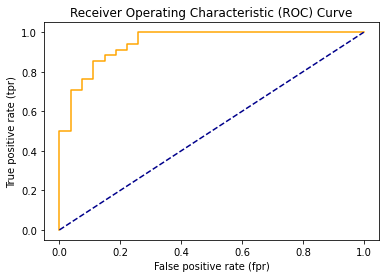

In [19]:
np.random.seed(77)

# Make predictions
y_probability = randomSearch_GNB.predict_proba(X_test)
y_probability_positive = y_probability[:, 1]

# Get fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probability_positive)
roc_curve_plot(fpr, tpr)

In [20]:
randomSearch_GNB_roc_auc = roc_auc_score(y_test, y_probability_positive)
randomSearch_GNB_roc_auc

0.9466230936819171

#### Confusion Matrix

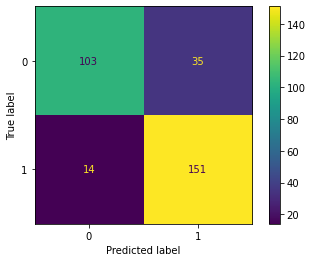

In [21]:
plot_confusion_matrix(randomSearch_GNB, X, y);

#### Cross-Validated Metrics

In [22]:
randomSearch_GNB_cv_metrics = cross_val_metrics(randomSearch_GNB, X, y)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] var_smoothing=5.374487766218061e-07 .............................
[CV] .............. var_smoothing=5.374487766218061e-07, total=   0.0s
[CV] var_smoothing=5.374487766218061e-07 .............................
[CV] .............. var_smoothing=5.374487766218061e-07, total=   0.0s
[CV] var_smoothing=5.374487766218061e-07 .............................
[CV] .............. var_smoothing=5.374487766218061e-07, total=   0.0s
[CV] var_smoothing=5.374487766218061e-07 .............................
[CV] .............. var_smoothing=5.374487766218061e-07, total=   0.0s
[CV] var_smoothing=5.374487766218061e-07 .............................
[CV] .............. var_smoothing=5.374487766218061e-07, total=   0.0s
[CV] var_smoothing=0.001860642434215986 ..............................
[CV] ............... var_smoothing=0.001860642434215986, total=   0.0s
[CV] var_smoothing=0.001860642434215986 ..............................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................ var_smoothing=0.31216342887834375, total=   0.1s
[CV] var_smoothing=0.31216342887834375 ...............................
[CV] ................ var_smoothing=0.31216342887834375, total=   0.0s
[CV] var_smoothing=0.00014364925262166947 ............................
[CV] ............. var_smoothing=0.00014364925262166947, total=   0.0s
[CV] var_smoothing=0.00014364925262166947 ............................
[CV] ............. var_smoothing=0.00014364925262166947, total=   0.0s
[CV] var_smoothing=0.00014364925262166947 ............................
[CV] ............. var_smoothing=0.00014364925262166947, total=   0.0s
[CV] var_smoothing=0.00014364925262166947 ............................
[CV] ............. var_smoothing=0.00014364925262166947, total=   0.0s
[CV] var_smoothing=0.00014364925262166947 ............................
[CV] ............. var_smoothing=0.00014364925262166947, total=   0.0s
[CV] var_smoothing=0.00046017322765138014 ............................
[CV] .

[CV] ................. var_smoothing=0.6277009833155804, total=   0.0s
[CV] var_smoothing=0.6277009833155804 ................................
[CV] ................. var_smoothing=0.6277009833155804, total=   0.0s
[CV] var_smoothing=0.6277009833155804 ................................
[CV] ................. var_smoothing=0.6277009833155804, total=   0.0s
[CV] var_smoothing=0.6277009833155804 ................................
[CV] ................. var_smoothing=0.6277009833155804, total=   0.0s
[CV] var_smoothing=0.6277009833155804 ................................
[CV] ................. var_smoothing=0.6277009833155804, total=   0.0s
[CV] var_smoothing=1.1090313431155938e-05 ............................
[CV] ............. var_smoothing=1.1090313431155938e-05, total=   0.0s
[CV] var_smoothing=1.1090313431155938e-05 ............................
[CV] ............. var_smoothing=1.1090313431155938e-05, total=   0.0s
[CV] var_smoothing=1.1090313431155938e-05 ............................
[CV] .

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... var_smoothing=0.009495724149488028, total=   0.0s
[CV] var_smoothing=0.009495724149488028 ..............................
[CV] ............... var_smoothing=0.009495724149488028, total=   0.0s
[CV] var_smoothing=0.00018131217442077455 ............................
[CV] ............. var_smoothing=0.00018131217442077455, total=   0.0s
[CV] var_smoothing=0.00018131217442077455 ............................
[CV] ............. var_smoothing=0.00018131217442077455, total=   0.0s
[CV] var_smoothing=0.00018131217442077455 ............................
[CV] ............. var_smoothing=0.00018131217442077455, total=   0.0s
[CV] var_smoothing=0.00018131217442077455 ............................
[CV] ............. var_smoothing=0.00018131217442077455, total=   0.0s
[CV] var_smoothing=0.00018131217442077455 ............................
[CV] ............. var_smoothing=0.00018131217442077455, total=   0.0s
[CV] var_smoothing=0.15524271734347947 ...............................
[CV] .

[CV] ............. var_smoothing=4.4842043254191775e-05, total=   0.0s
[CV] var_smoothing=0.0007331089800444448 .............................
[CV] .............. var_smoothing=0.0007331089800444448, total=   0.0s
[CV] var_smoothing=0.0007331089800444448 .............................
[CV] .............. var_smoothing=0.0007331089800444448, total=   0.0s
[CV] var_smoothing=0.0007331089800444448 .............................
[CV] .............. var_smoothing=0.0007331089800444448, total=   0.0s
[CV] var_smoothing=0.0007331089800444448 .............................
[CV] .............. var_smoothing=0.0007331089800444448, total=   0.0s
[CV] var_smoothing=0.0007331089800444448 .............................
[CV] .............. var_smoothing=0.0007331089800444448, total=   0.0s
[CV] var_smoothing=0.31216342887834375 ...............................
[CV] ................ var_smoothing=0.31216342887834375, total=   0.0s
[CV] var_smoothing=0.31216342887834375 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] var_smoothing=5.515349441892866e-06 .............................
[CV] .............. var_smoothing=5.515349441892866e-06, total=   0.0s
[CV] var_smoothing=5.515349441892866e-06 .............................
[CV] .............. var_smoothing=5.515349441892866e-06, total=   0.0s
[CV] var_smoothing=5.515349441892866e-06 .............................
[CV] .............. var_smoothing=5.515349441892866e-06, total=   0.0s
[CV] var_smoothing=5.515349441892866e-06 .............................
[CV] .............. var_smoothing=5.515349441892866e-06, total=   0.0s
[CV] var_smoothing=1.329215832592545e-07 .............................
[CV] .............. var_smoothing=1.329215832592545e-07, total=   0.0s
[CV] var_smoothing=1.329215832592545e-07 .............................
[CV] .............. var_smoothing=1.329215832592545e-07, total=   0.0s
[CV] var_smoothing=1.329215832592545e-07 .............................
[CV] .............. var_smoothing=1.329215832592545e-07, total=   0.0s
[CV] 

[CV] ............... var_smoothing=0.030419079466187892, total=   0.0s
[CV] var_smoothing=0.030419079466187892 ..............................
[CV] ............... var_smoothing=0.030419079466187892, total=   0.0s
[CV] var_smoothing=0.030419079466187892 ..............................
[CV] ............... var_smoothing=0.030419079466187892, total=   0.0s
[CV] var_smoothing=0.0003645841237070733 .............................
[CV] .............. var_smoothing=0.0003645841237070733, total=   0.0s
[CV] var_smoothing=0.0003645841237070733 .............................
[CV] .............. var_smoothing=0.0003645841237070733, total=   0.0s
[CV] var_smoothing=0.0003645841237070733 .............................
[CV] .............. var_smoothing=0.0003645841237070733, total=   0.0s
[CV] var_smoothing=0.0003645841237070733 .............................
[CV] .............. var_smoothing=0.0003645841237070733, total=   0.0s
[CV] var_smoothing=0.0003645841237070733 .............................
[CV] .

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... var_smoothing=0.005960475385927138, total=   0.0s
[CV] var_smoothing=0.09744600632908476 ...............................
[CV] ................ var_smoothing=0.09744600632908476, total=   0.0s
[CV] var_smoothing=0.09744600632908476 ...............................
[CV] ................ var_smoothing=0.09744600632908476, total=   0.0s
[CV] var_smoothing=0.09744600632908476 ...............................
[CV] ................ var_smoothing=0.09744600632908476, total=   0.0s
[CV] var_smoothing=0.09744600632908476 ...............................
[CV] ................ var_smoothing=0.09744600632908476, total=   0.0s
[CV] var_smoothing=0.09744600632908476 ...............................
[CV] ................ var_smoothing=0.09744600632908476, total=   0.0s
[CV] var_smoothing=2.2300500321347896e-05 ............................
[CV] ............. var_smoothing=2.2300500321347896e-05, total=   0.0s
[CV] var_smoothing=2.2300500321347896e-05 ............................
[CV] .

[CV] .............. var_smoothing=6.961400646014571e-06, total=   0.0s
[CV] var_smoothing=6.961400646014571e-06 .............................
[CV] .............. var_smoothing=6.961400646014571e-06, total=   0.0s
[CV] var_smoothing=6.961400646014571e-06 .............................
[CV] .............. var_smoothing=6.961400646014571e-06, total=   0.0s
[CV] var_smoothing=6.961400646014571e-06 .............................
[CV] .............. var_smoothing=6.961400646014571e-06, total=   0.0s
[CV] var_smoothing=6.961400646014571e-06 .............................
[CV] .............. var_smoothing=6.961400646014571e-06, total=   0.0s
[CV] var_smoothing=0.31216342887834375 ...............................
[CV] ................ var_smoothing=0.31216342887834375, total=   0.0s
[CV] var_smoothing=0.31216342887834375 ...............................
[CV] ................ var_smoothing=0.31216342887834375, total=   0.0s
[CV] var_smoothing=0.31216342887834375 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................ var_smoothing=0.06116695399294281, total=   0.0s
[CV] var_smoothing=0.06116695399294281 ...............................
[CV] ................ var_smoothing=0.06116695399294281, total=   0.0s
[CV] var_smoothing=0.06116695399294281 ...............................
[CV] ................ var_smoothing=0.06116695399294281, total=   0.0s
[CV] var_smoothing=0.06116695399294281 ...............................
[CV] ................ var_smoothing=0.06116695399294281, total=   0.0s
[CV] var_smoothing=0.030419079466187892 ..............................
[CV] ............... var_smoothing=0.030419079466187892, total=   0.0s
[CV] var_smoothing=0.030419079466187892 ..............................
[CV] ............... var_smoothing=0.030419079466187892, total=   0.0s
[CV] var_smoothing=0.030419079466187892 ..............................
[CV] ............... var_smoothing=0.030419079466187892, total=   0.0s
[CV] var_smoothing=0.030419079466187892 ..............................
[CV] .

[CV] ............. var_smoothing=0.00014364925262166947, total=   0.0s
[CV] var_smoothing=0.00014364925262166947 ............................
[CV] ............. var_smoothing=0.00014364925262166947, total=   0.0s
[CV] var_smoothing=8.343500851569783e-08 .............................
[CV] .............. var_smoothing=8.343500851569783e-08, total=   0.0s
[CV] var_smoothing=8.343500851569783e-08 .............................
[CV] .............. var_smoothing=8.343500851569783e-08, total=   0.0s
[CV] var_smoothing=8.343500851569783e-08 .............................
[CV] .............. var_smoothing=8.343500851569783e-08, total=   0.0s
[CV] var_smoothing=8.343500851569783e-08 .............................
[CV] .............. var_smoothing=8.343500851569783e-08, total=   0.0s
[CV] var_smoothing=8.343500851569783e-08 .............................
[CV] .............. var_smoothing=8.343500851569783e-08, total=   0.0s
[CV] var_smoothing=1.0 ...............................................
[CV] .

[CV] ............... var_smoothing=0.002964217810187079, total=   0.0s
[CV] var_smoothing=0.002964217810187079 ..............................
[CV] ............... var_smoothing=0.002964217810187079, total=   0.0s
[CV] var_smoothing=0.002964217810187079 ..............................
[CV] ............... var_smoothing=0.002964217810187079, total=   0.0s
[CV] var_smoothing=0.12299505200127775 ...............................
[CV] ................ var_smoothing=0.12299505200127775, total=   0.0s
[CV] var_smoothing=0.12299505200127775 ...............................
[CV] ................ var_smoothing=0.12299505200127775, total=   0.0s
[CV] var_smoothing=0.12299505200127775 ...............................
[CV] ................ var_smoothing=0.12299505200127775, total=   0.0s
[CV] var_smoothing=0.12299505200127775 ...............................
[CV] ................ var_smoothing=0.12299505200127775, total=   0.0s
[CV] var_smoothing=0.12299505200127775 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] var_smoothing=0.0005808245221814102 .............................
[CV] .............. var_smoothing=0.0005808245221814102, total=   0.0s
[CV] var_smoothing=0.0005808245221814102 .............................
[CV] .............. var_smoothing=0.0005808245221814102, total=   0.0s
[CV] var_smoothing=0.001860642434215986 ..............................
[CV] ............... var_smoothing=0.001860642434215986, total=   0.0s
[CV] var_smoothing=0.001860642434215986 ..............................
[CV] ............... var_smoothing=0.001860642434215986, total=   0.0s
[CV] var_smoothing=0.001860642434215986 ..............................
[CV] ............... var_smoothing=0.001860642434215986, total=   0.0s
[CV] var_smoothing=0.001860642434215986 ..............................
[CV] ............... var_smoothing=0.001860642434215986, total=   0.0s
[CV] var_smoothing=0.001860642434215986 ..............................
[CV] ............... var_smoothing=0.001860642434215986, total=   0.0s
[CV] 

[CV] ................ var_smoothing=0.03839455716778906, total=   0.0s
[CV] var_smoothing=0.03839455716778906 ...............................
[CV] ................ var_smoothing=0.03839455716778906, total=   0.0s
[CV] var_smoothing=0.03839455716778906 ...............................
[CV] ................ var_smoothing=0.03839455716778906, total=   0.0s
[CV] var_smoothing=3.203450204250925e-09 .............................
[CV] .............. var_smoothing=3.203450204250925e-09, total=   0.0s
[CV] var_smoothing=3.203450204250925e-09 .............................
[CV] .............. var_smoothing=3.203450204250925e-09, total=   0.0s
[CV] var_smoothing=3.203450204250925e-09 .............................
[CV] .............. var_smoothing=3.203450204250925e-09, total=   0.0s
[CV] var_smoothing=3.203450204250925e-09 .............................
[CV] .............. var_smoothing=3.203450204250925e-09, total=   0.0s
[CV] var_smoothing=3.203450204250925e-09 .............................
[CV] .

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................ var_smoothing=0.01909408609248092, total=   0.0s
[CV] var_smoothing=0.01909408609248092 ...............................
[CV] ................ var_smoothing=0.01909408609248092, total=   0.0s
[CV] var_smoothing=0.01909408609248092 ...............................
[CV] ................ var_smoothing=0.01909408609248092, total=   0.0s
[CV] var_smoothing=0.01909408609248092 ...............................
[CV] ................ var_smoothing=0.01909408609248092, total=   0.0s
[CV] var_smoothing=0.01909408609248092 ...............................
[CV] ................ var_smoothing=0.01909408609248092, total=   0.0s
[CV] var_smoothing=0.0003645841237070733 .............................
[CV] .............. var_smoothing=0.0003645841237070733, total=   0.0s
[CV] var_smoothing=0.0003645841237070733 .............................
[CV] .............. var_smoothing=0.0003645841237070733, total=   0.0s
[CV] var_smoothing=0.0003645841237070733 .............................
[CV] .

[CV] ............. var_smoothing=3.4619902680051897e-06, total=   0.0s
[CV] var_smoothing=3.4619902680051897e-06 ............................
[CV] ............. var_smoothing=3.4619902680051897e-06, total=   0.0s
[CV] var_smoothing=3.4619902680051897e-06 ............................
[CV] ............. var_smoothing=3.4619902680051897e-06, total=   0.0s
[CV] var_smoothing=3.4619902680051897e-06 ............................
[CV] ............. var_smoothing=3.4619902680051897e-06, total=   0.0s
[CV] var_smoothing=0.01198537661576262 ...............................
[CV] ................ var_smoothing=0.01198537661576262, total=   0.0s
[CV] var_smoothing=0.01198537661576262 ...............................
[CV] ................ var_smoothing=0.01198537661576262, total=   0.0s
[CV] var_smoothing=0.01198537661576262 ...............................
[CV] ................ var_smoothing=0.01198537661576262, total=   0.0s
[CV] var_smoothing=0.01198537661576262 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............. var_smoothing=0.0001138098301710062, total=   0.0s
[CV] var_smoothing=6.961400646014571e-06 .............................
[CV] .............. var_smoothing=6.961400646014571e-06, total=   0.0s
[CV] var_smoothing=6.961400646014571e-06 .............................
[CV] .............. var_smoothing=6.961400646014571e-06, total=   0.0s
[CV] var_smoothing=6.961400646014571e-06 .............................
[CV] .............. var_smoothing=6.961400646014571e-06, total=   0.0s
[CV] var_smoothing=6.961400646014571e-06 .............................
[CV] .............. var_smoothing=6.961400646014571e-06, total=   0.0s
[CV] var_smoothing=6.961400646014571e-06 .............................
[CV] .............. var_smoothing=6.961400646014571e-06, total=   0.0s
[CV] var_smoothing=0.0007331089800444448 .............................
[CV] .............. var_smoothing=0.0007331089800444448, total=   0.0s
[CV] var_smoothing=0.0007331089800444448 .............................
[CV] .

[CV] ............. var_smoothing=1.5931152357256164e-09, total=   0.0s
[CV] var_smoothing=1.5931152357256164e-09 ............................
[CV] ............. var_smoothing=1.5931152357256164e-09, total=   0.0s
[CV] var_smoothing=1.5931152357256164e-09 ............................
[CV] ............. var_smoothing=1.5931152357256164e-09, total=   0.0s
[CV] var_smoothing=1.5931152357256164e-09 ............................
[CV] ............. var_smoothing=1.5931152357256164e-09, total=   0.0s
[CV] var_smoothing=1.5931152357256164e-09 ............................
[CV] ............. var_smoothing=1.5931152357256164e-09, total=   0.0s
[CV] var_smoothing=5.515349441892866e-06 .............................
[CV] .............. var_smoothing=5.515349441892866e-06, total=   0.0s
[CV] var_smoothing=5.515349441892866e-06 .............................
[CV] .............. var_smoothing=5.515349441892866e-06, total=   0.0s
[CV] var_smoothing=5.515349441892866e-06 .............................
[CV] .

[CV] .............. var_smoothing=5.237223688824736e-08, total=   0.0s
[CV] var_smoothing=5.103465327280486e-09 .............................
[CV] .............. var_smoothing=5.103465327280486e-09, total=   0.0s
[CV] var_smoothing=5.103465327280486e-09 .............................
[CV] .............. var_smoothing=5.103465327280486e-09, total=   0.0s
[CV] var_smoothing=5.103465327280486e-09 .............................
[CV] .............. var_smoothing=5.103465327280486e-09, total=   0.0s
[CV] var_smoothing=5.103465327280486e-09 .............................
[CV] .............. var_smoothing=5.103465327280486e-09, total=   0.0s
[CV] var_smoothing=5.103465327280486e-09 .............................
[CV] .............. var_smoothing=5.103465327280486e-09, total=   0.0s
Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] var_smoothing=0.24731953823534203 ...............................
[CV] ................ var_smoothing=0.24731953823534203, total=   0.0s
[CV] var_smooth

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] var_smoothing=1.1090313431155938e-05 ............................
[CV] ............. var_smoothing=1.1090313431155938e-05, total=   0.0s
[CV] var_smoothing=0.00046017322765138014 ............................
[CV] ............. var_smoothing=0.00046017322765138014, total=   0.0s
[CV] var_smoothing=0.00046017322765138014 ............................
[CV] ............. var_smoothing=0.00046017322765138014, total=   0.0s
[CV] var_smoothing=0.00046017322765138014 ............................
[CV] ............. var_smoothing=0.00046017322765138014, total=   0.0s
[CV] var_smoothing=0.00046017322765138014 ............................
[CV] ............. var_smoothing=0.00046017322765138014, total=   0.0s
[CV] var_smoothing=0.00046017322765138014 ............................
[CV] ............. var_smoothing=0.00046017322765138014, total=   0.0s
[CV] var_smoothing=0.01198537661576262 ...............................
[CV] ................ var_smoothing=0.01198537661576262, total=   0.0s
[CV] 

[CV] ............. var_smoothing=2.1175939944708895e-07, total=   0.0s
[CV] var_smoothing=2.1175939944708895e-07 ............................
[CV] ............. var_smoothing=2.1175939944708895e-07, total=   0.0s
[CV] var_smoothing=2.1175939944708895e-07 ............................
[CV] ............. var_smoothing=2.1175939944708895e-07, total=   0.0s
[CV] var_smoothing=2.1175939944708895e-07 ............................
[CV] ............. var_smoothing=2.1175939944708895e-07, total=   0.0s
[CV] var_smoothing=2.1175939944708895e-07 ............................
[CV] ............. var_smoothing=2.1175939944708895e-07, total=   0.0s
[CV] var_smoothing=3.203450204250925e-09 .............................
[CV] .............. var_smoothing=3.203450204250925e-09, total=   0.0s
[CV] var_smoothing=3.203450204250925e-09 .............................
[CV] .............. var_smoothing=3.203450204250925e-09, total=   0.0s
[CV] var_smoothing=3.203450204250925e-09 .............................
[CV] .

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] var_smoothing=0.0011679270855560694 .............................
[CV] .............. var_smoothing=0.0011679270855560694, total=   0.0s
[CV] var_smoothing=0.0011679270855560694 .............................
[CV] .............. var_smoothing=0.0011679270855560694, total=   0.0s
[CV] var_smoothing=0.0011679270855560694 .............................
[CV] .............. var_smoothing=0.0011679270855560694, total=   0.0s
[CV] var_smoothing=0.0011679270855560694 .............................
[CV] .............. var_smoothing=0.0011679270855560694, total=   0.0s
[CV] var_smoothing=0.0011679270855560694 .............................
[CV] .............. var_smoothing=0.0011679270855560694, total=   0.0s
[CV] var_smoothing=6.783606914108303e-07 .............................
[CV] .............. var_smoothing=6.783606914108303e-07, total=   0.0s
[CV] var_smoothing=6.783606914108303e-07 .............................
[CV] .............. var_smoothing=6.783606914108303e-07, total=   0.0s
[CV] v

[CV] .............. var_smoothing=0.0014741420201106225, total=   0.0s
[CV] var_smoothing=0.0014741420201106225 .............................
[CV] .............. var_smoothing=0.0014741420201106225, total=   0.0s
[CV] var_smoothing=0.0014741420201106225 .............................
[CV] .............. var_smoothing=0.0014741420201106225, total=   0.0s
[CV] var_smoothing=0.0014741420201106225 .............................
[CV] .............. var_smoothing=0.0014741420201106225, total=   0.0s
[CV] var_smoothing=0.0009253203955702538 .............................
[CV] .............. var_smoothing=0.0009253203955702538, total=   0.0s
[CV] var_smoothing=0.0009253203955702538 .............................
[CV] .............. var_smoothing=0.0009253203955702538, total=   0.0s
[CV] var_smoothing=0.0009253203955702538 .............................
[CV] .............. var_smoothing=0.0009253203955702538, total=   0.0s
[CV] var_smoothing=0.0009253203955702538 .............................
[CV] .

[CV] ............. var_smoothing=1.3640536771754944e-06, total=   0.0s
[CV] var_smoothing=4.2580767304121514e-07 ............................
[CV] ............. var_smoothing=4.2580767304121514e-07, total=   0.0s
[CV] var_smoothing=4.2580767304121514e-07 ............................
[CV] ............. var_smoothing=4.2580767304121514e-07, total=   0.0s
[CV] var_smoothing=4.2580767304121514e-07 ............................
[CV] ............. var_smoothing=4.2580767304121514e-07, total=   0.0s
[CV] var_smoothing=4.2580767304121514e-07 ............................
[CV] ............. var_smoothing=4.2580767304121514e-07, total=   0.0s
[CV] var_smoothing=4.2580767304121514e-07 ............................
[CV] ............. var_smoothing=4.2580767304121514e-07, total=   0.0s
[CV] var_smoothing=0.001860642434215986 ..............................
[CV] ............... var_smoothing=0.001860642434215986, total=   0.0s
[CV] var_smoothing=0.001860642434215986 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] var_smoothing=1.0807067528039548e-06 ............................
[CV] ............. var_smoothing=1.0807067528039548e-06, total=   0.0s
[CV] var_smoothing=0.00014364925262166947 ............................
[CV] ............. var_smoothing=0.00014364925262166947, total=   0.0s
[CV] var_smoothing=0.00014364925262166947 ............................
[CV] ............. var_smoothing=0.00014364925262166947, total=   0.0s
[CV] var_smoothing=0.00014364925262166947 ............................
[CV] ............. var_smoothing=0.00014364925262166947, total=   0.0s
[CV] var_smoothing=0.00014364925262166947 ............................
[CV] ............. var_smoothing=0.00014364925262166947, total=   0.0s
[CV] var_smoothing=0.00014364925262166947 ............................
[CV] ............. var_smoothing=0.00014364925262166947, total=   0.0s
[CV] var_smoothing=2.1175939944708895e-07 ............................
[CV] ............. var_smoothing=2.1175939944708895e-07, total=   0.0s
[CV] 

[CV] ................ var_smoothing=0.01198537661576262, total=   0.0s
[CV] var_smoothing=0.01198537661576262 ...............................
[CV] ................ var_smoothing=0.01198537661576262, total=   0.0s
[CV] var_smoothing=2.063510777876421e-08 .............................
[CV] .............. var_smoothing=2.063510777876421e-08, total=   0.0s
[CV] var_smoothing=2.063510777876421e-08 .............................
[CV] .............. var_smoothing=2.063510777876421e-08, total=   0.0s
[CV] var_smoothing=2.063510777876421e-08 .............................
[CV] .............. var_smoothing=2.063510777876421e-08, total=   0.0s
[CV] var_smoothing=2.063510777876421e-08 .............................
[CV] .............. var_smoothing=2.063510777876421e-08, total=   0.0s
[CV] var_smoothing=2.063510777876421e-08 .............................
[CV] .............. var_smoothing=2.063510777876421e-08, total=   0.0s
[CV] var_smoothing=0.0001138098301710062 .............................
[CV] .

[CV] ................. var_smoothing=0.6277009833155804, total=   0.0s
[CV] var_smoothing=0.6277009833155804 ................................
[CV] ................. var_smoothing=0.6277009833155804, total=   0.0s
[CV] var_smoothing=0.6277009833155804 ................................
[CV] ................. var_smoothing=0.6277009833155804, total=   0.0s
[CV] var_smoothing=0.6277009833155804 ................................
[CV] ................. var_smoothing=0.6277009833155804, total=   0.0s
[CV] var_smoothing=0.00018131217442077455 ............................
[CV] ............. var_smoothing=0.00018131217442077455, total=   0.0s
[CV] var_smoothing=0.00018131217442077455 ............................
[CV] ............. var_smoothing=0.00018131217442077455, total=   0.0s
[CV] var_smoothing=0.00018131217442077455 ............................
[CV] ............. var_smoothing=0.00018131217442077455, total=   0.0s
[CV] var_smoothing=0.00018131217442077455 ............................
[CV] .

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............. var_smoothing=1.6777185295673414e-07, total=   0.0s
[CV] var_smoothing=1.6777185295673414e-07 ............................
[CV] ............. var_smoothing=1.6777185295673414e-07, total=   0.0s
[CV] var_smoothing=4.2580767304121514e-07 ............................
[CV] ............. var_smoothing=4.2580767304121514e-07, total=   0.0s
[CV] var_smoothing=4.2580767304121514e-07 ............................
[CV] ............. var_smoothing=4.2580767304121514e-07, total=   0.0s
[CV] var_smoothing=4.2580767304121514e-07 ............................
[CV] ............. var_smoothing=4.2580767304121514e-07, total=   0.0s
[CV] var_smoothing=4.2580767304121514e-07 ............................
[CV] ............. var_smoothing=4.2580767304121514e-07, total=   0.0s
[CV] var_smoothing=4.2580767304121514e-07 ............................
[CV] ............. var_smoothing=4.2580767304121514e-07, total=   0.0s
[CV] var_smoothing=0.0005808245221814102 .............................
[CV] .

[CV] ............. var_smoothing=2.6045358346754064e-08, total=   0.0s
[CV] var_smoothing=2.6045358346754064e-08 ............................
[CV] ............. var_smoothing=2.6045358346754064e-08, total=   0.0s
[CV] var_smoothing=2.6045358346754064e-08 ............................
[CV] ............. var_smoothing=2.6045358346754064e-08, total=   0.0s
[CV] var_smoothing=2.6045358346754064e-08 ............................
[CV] ............. var_smoothing=2.6045358346754064e-08, total=   0.0s
[CV] var_smoothing=1.0 ...............................................
[CV] ................................ var_smoothing=1.0, total=   0.0s
[CV] var_smoothing=1.0 ...............................................
[CV] ................................ var_smoothing=1.0, total=   0.0s
[CV] var_smoothing=1.0 ...............................................
[CV] ................................ var_smoothing=1.0, total=   0.0s
[CV] var_smoothing=1.0 ...............................................
[CV] .

[CV] .............. var_smoothing=6.783606914108303e-07, total=   0.0s
[CV] var_smoothing=6.783606914108303e-07 .............................
[CV] .............. var_smoothing=6.783606914108303e-07, total=   0.0s
[CV] var_smoothing=6.783606914108303e-07 .............................
[CV] .............. var_smoothing=6.783606914108303e-07, total=   0.0s
[CV] var_smoothing=6.783606914108303e-07 .............................
[CV] .............. var_smoothing=6.783606914108303e-07, total=   0.0s
[CV] var_smoothing=6.783606914108303e-07 .............................
[CV] .............. var_smoothing=6.783606914108303e-07, total=   0.0s
[CV] var_smoothing=9.016877712317013e-05 .............................
[CV] .............. var_smoothing=9.016877712317013e-05, total=   0.0s
[CV] var_smoothing=9.016877712317013e-05 .............................
[CV] .............. var_smoothing=9.016877712317013e-05, total=   0.0s
[CV] var_smoothing=9.016877712317013e-05 .............................
[CV] .

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............. var_smoothing=3.373571255672634e-07, total=   0.0s
[CV] var_smoothing=3.373571255672634e-07 .............................
[CV] .............. var_smoothing=3.373571255672634e-07, total=   0.0s
[CV] var_smoothing=3.373571255672634e-07 .............................
[CV] .............. var_smoothing=3.373571255672634e-07, total=   0.0s
[CV] var_smoothing=3.373571255672634e-07 .............................
[CV] .............. var_smoothing=3.373571255672634e-07, total=   0.0s
[CV] var_smoothing=3.373571255672634e-07 .............................
[CV] .............. var_smoothing=3.373571255672634e-07, total=   0.0s
[CV] var_smoothing=0.07720411508415298 ...............................
[CV] ................ var_smoothing=0.07720411508415298, total=   0.0s
[CV] var_smoothing=0.07720411508415298 ...............................
[CV] ................ var_smoothing=0.07720411508415298, total=   0.0s
[CV] var_smoothing=0.07720411508415298 ...............................
[CV] .

[CV] ................ var_smoothing=0.09744600632908476, total=   0.0s
[CV] var_smoothing=5.65990300645773e-05 ..............................
[CV] ............... var_smoothing=5.65990300645773e-05, total=   0.0s
[CV] var_smoothing=5.65990300645773e-05 ..............................
[CV] ............... var_smoothing=5.65990300645773e-05, total=   0.0s
[CV] var_smoothing=5.65990300645773e-05 ..............................
[CV] ............... var_smoothing=5.65990300645773e-05, total=   0.0s
[CV] var_smoothing=5.65990300645773e-05 ..............................
[CV] ............... var_smoothing=5.65990300645773e-05, total=   0.0s
[CV] var_smoothing=5.65990300645773e-05 ..............................
[CV] ............... var_smoothing=5.65990300645773e-05, total=   0.0s
[CV] var_smoothing=0.005960475385927138 ..............................
[CV] ............... var_smoothing=0.005960475385927138, total=   0.0s
[CV] var_smoothing=0.005960475385927138 ..............................
[CV] .

[CV] .............. var_smoothing=0.0007331089800444448, total=   0.0s
[CV] var_smoothing=2.063510777876421e-08 .............................
[CV] .............. var_smoothing=2.063510777876421e-08, total=   0.0s
[CV] var_smoothing=2.063510777876421e-08 .............................
[CV] .............. var_smoothing=2.063510777876421e-08, total=   0.0s
[CV] var_smoothing=2.063510777876421e-08 .............................
[CV] .............. var_smoothing=2.063510777876421e-08, total=   0.0s
[CV] var_smoothing=2.063510777876421e-08 .............................
[CV] .............. var_smoothing=2.063510777876421e-08, total=   0.0s
[CV] var_smoothing=2.063510777876421e-08 .............................
[CV] .............. var_smoothing=2.063510777876421e-08, total=   0.0s
[CV] var_smoothing=4.0433522039347815e-09 ............................
[CV] ............. var_smoothing=4.0433522039347815e-09, total=   0.0s
[CV] var_smoothing=4.0433522039347815e-09 ............................
[CV] .

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] var_smoothing=4.0433522039347815e-09 ............................
[CV] ............. var_smoothing=4.0433522039347815e-09, total=   0.0s
[CV] var_smoothing=1.0262093211115312e-08 ............................
[CV] ............. var_smoothing=1.0262093211115312e-08, total=   0.0s
[CV] var_smoothing=1.0262093211115312e-08 ............................
[CV] ............. var_smoothing=1.0262093211115312e-08, total=   0.0s
[CV] var_smoothing=1.0262093211115312e-08 ............................
[CV] ............. var_smoothing=1.0262093211115312e-08, total=   0.0s
[CV] var_smoothing=1.0262093211115312e-08 ............................
[CV] ............. var_smoothing=1.0262093211115312e-08, total=   0.0s
[CV] var_smoothing=1.0262093211115312e-08 ............................
[CV] ............. var_smoothing=1.0262093211115312e-08, total=   0.0s
[CV] var_smoothing=0.01909408609248092 ...............................
[CV] ................ var_smoothing=0.01909408609248092, total=   0.0s
[CV] 

[CV] ............. var_smoothing=1.5931152357256164e-09, total=   0.0s
[CV] var_smoothing=1.5931152357256164e-09 ............................
[CV] ............. var_smoothing=1.5931152357256164e-09, total=   0.0s
[CV] var_smoothing=1.5931152357256164e-09 ............................
[CV] ............. var_smoothing=1.5931152357256164e-09, total=   0.0s
[CV] var_smoothing=1.5931152357256164e-09 ............................
[CV] ............. var_smoothing=1.5931152357256164e-09, total=   0.0s
[CV] var_smoothing=4.2580767304121514e-07 ............................
[CV] ............. var_smoothing=4.2580767304121514e-07, total=   0.0s
[CV] var_smoothing=4.2580767304121514e-07 ............................
[CV] ............. var_smoothing=4.2580767304121514e-07, total=   0.0s
[CV] var_smoothing=4.2580767304121514e-07 ............................
[CV] ............. var_smoothing=4.2580767304121514e-07, total=   0.0s
[CV] var_smoothing=4.2580767304121514e-07 ............................
[CV] .

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............. var_smoothing=4.4842043254191775e-05, total=   0.0s
[CV] var_smoothing=4.4842043254191775e-05 ............................
[CV] ............. var_smoothing=4.4842043254191775e-05, total=   0.0s
[CV] var_smoothing=1.6348697045064187e-08 ............................
[CV] ............. var_smoothing=1.6348697045064187e-08, total=   0.0s
[CV] var_smoothing=1.6348697045064187e-08 ............................
[CV] ............. var_smoothing=1.6348697045064187e-08, total=   0.0s
[CV] var_smoothing=1.6348697045064187e-08 ............................
[CV] ............. var_smoothing=1.6348697045064187e-08, total=   0.0s
[CV] var_smoothing=1.6348697045064187e-08 ............................
[CV] ............. var_smoothing=1.6348697045064187e-08, total=   0.0s
[CV] var_smoothing=1.6348697045064187e-08 ............................
[CV] ............. var_smoothing=1.6348697045064187e-08, total=   0.0s
[CV] var_smoothing=2.6045358346754064e-08 ............................
[CV] .

[CV] .............. var_smoothing=0.0002288498129521791, total=   0.0s
[CV] var_smoothing=0.0002288498129521791 .............................
[CV] .............. var_smoothing=0.0002288498129521791, total=   0.0s
[CV] var_smoothing=0.0002288498129521791 .............................
[CV] .............. var_smoothing=0.0002288498129521791, total=   0.0s
[CV] var_smoothing=3.2874104593189376e-08 ............................
[CV] ............. var_smoothing=3.2874104593189376e-08, total=   0.0s
[CV] var_smoothing=3.2874104593189376e-08 ............................
[CV] ............. var_smoothing=3.2874104593189376e-08, total=   0.0s
[CV] var_smoothing=3.2874104593189376e-08 ............................
[CV] ............. var_smoothing=3.2874104593189376e-08, total=   0.0s
[CV] var_smoothing=3.2874104593189376e-08 ............................
[CV] ............. var_smoothing=3.2874104593189376e-08, total=   0.0s
[CV] var_smoothing=3.2874104593189376e-08 ............................
[CV] .

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............. var_smoothing=1.0807067528039548e-06, total=   0.0s
[CV] var_smoothing=1.0807067528039548e-06 ............................
[CV] ............. var_smoothing=1.0807067528039548e-06, total=   0.0s
[CV] var_smoothing=1.0807067528039548e-06 ............................
[CV] ............. var_smoothing=1.0807067528039548e-06, total=   0.0s
[CV] var_smoothing=1.0807067528039548e-06 ............................
[CV] ............. var_smoothing=1.0807067528039548e-06, total=   0.0s
[CV] var_smoothing=1.0807067528039548e-06 ............................
[CV] ............. var_smoothing=1.0807067528039548e-06, total=   0.0s
[CV] var_smoothing=9.016877712317013e-05 .............................
[CV] .............. var_smoothing=9.016877712317013e-05, total=   0.0s
[CV] var_smoothing=9.016877712317013e-05 .............................
[CV] .............. var_smoothing=9.016877712317013e-05, total=   0.0s
[CV] var_smoothing=9.016877712317013e-05 .............................
[CV] .

[CV] .............. var_smoothing=0.0011679270855560694, total=   0.0s
[CV] var_smoothing=0.0011679270855560694 .............................
[CV] .............. var_smoothing=0.0011679270855560694, total=   0.0s
[CV] var_smoothing=0.0011679270855560694 .............................
[CV] .............. var_smoothing=0.0011679270855560694, total=   0.0s
[CV] var_smoothing=0.0011679270855560694 .............................
[CV] .............. var_smoothing=0.0011679270855560694, total=   0.0s
[CV] var_smoothing=0.0011679270855560694 .............................
[CV] .............. var_smoothing=0.0011679270855560694, total=   0.0s
[CV] var_smoothing=0.01909408609248092 ...............................
[CV] ................ var_smoothing=0.01909408609248092, total=   0.0s
[CV] var_smoothing=0.01909408609248092 ...............................
[CV] ................ var_smoothing=0.01909408609248092, total=   0.0s
[CV] var_smoothing=0.01909408609248092 ...............................
[CV] .

[CV] ............. var_smoothing=1.7668147296146926e-05, total=   0.0s
[CV] var_smoothing=1.7668147296146926e-05 ............................
[CV] ............. var_smoothing=1.7668147296146926e-05, total=   0.0s
[CV] var_smoothing=0.030419079466187892 ..............................
[CV] ............... var_smoothing=0.030419079466187892, total=   0.0s
[CV] var_smoothing=0.030419079466187892 ..............................
[CV] ............... var_smoothing=0.030419079466187892, total=   0.0s
[CV] var_smoothing=0.030419079466187892 ..............................
[CV] ............... var_smoothing=0.030419079466187892, total=   0.0s
[CV] var_smoothing=0.030419079466187892 ..............................
[CV] ............... var_smoothing=0.030419079466187892, total=   0.0s
[CV] var_smoothing=0.030419079466187892 ..............................
[CV] ............... var_smoothing=0.030419079466187892, total=   0.0s
[CV] var_smoothing=5.103465327280486e-09 .............................
[CV] .

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............. var_smoothing=1.0807067528039548e-06, total=   0.0s
[CV] var_smoothing=0.19594529126209964 ...............................
[CV] ................ var_smoothing=0.19594529126209964, total=   0.0s
[CV] var_smoothing=0.19594529126209964 ...............................
[CV] ................ var_smoothing=0.19594529126209964, total=   0.0s
[CV] var_smoothing=0.19594529126209964 ...............................
[CV] ................ var_smoothing=0.19594529126209964, total=   0.0s
[CV] var_smoothing=0.19594529126209964 ...............................
[CV] ................ var_smoothing=0.19594529126209964, total=   0.0s
[CV] var_smoothing=0.19594529126209964 ...............................
[CV] ................ var_smoothing=0.19594529126209964, total=   0.0s
[CV] var_smoothing=0.24731953823534203 ...............................
[CV] ................ var_smoothing=0.24731953823534203, total=   0.0s
[CV] var_smoothing=0.24731953823534203 ...............................
[CV] .

[CV] .............. var_smoothing=7.143854230931988e-05, total=   0.0s
[CV] var_smoothing=7.143854230931988e-05 .............................
[CV] .............. var_smoothing=7.143854230931988e-05, total=   0.0s
[CV] var_smoothing=0.00014364925262166947 ............................
[CV] ............. var_smoothing=0.00014364925262166947, total=   0.0s
[CV] var_smoothing=0.00014364925262166947 ............................
[CV] ............. var_smoothing=0.00014364925262166947, total=   0.0s
[CV] var_smoothing=0.00014364925262166947 ............................
[CV] ............. var_smoothing=0.00014364925262166947, total=   0.0s
[CV] var_smoothing=0.00014364925262166947 ............................
[CV] ............. var_smoothing=0.00014364925262166947, total=   0.0s
[CV] var_smoothing=0.00014364925262166947 ............................
[CV] ............. var_smoothing=0.00014364925262166947, total=   0.0s
[CV] var_smoothing=5.237223688824736e-08 .............................
[CV] .

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................ var_smoothing=0.49731231458243824, total=   0.0s
[CV] var_smoothing=0.49731231458243824 ...............................
[CV] ................ var_smoothing=0.49731231458243824, total=   0.0s
[CV] var_smoothing=0.49731231458243824 ...............................
[CV] ................ var_smoothing=0.49731231458243824, total=   0.0s
[CV] var_smoothing=0.49731231458243824 ...............................
[CV] ................ var_smoothing=0.49731231458243824, total=   0.0s
[CV] var_smoothing=0.49731231458243824 ...............................
[CV] ................ var_smoothing=0.49731231458243824, total=   0.0s
[CV] var_smoothing=0.12299505200127775 ...............................
[CV] ................ var_smoothing=0.12299505200127775, total=   0.0s
[CV] var_smoothing=0.12299505200127775 ...............................
[CV] ................ var_smoothing=0.12299505200127775, total=   0.0s
[CV] var_smoothing=0.12299505200127775 ...............................
[CV] .

[CV] ............... var_smoothing=5.65990300645773e-05, total=   0.0s
[CV] var_smoothing=5.65990300645773e-05 ..............................
[CV] ............... var_smoothing=5.65990300645773e-05, total=   0.0s
[CV] var_smoothing=5.65990300645773e-05 ..............................
[CV] ............... var_smoothing=5.65990300645773e-05, total=   0.0s
[CV] var_smoothing=5.65990300645773e-05 ..............................
[CV] ............... var_smoothing=5.65990300645773e-05, total=   0.0s
[CV] var_smoothing=2.538016154301076e-09 .............................
[CV] .............. var_smoothing=2.538016154301076e-09, total=   0.0s
[CV] var_smoothing=2.538016154301076e-09 .............................
[CV] .............. var_smoothing=2.538016154301076e-09, total=   0.0s
[CV] var_smoothing=2.538016154301076e-09 .............................
[CV] .............. var_smoothing=2.538016154301076e-09, total=   0.0s
[CV] var_smoothing=2.538016154301076e-09 .............................
[CV] .

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............. var_smoothing=5.103465327280486e-09, total=   0.0s
[CV] var_smoothing=5.103465327280486e-09 .............................
[CV] .............. var_smoothing=5.103465327280486e-09, total=   0.0s
[CV] var_smoothing=0.15524271734347947 ...............................
[CV] ................ var_smoothing=0.15524271734347947, total=   0.0s
[CV] var_smoothing=0.15524271734347947 ...............................
[CV] ................ var_smoothing=0.15524271734347947, total=   0.0s
[CV] var_smoothing=0.15524271734347947 ...............................
[CV] ................ var_smoothing=0.15524271734347947, total=   0.0s
[CV] var_smoothing=0.15524271734347947 ...............................
[CV] ................ var_smoothing=0.15524271734347947, total=   0.0s
[CV] var_smoothing=0.15524271734347947 ...............................
[CV] ................ var_smoothing=0.15524271734347947, total=   0.0s
[CV] var_smoothing=0.31216342887834375 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............. var_smoothing=3.5527266826243264e-05, total=   0.0s
[CV] var_smoothing=3.5527266826243264e-05 ............................
[CV] ............. var_smoothing=3.5527266826243264e-05, total=   0.0s
[CV] var_smoothing=3.5527266826243264e-05 ............................
[CV] ............. var_smoothing=3.5527266826243264e-05, total=   0.0s
[CV] var_smoothing=1.7216903932435344e-06 ............................
[CV] ............. var_smoothing=1.7216903932435344e-06, total=   0.0s
[CV] var_smoothing=1.7216903932435344e-06 ............................
[CV] ............. var_smoothing=1.7216903932435344e-06, total=   0.0s
[CV] var_smoothing=1.7216903932435344e-06 ............................
[CV] ............. var_smoothing=1.7216903932435344e-06, total=   0.0s
[CV] var_smoothing=1.7216903932435344e-06 ............................
[CV] ............. var_smoothing=1.7216903932435344e-06, total=   0.0s
[CV] var_smoothing=1.7216903932435344e-06 ............................
[CV] .

[CV] .............. var_smoothing=0.0007331089800444448, total=   0.0s
[CV] var_smoothing=0.0002288498129521791 .............................
[CV] .............. var_smoothing=0.0002288498129521791, total=   0.0s
[CV] var_smoothing=0.0002288498129521791 .............................
[CV] .............. var_smoothing=0.0002288498129521791, total=   0.0s
[CV] var_smoothing=0.0002288498129521791 .............................
[CV] .............. var_smoothing=0.0002288498129521791, total=   0.0s
[CV] var_smoothing=0.0002288498129521791 .............................
[CV] .............. var_smoothing=0.0002288498129521791, total=   0.0s
[CV] var_smoothing=0.0002288498129521791 .............................
[CV] .............. var_smoothing=0.0002288498129521791, total=   0.0s
[CV] var_smoothing=1.5931152357256164e-09 ............................
[CV] ............. var_smoothing=1.5931152357256164e-09, total=   0.0s
[CV] var_smoothing=1.5931152357256164e-09 ............................
[CV] .

[CV] var_smoothing=0.00046017322765138014 ............................
[CV] ............. var_smoothing=0.00046017322765138014, total=   0.0s
[CV] var_smoothing=0.00046017322765138014 ............................
[CV] ............. var_smoothing=0.00046017322765138014, total=   0.0s
[CV] var_smoothing=0.00046017322765138014 ............................
[CV] ............. var_smoothing=0.00046017322765138014, total=   0.0s
[CV] var_smoothing=2.1730946954558273e-06 ............................
[CV] ............. var_smoothing=2.1730946954558273e-06, total=   0.0s
[CV] var_smoothing=2.1730946954558273e-06 ............................
[CV] ............. var_smoothing=2.1730946954558273e-06, total=   0.0s
[CV] var_smoothing=2.1730946954558273e-06 ............................
[CV] ............. var_smoothing=2.1730946954558273e-06, total=   0.0s
[CV] var_smoothing=2.1730946954558273e-06 ............................
[CV] ............. var_smoothing=2.1730946954558273e-06, total=   0.0s
[CV] v

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.4s finished


#### `GaussianNB` `RandomizedSearchCV` Summary

In [23]:
print('The results on the RandomizedSearchCV GaussianNB Model are as follows:\n')
print(f'Cross-Validated Accuracy: {np.mean(randomSearch_GNB_cvs)}')
print(f'AUC_ROC: {randomSearch_GNB_roc_auc}')
print(f'CV Metrics: {randomSearch_GNB_cv_metrics}')

The results on the RandomizedSearchCV GaussianNB Model are as follows:

Cross-Validated Accuracy: 0.828087431693989
AUC_ROC: 0.9466230936819171
CV Metrics: {'accuracy': 0.82, 'precision': 0.82, 'recall': 0.9, 'f1': 0.83}


#### 6.2.2 `GridSearchCV`

In [24]:
GNB_grid = {'var_smoothing': np.logspace(0,-5, num=150)}

# Setup random seed
np.random.seed(77)
ss = StandardScaler()

# Make the data
X = heart.drop("target", axis=1)
y = heart["target"]

# Normalizing the data
X = ss.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


# Instantiating our model
GNB = GaussianNB()

# Using RandomizedSearchCV
gridSearch_GNB = GridSearchCV(GNB,
                              param_grid=GNB_grid,
                              cv=5,
                              verbose=True)
# Fitting our model
gridSearch_GNB.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    1.1s finished


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 9.25641789e-01, 8.56812721e-01, 7.93101660e-01,
       7.34128040e-01, 6.79539592e-01, 6.29010244e-01, 5.82238167e-01,
       5.38943979e-01, 4.98869069e-01, 4.61774057e-01, 4.27437364e-01,
       3.95653887e-01, 3.66233771e-01, 3.39001283e-01, 3.13793754e-01,
       2.90460612e-01, 2.68862481e-01, 2.48...
       6.90122480e-05, 6.38806207e-05, 5.91305720e-05, 5.47337285e-05,
       5.06638264e-05, 4.68965549e-05, 4.34094109e-05, 4.01815648e-05,
       3.71937355e-05, 3.44280759e-05, 3.18680658e-05, 2.94984134e-05,
       2.73049642e-05, 2.52746159e-05, 2.33952406e-05, 2.16556124e-05,
       2.00453398e-05, 1.85548042e-05, 1.71751022e-05, 1.58979923e-05,
       1.47158460e-05, 1.36216020e-05, 1.26087241e-05, 1.16711619e-05,
       1.08033152e-05, 1.00000000e-05])},
             verbose=True)

#### Cross-Validated Accuracy

In [25]:
gridSearch_GNB_cvs = cross_val_score(gridSearch_GNB, X, y, cv=5)
np.mean(gridSearch_GNB_cvs)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    1.8s finished


0.8314207650273223

#### Area under Reciever Operating Characteristic Curve (AUC/ROC)

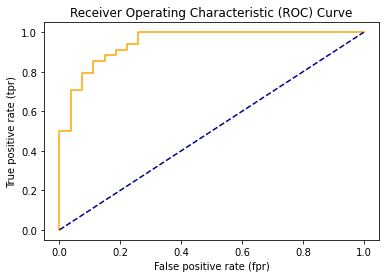

In [26]:
np.random.seed(77)

# Make predictions
y_probability = gridSearch_GNB.predict_proba(X_test)
y_probability_positive = y_probability[:, 1]

# Get fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probability_positive)
roc_curve_plot(fpr, tpr)

In [27]:
gridSearch_GNB_roc_auc = roc_auc_score(y_test, y_probability_positive)
gridSearch_GNB_roc_auc

0.9477124183006536

#### Confusion Matrix

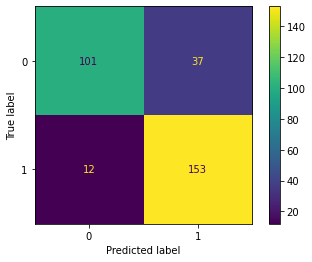

In [29]:
plot_confusion_matrix(gridSearch_GNB, X, y);

#### Cross-Validated Metrics

In [30]:
gridSearch_GNB_cv_metrics = cross_val_metrics(gridSearch_GNB, X, y)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 150 candidates, totalling 750 fits
Accuracy: 83.14%
Precision: 80.70%
Recall: 91.52%
f1: 85.69%


[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    2.0s finished


#### `GaussianNB` `GridSearchCV` Summary

In [31]:
print('The results on the GridSearchCV GaussianNB Model are as follows:\n')
print(f'Cross-Validated Accuracy: {np.mean(gridSearch_GNB_cvs)}')
print(f'AUC_ROC: {gridSearch_GNB_roc_auc}')
print(f'CV Metrics: {gridSearch_GNB_cv_metrics}')

The results on the GridSearchCV GaussianNB Model are as follows:

Cross-Validated Accuracy: 0.8314207650273223
AUC_ROC: 0.9477124183006536
CV Metrics: {'accuracy': 0.83, 'precision': 0.81, 'recall': 0.92, 'f1': 0.86}


## 6.3 `GaussianNB` Results Comparison
A comparison of the baseline, randomizedSearch, and gridSearch models

#### Cross-Validated Accuracy

In [33]:
print(f'Baseline CVS: {np.mean(baseline_GNB_cvs)}')
print(f'RandomSearch CVS: {np.mean(randomSearch_GNB_cvs)}')
print(f'GridSearch CVS: {np.mean(gridSearch_GNB_cvs)}')

Baseline CVS: 0.8050819672131148
RandomSearch CVS: 0.828087431693989
GridSearch CVS: 0.8314207650273223


#### ROC AUC Score

In [34]:
print(f'Baseline ROC_AUC: {baseline_GNB_roc_auc}')
print(f'RandomSearch ROC_AUC: {randomSearch_GNB_roc_auc}')
print(f'GridSearch ROC_AUC: {gridSearch_GNB_roc_auc}')

Baseline ROC_AUC: 0.9466230936819171
RandomSearch ROC_AUC: 0.9466230936819171
GridSearch ROC_AUC: 0.9477124183006536


#### Metrics

In [35]:
print(f'Baseline Metrics: {baseline_GNB_metrics}')
print(f'Cross-Val Baseline Metrics {baseline_GNB_cv_metrics}')
print("--------------------------------------------------------------------------------------------------")
print(f'Cross-Val RandomSearch Metrics {randomSearch_GNB_cv_metrics}')
print("--------------------------------------------------------------------------------------------------")
print(f'Cross-Val GridSearch Metrics {gridSearch_GNB_cv_metrics}')

Baseline Metrics: {'accuracy': 0.87, 'precision': 0.86, 'recall': 0.91, 'f1': 0.89}
Cross-Val Baseline Metrics {'accuracy': 0.81, 'precision': 0.82, 'recall': 0.84, 'f1': 0.82}
--------------------------------------------------------------------------------------------------
Cross-Val RandomSearch Metrics {'accuracy': 0.82, 'precision': 0.82, 'recall': 0.9, 'f1': 0.83}
--------------------------------------------------------------------------------------------------
Cross-Val GridSearch Metrics {'accuracy': 0.83, 'precision': 0.81, 'recall': 0.92, 'f1': 0.86}


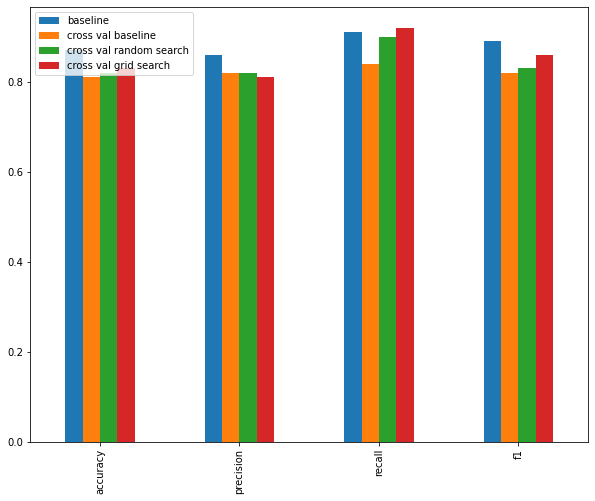

In [36]:
GNB_metrics_comparison = pd.DataFrame({"baseline": baseline_GNB_metrics,
                                           "cross val baseline": baseline_GNB_cv_metrics,
                                           "cross val random search": randomSearch_GNB_cv_metrics,
                                           "cross val grid search": gridSearch_GNB_cv_metrics}
                                          )
GNB_metrics_comparison.plot.bar(figsize=(10, 8));

## 7. `MLPClassifier`

In [20]:
# Import the model
from sklearn.neural_network import MLPClassifier


# Setup random seed
np.random.seed(77)
ss = StandardScaler()

# Make the data
X = heart.drop("target", axis=1)
y = heart["target"]

# Normalizing the data
X = ss.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate
MLP = MLPClassifier()
MLP.fit(X_train, y_train)


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier()

### 7.1 `MLPClassifier` Baseline

#### Cross-Validated Accuracy

In [21]:
# Random Seed for reproducable results
np.random.seed(77)

baseline_MLP_cvs = cross_val_score(MLP, X, y, cv=5)
np.mean(baseline_MLP_cvs)

print(f'The non cross-validated score for the baseline model is: {MLP.score(X_test, y_test)}')
print(f'The cross-validated score for the baseline model is: {np.mean(baseline_MLP_cvs)}')

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn'

The non cross-validated score for the baseline model is: 0.9016393442622951
The cross-validated score for the baseline model is: 0.8246994535519125


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


##### Note how the optimiziation has not converged - When the hyperparamaters are tuned remember to increase max_iter by a lot

#### Area under Reciever Operator Charatceristic Curve (ROC/AUC)

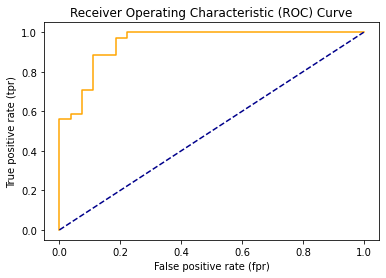

In [22]:
np.random.seed(77)

# Make predictions
y_probability = MLP.predict_proba(X_test)
y_probability_positive = y_probability[:, 1]

# Get fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probability_positive)
roc_curve_plot(fpr, tpr)

In [23]:
baseline_MLP_roc_auc = roc_auc_score(y_test, y_probability_positive)
baseline_MLP_roc_auc

0.9477124183006536

#### Confusion Matrix

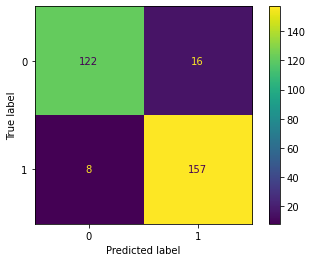

In [24]:
plot_confusion_matrix(MLP, X, y);

#### `MLPClassifier` Metrics

In [25]:
MLP_y_preds = MLP.predict(X_test)
baseline_MLP_metrics = model_prediction(y_test, MLP_y_preds)

Accuracy: 90.16%
Precision: 86.84%
Recall: 97.06%
f1: 91.67%


#### Cross-Validated Metrics

In [26]:
baseline_MLP_cv_metrics = cross_val_metrics(MLP, X, y)

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn'

Accuracy: 82.47%
Precision: 83.68%
Recall: 85.45%
f1: 84.13%


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


#### Note, the scores are below average when compared with other models tested, but is most likely because the max_iter is too low, I will raise the max_iter in the hyperparameter section and see how high it needs to be to converge

#### Baseline `MLPClassifier` Summary

In [27]:
print('The results on the Baseline MLPClassifier Model are as follows:\n')
print(f'Cross-Validated Accuracy: {np.mean(baseline_MLP_cvs)}')
print(f'AUC_ROC: {baseline_MLP_roc_auc}')
print(f'Metrics: {baseline_MLP_metrics}')
print(f'CV Metrics: {baseline_MLP_cv_metrics}')

The results on the Baseline MLPClassifier Model are as follows:

Cross-Validated Accuracy: 0.8246994535519125
AUC_ROC: 0.9477124183006536
Metrics: {'accuracy': 0.9, 'precision': 0.87, 'recall': 0.97, 'f1': 0.92}
CV Metrics: {'accuracy': 0.82, 'precision': 0.84, 'recall': 0.85, 'f1': 0.84}


###  7.2 `MLPClassifier` Hyperparameter adjustments/testing using `RandomizedSearchCV` and `GridSearchCV`

#### 7.2.1 `RandomizedSearchCV`

In [28]:
MLP_random_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu', 'identity', 'logistic'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive', 'invscaling'],
    'max_iter' : [200, 400, 600],
    
}

# Setup random seed
np.random.seed(77)
ss = StandardScaler()

# Make the data
X = heart.drop("target", axis=1)
y = heart["target"]

# Normalizing the data
X = ss.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


# Instantiating our model
MLP = MLPClassifier()

# Using RandomizedSearchCV
randomSearch_MLP = RandomizedSearchCV(estimator=MLP,
                            param_distributions=MLP_random_grid, 
                            n_iter=10, 
                            cv=5, # Automatically crossvalidates it for us
                            verbose=2)
# Fitting our model
randomSearch_MLP.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic 
[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic, total=   0.0s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic 
[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic, total=   0.0s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic 
[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic, total=   0.0s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic 
[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_size

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic, total=   0.1s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic 
[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic, total=   0.2s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic 
[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic, total=   0.4s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic 
[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic, total=   0.4s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=logistic, total=   1.8s
[CV] solver=lbfgs, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=logistic 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=logistic, total=   1.8s
[CV] solver=lbfgs, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=logistic 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=logistic, total=   1.7s
[CV] solver=lbfgs, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=logistic 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=logistic, total=   1.8s
[CV] solver=lbfgs, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=logistic 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=logistic, total=   1.8s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=identity 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=identity, total=   0.4s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=identity 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=identity, total=   0.3s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=identity 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=identity, total=   0.3s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=identity 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=identity, total=   0.3s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=identity 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=identity, total=   0.3s
[CV] solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity 
[CV]  solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity, total=   0.3s
[CV] solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity 
[CV]  solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity, total=   0.3s
[CV] solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity 
[CV]  solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity, total=   0.3s
[CV] solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 5

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   59.6s finished


RandomizedSearchCV(cv=5, estimator=MLPClassifier(),
                   param_distributions={'activation': ['tanh', 'relu',
                                                       'identity', 'logistic'],
                                        'alpha': [0.0001, 0.05],
                                        'hidden_layer_sizes': [(50, 50, 50),
                                                               (50, 100, 50),
                                                               (100,)],
                                        'learning_rate': ['constant',
                                                          'adaptive',
                                                          'invscaling'],
                                        'max_iter': [200, 400, 600],
                                        'solver': ['sgd', 'adam', 'lbfgs']},
                   verbose=2)

In [29]:
randomSearch_MLP.best_params_

{'solver': 'sgd',
 'max_iter': 600,
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': (50, 100, 50),
 'alpha': 0.05,
 'activation': 'tanh'}

##### Cross-Valided Accuracy

In [30]:
randomSearch_MLP_cvs = cross_val_score(randomSearch_MLP, X, y, cv=5)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity, total=   0.4s
[CV] solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity, total=   0.6s
[CV] solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity 
[CV]  solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity, total=   0.6s
[CV] solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity 
[CV]  solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity, total=   0.5s
[CV] solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity 
[CV]  solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity, total=   0.7s
[CV] solver=lbfgs, max_iter=600, learning_rate=invs

[CV]  solver=lbfgs, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   0.5s
[CV] solver=lbfgs, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 
[CV]  solver=lbfgs, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   0.4s
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh, total=   2.3s
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh, total=   2.3s
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh, total=   2.3s
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh, total=   2.3s
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh, total=   2.3s
[CV] solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic 
[CV]  solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic, total=   0.7s
[CV] solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic 
[CV]  solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic, total=   2.0s
[CV] solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic 
[CV]  solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic, total=   0.8s
[CV] solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   1.0s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   1.0s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   1.0s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   1.0s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   1.0s
[CV] solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=logistic 
[CV]  solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=logistic, total=   4.0s
[CV] solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=logistic 
[CV]  solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=logistic, total=   4.6s
[CV] solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=logistic 
[CV]  solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=logistic, total=   4.2s
[CV] solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh, total=   2.6s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh 
[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh, total=   2.3s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh, total=   2.7s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh, total=   2.6s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic 
[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic, total=   0.1s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic 
[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic, total=   0.1s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic 
[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic, total=   0.3s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_s

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   0.5s
[CV] solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   0.5s
[CV] solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   0.5s
[CV] solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   0.5s
[CV] solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   0.5s
[CV] solver=lbfgs, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh 
[CV]  solver=lbfgs, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh, total=   1.9s
[CV] solver=lbfgs, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh 
[CV]  solver=lbfgs, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh, total=   1.4s
[CV] solver=lbfgs, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh 
[CV]  solver=lbfgs, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh, total=   1.9s
[CV] solver=lbfgs, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=t

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] solver=lbfgs, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  solver=lbfgs, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu, total=   0.2s
[CV] solver=lbfgs, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  solver=lbfgs, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu, total=   0.3s
[CV] solver=lbfgs, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu 
[CV]  solver=lbfgs, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu, total=   0.3s
[CV] solver=lbfgs, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu 
[CV]  solver=lbfgs, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu, total=   0.3s
[CV] solver=lbfgs, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu 
[CV]  solver=lbfgs, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu, total=   0.3s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh, total=   0.4s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh, total=   0.4s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh, total=   0.4s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh, total=   0.4s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh, total=   0.4s
[CV] solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=logistic 
[CV]  solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=logistic, total=   2.1s
[CV] solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=logistic 
[CV]  solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=logistic, total=   1.7s
[CV] solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=logistic 
[CV]  solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=logistic, total=   1.6s
[CV] solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(5

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity, total=   2.5s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity 
[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity, total=   1.1s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity 
[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity, total=   1.0s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity 
[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity, total=   1.4s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_l

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity, total=   2.3s
[CV] solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   1.4s
[CV] solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   1.4s
[CV] solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   1.4s
[CV] solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   1.4s
[CV] solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   1.4s
[CV] solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=logistic 
[CV]  solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=logistic, total=   2.4s
[CV] solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=logistic 
[CV]  solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=logistic, total=   2.1s
[CV] solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=logistic 
[CV]  solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=logistic, total=   2.3s
[CV] solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50)

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.1s
[CV] solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.1s
[CV] solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.1s
[CV] solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.1s
[CV] solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   46.6s finished


[CV]  solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.1s


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] solver=sgd, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  solver=sgd, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity, total=   2.0s
[CV] solver=sgd, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity, total=   2.0s
[CV] solver=sgd, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity, total=   2.0s
[CV] solver=sgd, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity, total=   2.0s
[CV] solver=sgd, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity, total=   2.1s
[CV] solver=sgd, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic 
[CV]  solver=sgd, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic, total=   0.1s
[CV] solver=sgd, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic 
[CV]  solver=sgd, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic, total=   0.1s
[CV] solver=sgd, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic 
[CV]  solver=sgd, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic, total=   0.1s
[CV] solver=sgd, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=logisti

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   0.9s
[CV] solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   0.9s
[CV] solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   0.9s
[CV] solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   0.9s
[CV] solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   0.9s
[CV] solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   6.6s
[CV] solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   6.6s
[CV] solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   6.6s
[CV] solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   6.3s
[CV] solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   6.4s
[CV] solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh, total=   1.4s
[CV] solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh, total=   1.3s
[CV] solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh, total=   1.4s
[CV] solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh, total=   1.4s
[CV] solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh, total=   1.4s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 
[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   3.8s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 
[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   3.4s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 
[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   3.2s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.000

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   4.5s
[CV] solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu 
[CV]  solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu, total=   0.4s
[CV] solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu 
[CV]  solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu, total=   0.5s
[CV] solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu 
[CV]  solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu, total=   0.5s
[CV] solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic 
[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic, total=   0.1s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic 
[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic, total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic 
[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic, total=   0.0s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic 
[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic, total=   0.1s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic 
[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic, total=   0.1s
[CV] solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic 
[CV]  solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   3.6s
[CV] solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   3.6s
[CV] solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   3.9s
[CV] solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   3.6s
[CV] solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu 
[CV]  solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   3.2s
[CV] solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   0.6s
[CV] solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   0.5s
[CV] solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   0.6s
[CV] solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   0.5s
[CV] solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   0.6s
[CV] solver=sgd, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 
[CV]  solver=sgd, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   0.1s
[CV] solver=sgd, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 
[CV]  solver=sgd, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   0.1s
[CV] solver=sgd, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 
[CV]  solver=sgd, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   0.1s
[CV] solver=sgd, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 
[CV]  solver=sgd, max_iter=200, lea

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh, total=   1.4s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh, total=   1.5s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh, total=   1.3s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh, total=   1.4s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh, total=   1.3s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.1s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.1s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.1s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.1s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.0s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 
[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   0.8s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   0.9s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 
[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   0.8s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 
[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   0.8s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   0.9s
[CV] solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   0.5s
[CV] solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   0.6s
[CV] solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   0.5s
[CV] solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   0.5s
[CV] solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   47.1s finished


[CV]  solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   0.6s


In [31]:
np.mean(randomSearch_MLP_cvs)

0.8381967213114756

##### Area under Reciever Operator Characteristic Curve

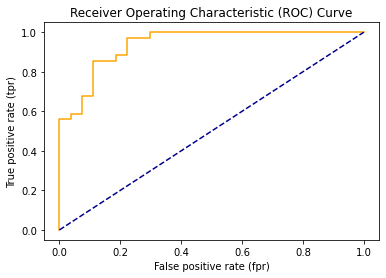

In [32]:
np.random.seed(77)

# Make predictions
y_probability = randomSearch_MLP.predict_proba(X_test)
y_probability_positive = y_probability[:, 1]

# Get fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probability_positive)
roc_curve_plot(fpr, tpr)

In [33]:
randomSearch_MLP_roc_auc = roc_auc_score(y_test, y_probability_positive)
randomSearch_MLP_roc_auc

0.9389978213507625

##### Confusion Matrix

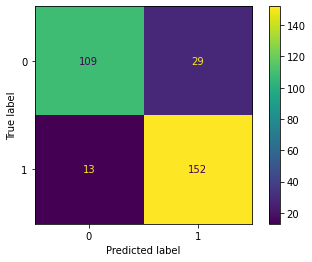

In [25]:
plot_confusion_matrix(randomSearch_MLP, X, y);

##### Cross-Validated Metrics

In [34]:
randomSearch_MLP_cv_metrics = cross_val_metrics(randomSearch_MLP, X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV]  solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   2.9s
[CV] solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   3.0s
[CV] solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   2.9s
[CV] solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   2.9s
[CV] solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   2.9s
[CV] solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh 
[CV]  solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh, total=   3.1s
[CV] solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh 
[CV]  solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh, total=   2.6s
[CV] solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh 
[CV]  solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh, total=   3.5s
[CV] solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activat

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   0.5s
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   0.5s
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   0.4s
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   0.5s
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   0.5s
[CV] solver=lbfgs, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic 
[CV]  solver=lbfgs, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic, total=   1.2s
[CV] solver=lbfgs, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic 
[CV]  solver=lbfgs, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic, total=   1.1s
[CV] solver=lbfgs, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic 
[CV]  solver=lbfgs, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic, total=   2.6s
[CV] solver=lbfgs, max_iter=600, learning_rate=invscaling, hid

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] solver=lbfgs, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity 
[CV]  solver=lbfgs, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity, total=   0.7s
[CV] solver=lbfgs, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  solver=lbfgs, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity, total=   0.5s
[CV] solver=lbfgs, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity 
[CV]  solver=lbfgs, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity, total=   0.5s
[CV] solver=lbfgs, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity 
[CV]  solver=lbfgs, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity, total=   0.5s
[CV] solver=lbfgs, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity 
[CV]  solver=lbfgs, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity, total=   0.4s
[CV] solver=adam, max_iter=400, learning_rate=constant, hi

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu, total=   4.4s
[CV] solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu, total=   4.3s
[CV] solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu, total=   4.4s
[CV] solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu, total=   4.3s
[CV] solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu, total=   4.3s
[CV] solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=identity 
[CV]  solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=identity, total=   0.2s
[CV] solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=identity 
[CV]  solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=identity, total=   0.3s
[CV] solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=identity 
[CV]  solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=identity, total=   0.4s
[CV] solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh, total=   0.9s
[CV] solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh 
[CV]  solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh, total=   0.8s
[CV] solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh, total=   0.9s
[CV] solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh 
[CV]  solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh, total=   0.3s
[CV] solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh 
[CV]  solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh, total=   0.2s
[CV] solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh 
[CV]  solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh, total=   0.3s
[CV] solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh 
[CV]  solver=lbfgs, max_iter=400, lear

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh, total=   2.6s
[CV] solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh, total=   2.6s
[CV] solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh, total=   2.6s
[CV] solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh, total=   2.7s
[CV] solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=identity 
[CV]  solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=identity, total=   0.2s
[CV] solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=identity 
[CV]  solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=identity, total=   0.2s
[CV] solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=identity 
[CV]  solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=identity, total=   0.2s
[CV] solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=identity 
[CV]  sol

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   57.2s finished
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.1s remaining:    0.0s


[CV]  solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   9.2s
[CV] solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   9.2s
[CV] solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 
[CV]  solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   9.2s
[CV] solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 
[CV]  solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   9.5s
[CV] solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   9.9s
[CV] solver=lbfgs, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu 
[CV]  solver=lbfgs, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu, total=   0.2s
[CV] solver=lbfgs, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu 
[CV]  solver=lbfgs, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu, total=   0.3s
[CV] solver=lbfgs, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu 
[CV]  solver=lbfgs, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu, total=   0.3s
[CV] solver=lbfgs, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alph

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   4.9s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   4.8s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   5.0s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   4.8s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   4.8s
[CV] solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.1s
[CV] solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.1s
[CV] solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.1s
[CV] solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.1s
[CV] solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.1s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 
[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   0.1s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 
[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   0.1s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 
[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   0.1s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 
[CV]  solver=sgd, max_i

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu, total=   4.8s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu, total=   4.8s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu, total=   4.8s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu, total=   4.8s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu, total=   4.8s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu 
[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   0.2s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu 
[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   0.2s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu 
[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   0.1s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, acti

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.8min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh, total=   2.1s
[CV] solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh, total=   2.4s
[CV] solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh 
[CV]  solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh, total=   1.9s
[CV] solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh 
[CV]  solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh, total=   1.9s
[CV] solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh 
[CV]  solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh, total=   2.5s
[CV] solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100,

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=logistic, total=   6.7s
[CV] solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=logistic 
[CV]  solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=logistic, total=   0.2s
[CV] solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=logistic 
[CV]  solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=logistic, total=   1.9s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh 
[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh, total=   2.4s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_siz

[CV]  solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity, total=   0.7s
[CV] solver=lbfgs, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=identity 
[CV]  solver=lbfgs, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=identity, total=   0.0s
[CV] solver=lbfgs, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=identity 
[CV]  solver=lbfgs, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=identity, total=   0.0s
[CV] solver=lbfgs, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=identity 
[CV]  solver=lbfgs, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=identity, total=   0.0s
[CV] solver=lbfgs, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, act

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] solver=sgd, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=logistic 
[CV]  solver=sgd, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=logistic, total=   0.2s
[CV] solver=sgd, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=logistic 
[CV]  solver=sgd, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=logistic, total=   0.3s
[CV] solver=sgd, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=logistic 
[CV]  solver=sgd, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=logistic, total=   0.1s
[CV] solver=sgd, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=logistic 
[CV]  solver=sgd, max_iter

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic, total=   2.1s
[CV] solver=lbfgs, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic 
[CV]  solver=lbfgs, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic, total=   1.3s
[CV] solver=lbfgs, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic 
[CV]  solver=lbfgs, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic, total=   0.9s
[CV] solver=lbfgs, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic 
[CV]  solver=lbfgs, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic, total=   1.0s
[CV] solver=lbfgs, max_iter=200, learning_rate=constant, hidden_l

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.2s
[CV] solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.1s
[CV] solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.1s
[CV] solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.1s
[CV] solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.3s
[CV] solver=lbfgs, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu 
[CV]  solver=lbfgs, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu, total=   0.3s
[CV] solver=lbfgs, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu 
[CV]  solver=lbfgs, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu, total=   0.4s
[CV] solver=lbfgs, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu 
[CV]  solver=lbfgs, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu, total=   0.3s
[CV] solver=lbfgs, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu, total=   4.4s
[CV] solver=sgd, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu, total=   4.4s
[CV] solver=sgd, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu, total=   4.4s
[CV] solver=sgd, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu, total=   4.3s
[CV] solver=sgd, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu, total=   4.3s
[CV] solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=logistic 
[CV]  solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=logistic, total=   0.5s
[CV] solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=logistic 
[CV]  solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=logistic, total=   0.2s
[CV] solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=logistic 
[CV]  solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=logistic, total=   0.4s
[CV] solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   48.5s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   2.2s
[CV] solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV]  solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   2.0s
[CV] solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 
[CV]  solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   2.2s
[CV] solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 
[CV]  solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   2.2s
[CV] solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 
[CV]  solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   2.1s
[CV] solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, acti

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu, total=   7.3s
[CV] solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu, total=   7.3s
[CV] solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu, total=   7.2s
[CV] solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu, total=   7.3s
[CV] solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu, total=   7.3s
[CV] solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic 
[CV]  solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic, total=   0.4s
[CV] solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic 
[CV]  solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic, total=   0.5s
[CV] solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic 
[CV]  solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic, total=   0.6s
[CV] solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic 
[CV]  so

[CV]  solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity, total=   0.2s
[CV] solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity 
[CV]  solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity, total=   0.2s
[CV] solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity 
[CV]  solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity, total=   0.3s
[CV] solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity 
[CV]  solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity, total=   0.2s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, h

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] solver=sgd, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu 
[CV]  solver=sgd, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu, total=   0.2s
[CV] solver=sgd, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  solver=sgd, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu, total=   0.2s
[CV] solver=sgd, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu 
[CV]  solver=sgd, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu, total=   0.2s
[CV] solver=sgd, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu 
[CV]  solver=sgd, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu, total=   0.1s
[CV] solver=sgd, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu 
[CV]  solver=sgd, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu, total=   0.2s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alph

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   2.2s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   2.2s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   2.4s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   2.3s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   2.3s
[CV] solver=lbfgs, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh 
[CV]  solver=lbfgs, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh, total=   1.7s
[CV] solver=lbfgs, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh 
[CV]  solver=lbfgs, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh, total=   1.4s
[CV] solver=lbfgs, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh, total=   1.9s
[CV] solver=lbfgs, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh 
[CV]  solver=lbfgs, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh, total=   1.4s
[CV] solver=lbfgs, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh 
[CV]  solver=lbfgs, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh, total=   1.3s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 
[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   0.2s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu, total=   4.8s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu, total=   4.8s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu, total=   5.0s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu, total=   4.9s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu, total=   4.9s
[CV] solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=identity 
[CV]  solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=identity, total=   0.7s
[CV] solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=identity 
[CV]  solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=identity, total=   1.0s
[CV] solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=identity 
[CV]  solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=identity, total=   1.3s
[CV] solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   9.4s
[CV] solver=lbfgs, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 
[CV]  solver=lbfgs, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   8.4s
[CV] solver=lbfgs, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   9.6s
[CV] solver=lbfgs, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 
[CV]  solver=lbfgs, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   9.0s
[CV] solver=lbfgs, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 
[CV]  solver=lbfgs, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   9.4s
[CV] solver=lbfgs, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic 
[CV]  solver=lbfgs, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic, total=   0.5s
[CV] solver=lbfgs, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh, total=   2.7s
[CV] solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh 
[CV]  solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh, total=   2.7s
[CV] solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh 
[CV]  solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh, total=   2.6s
[CV] solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh 
[CV]  solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh, total=   2.2s
[CV] solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh, total=   2.6s
[CV] solver=lbfgs, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity 
[CV]  solver=lbfgs, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity, total=   0.5s
[CV] solver=lbfgs, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity 
[CV]  solver=lbfgs, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity, total=   0.4s
[CV] solver=lbfgs, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity 
[CV]  solver=lbfgs, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity, total=   0.4s
[CV] solver=lbfgs, max_iter=200, learning_rate=invscaling, hidden_l

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.9min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   2.9s
[CV] solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV]  solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   3.1s
[CV] solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 
[CV]  solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   2.9s
[CV] solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 
[CV]  solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   3.1s
[CV] solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 
[CV]  solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   2.8s
[CV] solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(5

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.6s
[CV] solver=sgd, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.5s
[CV] solver=sgd, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 
[CV]  solver=sgd, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.5s
[CV] solver=sgd, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.5s
[CV] solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh, total=   0.5s
[CV] solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh, total=   0.5s
[CV] solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh, total=   0.5s
[CV] solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh, total=   0.4s
[CV] solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh, total=   0.5s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity, total=   1.1s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity, total=   1.1s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity, total=   1.1s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity 
[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity, total=   1.1s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity, total=   1.2s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   0.5s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   0.5s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   0.5s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   0.5s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   0.5s
[CV] solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh, total=   2.2s
[CV] solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh, total=   2.3s
[CV] solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh, total=   2.3s
[CV] solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh, total=   2.3s
[CV] solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh, total=   2.2s
[CV] solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic 
[CV]  solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic, total=   0.5s
[CV] solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic 
[CV]  solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic, total=   0.3s
[CV] solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic 
[CV]  solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic, total=   0.3s
[CV] solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activatio

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   0.5s
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   0.5s
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   0.5s
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   0.5s
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   0.5s
[CV] solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh 
[CV]  solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh, total=   3.0s
[CV] solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh 
[CV]  solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh, total=   3.2s
[CV] solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh 
[CV]  solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh, total=   2.8s
[CV] solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic, total=   0.4s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic, total=   0.4s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic, total=   0.4s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic, total=   0.5s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic, total=   0.4s
[CV] solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=identity 
[CV]  solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=identity, total=   0.5s
[CV] solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=identity 
[CV]  solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=identity, total=   0.5s
[CV] solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=identity 
[CV]  solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=identity, total=   0.5s
[CV] solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=identity 
[CV]  solver=sgd, ma

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   1.5s
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   1.5s
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   1.4s
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   1.4s
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   49.5s finished


[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   1.5s
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh, total=   3.1s
[CV] solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV]  solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh, total=   2.7s
[CV] solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh 
[CV]  solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh, total=   2.6s
[CV] solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh 
[CV]  solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh, total=   3.1s
[CV] solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh 
[CV]  solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh, total=   3.4s
[CV] solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activatio

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   0.6s
[CV] solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   0.5s
[CV] solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   0.5s
[CV] solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   0.5s
[CV] solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   0.6s
[CV] solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   7.2s
[CV] solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   7.2s
[CV] solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   7.2s
[CV] solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   7.2s
[CV] solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   7.2s
[CV] solver=lbfgs, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity 
[CV]  solver=lbfgs, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity, total=   0.2s
[CV] solver=lbfgs, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity 
[CV]  solver=lbfgs, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity, total=   0.2s
[CV] solver=lbfgs, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity 
[CV]  solver=lbfgs, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity, total=   0.2s
[CV] solver=lbfgs, max_iter=200, learning_rate=adaptive, hidden_la

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity, total=   2.0s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity, total=   2.0s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity, total=   2.0s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity, total=   2.0s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity, total=   2.0s


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=identity 
[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=identity, total=   0.5s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=identity 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=identity, total=   0.4s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=identity 
[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=identity, total=   0.4s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=identity 
[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=identity, total=   0.4s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=identity 
[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=identity, total=   0.5s
[CV] solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh 
[CV]

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic, total=   0.4s
[CV] solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic, total=   0.4s
[CV] solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic, total=   0.5s
[CV] solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic, total=   0.4s
[CV] solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic, total=   0.4s
[CV] solver=lbfgs, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 
[CV]  solver=lbfgs, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   0.5s
[CV] solver=lbfgs, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 
[CV]  solver=lbfgs, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   0.4s
[CV] solver=lbfgs, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 
[CV]  solver=lbfgs, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   0.5s
[CV] solver=lbfgs, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), a

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic, total=   0.5s
[CV] solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic, total=   0.4s
[CV] solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic, total=   0.4s
[CV] solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic, total=   0.4s
[CV] solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


[CV]  solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic, total=   0.4s


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh 
[CV]  solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh, total=   1.6s
[CV] solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh, total=   1.5s
[CV] solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh 
[CV]  solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh, total=   1.4s
[CV] solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh 
[CV]  solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh, total=   1.5s
[CV] solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh 
[CV]  solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh, total=   1.4s
[CV] solver=sgd, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, act

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh, total=   1.4s
[CV] solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh, total=   1.4s
[CV] solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh, total=   1.4s
[CV] solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh, total=   1.4s
[CV] solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh, total=   1.4s
[CV] solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=logistic 
[CV]  solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=logistic, total=   1.5s
[CV] solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=logistic 
[CV]  solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=logistic, total=   0.3s
[CV] solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=logistic 
[CV]  solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=logistic, total=   0.2s
[CV] solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   1.5s
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   1.5s
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   1.5s
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu 
[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   1.4s
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu 
[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   1.4s
[CV] solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic 
[CV]  solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic, total=   0.7s
[CV] solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   0.9s
[CV] solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   0.9s
[CV] solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   0.9s
[CV] solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   0.9s
[CV] solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   0.9s
[CV] solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity 
[CV]  solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity, total=   0.6s
[CV] solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity 
[CV]  solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity, total=   0.6s
[CV] solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity 
[CV]  solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity, total=   0.2s
[CV] solver=adam, max_iter=400, learning_rate=invscaling, hidden

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   53.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic 
[CV]  solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic, total=   0.2s
[CV] solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic, total=   1.1s
[CV] solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic 
[CV]  solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic, total=   1.0s
[CV] solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic 
[CV]  solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic, total=   0.1s
[CV] solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=logistic, total=   1.3s
[CV] solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   2.4s
[CV] solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   2.4s
[CV] solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   2.4s
[CV] solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   2.4s
[CV] solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   2.4s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=identity 
[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=identity, total=   0.2s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=identity 
[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=identity, total=   0.1s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=identity 
[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=identity, total=   0.2s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   1.6s
[CV] solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   1.6s
[CV] solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   1.6s
[CV] solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   1.5s
[CV] solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   1.6s
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=identity 
[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=identity, total=   0.4s
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=identity 
[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=identity, total=   0.3s
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=identity 
[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=identity, total=   0.2s
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity, total=   4.0s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity, total=   4.0s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity, total=   4.0s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity 
[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity, total=   2.5s
[CV] solver=lbfgs, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   5.4s
[CV] solver=lbfgs, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu 
[CV]  solver=lbfgs, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   2.3s
[CV] solver=lbfgs, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   5.3s
[CV] solver=lbfgs, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu 
[CV]  solver=lbfgs, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   5.1s
[CV] solver=lbfgs, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu 
[CV]  solver=lbfgs, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   3.7s
[CV] solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=identity 
[CV]  solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=identity, total=   0.2s
[CV] solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=i

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   3.5s
[CV] solver=lbfgs, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   3.5s
[CV] solver=lbfgs, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   3.5s
[CV] solver=lbfgs, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   3.6s
[CV] solver=lbfgs, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


[CV]  solver=lbfgs, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   3.5s
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity, total=   2.0s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity 
[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity, total=   2.0s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity, total=   2.0s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity, total=   2.1s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity, total=   2.0s
[CV] solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic 
[CV]  solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic, total=   0.4s
[CV] solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic, total=   0.4s
[CV] solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic, total=   0.4s
[CV] solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic, total=   0.4s
[CV] solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=logistic, total=   0.4s
[CV] solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity 
[CV]  solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity, total=   0.1s
[CV] solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity 
[CV]  solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity, total=   0.1s
[CV] solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity 
[CV]  solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity, total=   0.1s
[CV] solver=lbfgs, max_iter=400, learning_rate=invscaling, hid

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic, total=   1.2s
[CV] solver=sgd, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic, total=   1.2s
[CV] solver=sgd, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic, total=   1.3s
[CV] solver=sgd, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic, total=   1.3s
[CV] solver=sgd, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic, total=   1.3s
[CV] solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=logistic 
[CV]  solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=logistic, total=   1.8s
[CV] solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=logistic 
[CV]  solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=logistic, total=   1.7s
[CV] solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=logistic 
[CV]  solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=logistic, total=   2.1s
[CV] solver=adam, max_iter=600, learning_rate=constant, hidden_layer_size

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   4.9s
[CV] solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   4.9s
[CV] solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   4.9s
[CV] solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   4.9s
[CV] solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   5.0s
[CV] solver=lbfgs, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh 
[CV]  solver=lbfgs, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh, total=   3.7s
[CV] solver=lbfgs, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh 
[CV]  solver=lbfgs, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh, total=   3.1s
[CV] solver=lbfgs, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh 
[CV]  solver=lbfgs, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=tanh, total=   2.6s
[CV] solver=lbfgs, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.05,

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] solver=sgd, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  solver=sgd, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity, total=   2.4s
[CV] solver=sgd, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  solver=sgd, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity, total=   3.1s
[CV] solver=sgd, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity 
[CV]  solver=sgd, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity, total=   4.3s
[CV] solver=sgd, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity 
[CV]  solver=sgd, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity, total=   5.9s
[CV] solver=sgd, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity, total=   6.1s
[CV] solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.1s
[CV] solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.0s
[CV] solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.0s
[CV] solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.1s
[CV] solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.1s
[CV] solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   0.6s
[CV] solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   0.5s
[CV] solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   0.5s
[CV] solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   0.5s
[CV] solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   0.5s
[CV] solver=lbfgs, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh 
[CV]  solver=lbfgs, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh, total=   0.2s
[CV] solver=lbfgs, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh 
[CV]  solver=lbfgs, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh, total=   0.3s
[CV] solver=lbfgs, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh 
[CV]  solver=lbfgs, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh, total=   0.2s
[CV] solver=lbfgs, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alpha=0.000

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.0s
[CV] solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.0s
[CV] solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.1s
[CV] solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.1s
[CV] solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.0s
[CV] solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic 
[CV]  solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic, total=   0.5s
[CV] solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic 
[CV]  solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic, total=   0.5s
[CV] solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic 
[CV]  solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic, total=   0.6s
[CV] solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic 

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.1s
[CV] solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.1s
[CV] solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.1s
[CV] solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.1s
[CV] solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=relu, total=   1.1s
[CV] solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh 
[CV]  solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh, total=   2.2s
[CV] solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh 
[CV]  solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh, total=   1.8s
[CV] solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh 
[CV]  solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=tanh, total=   1.7s
[CV] solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activ

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 
[CV]  solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   2.9s
[CV] solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV]  solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   2.8s
[CV] solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 
[CV]  solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   3.2s
[CV] solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 
[CV]  solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   3.0s
[CV] solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 
[CV]  solver=adam, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   3.3s
[CV] solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 50, 50), alph

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   1.0s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   1.0s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   1.1s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   1.0s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   1.0s
[CV] solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=logistic 
[CV]  solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=logistic, total=   1.8s
[CV] solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=logistic 
[CV]  solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=logistic, total=   0.2s
[CV] solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=logistic 
[CV]  solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=logistic, total=   1.9s
[CV] solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   0.5s
[CV] solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   0.5s
[CV] solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   0.5s
[CV] solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   0.5s
[CV] solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   0.5s
[CV] solver=sgd, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity, total=   1.2s
[CV] solver=sgd, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity 
[CV]  solver=sgd, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity, total=   0.8s
[CV] solver=sgd, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity, total=   1.2s
[CV] solver=sgd, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity, total=   1.2s
[CV] solver=sgd, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=identity, total=   1.2s
[CV] solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu, total=   7.3s
[CV] solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu, total=   7.3s
[CV] solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu, total=   7.5s
[CV] solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu, total=   7.3s
[CV] solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu, total=   7.3s
[CV] solver=lbfgs, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu 
[CV]  solver=lbfgs, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu, total=   0.5s
[CV] solver=lbfgs, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu 
[CV]  solver=lbfgs, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu, total=   0.4s
[CV] solver=lbfgs, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu 
[CV]  solver=lbfgs, max_iter=600, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu, total=   0.5s
[CV] solver=lbfgs, max_iter=600, learning_rate=invscaling, hidden_layer_size

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   2.9s
[CV] solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV]  solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   2.9s
[CV] solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 
[CV]  solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   3.1s
[CV] solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 
[CV]  solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   2.8s
[CV] solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 
[CV]  solver=adam, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   2.9s
[CV] solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alph

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   2.2s
[CV] solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   2.2s
[CV] solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   2.2s
[CV] solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   2.2s
[CV] solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   2.2s
[CV] solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu 
[CV]  solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu, total=   0.5s
[CV] solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu 
[CV]  solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu, total=   0.5s
[CV] solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu 
[CV]  solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu, total=   0.4s
[CV] solver=lbfgs, max_iter=400, learning_rate=invscaling, hidden_layer_size

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   0.5s
[CV] solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   0.4s
[CV] solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   0.4s
[CV] solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   0.4s
[CV] solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   0.4s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=identity 
[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=identity, total=   0.4s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=identity 
[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=identity, total=   0.5s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=identity 
[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=identity, total=   0.4s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=identity 
[CV]  solver=sgd, max_

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   6.2s
[CV] solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   6.3s
[CV] solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   6.6s
[CV] solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   6.3s
[CV] solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


[CV]  solver=lbfgs, max_iter=400, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=relu, total=   6.6s
[CV] solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=identity 
[CV]  solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=identity, total=   0.0s
[CV] solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=identity 
[CV]  solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=identity, total=   0.0s
[CV] solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=identity 
[CV]  solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=identity, total=   0.0s
[CV] solver=lbfgs, max_iter=600, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activati

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity 
[CV]  solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity, total=   0.6s
[CV] solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity, total=   0.5s
[CV] solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity 
[CV]  solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity, total=   0.3s
[CV] solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity 
[CV]  solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity, total=   0.6s
[CV] solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity 
[CV]  solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=identity, total=   0.7s
[CV] solver=lbfgs, max_iter=400, learning_rate=constant, hidden_l

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu, total=   7.4s
[CV] solver=sgd, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu, total=   7.1s
[CV] solver=sgd, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu, total=   7.2s
[CV] solver=sgd, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu, total=   7.2s
[CV] solver=sgd, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=relu, total=   7.2s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=identity 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=identity, total=   0.4s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=identity 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=identity, total=   0.4s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=identity 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=identity, total=   0.4s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=identity 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=identity, total=   0.4s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=identity 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.05, activation=identity, total=   0.3s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=logistic 
[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=logistic, total=   0.1s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=logistic 
[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=logistic, total=   0.4s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=logistic 
[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=logistic, total=   0.4s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05,

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=logistic, total=   3.4s
[CV] solver=lbfgs, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=logistic 
[CV]  solver=lbfgs, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=logistic, total=   1.6s
[CV] solver=lbfgs, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=logistic 
[CV]  solver=lbfgs, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=logistic, total=   1.8s
[CV] solver=lbfgs, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=logistic 
[CV]  solver=lbfgs, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=logistic, total=   1.6s
[CV] solver=lbfgs, max_iter=200, learning_ra

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh 
[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh, total=   2.2s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh, total=   2.6s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh 
[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh, total=   1.9s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh 
[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh, total=   2.5s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh 
[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=tanh, total=   2.5s
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activati

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic, total=   0.4s
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic 
[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic, total=   0.4s
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic, total=   0.4s
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic, total=   0.5s
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=logistic, total=   0.5s
[CV] solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=logistic 
[CV]  solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=logistic, total=   1.9s
[CV] solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=logistic 
[CV]  solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=logistic, total=   1.9s
[CV] solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=logistic 
[CV]  solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=logistic, total=   2.4s
[CV] solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(50, 10

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu, total=   1.5s
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu, total=   1.5s
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu 
[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu, total=   1.4s
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu, total=   1.5s
[CV] solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.0001, activation=relu, total=   1.5s
[CV] solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   0.5s
[CV] solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   0.5s
[CV] solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   0.5s
[CV] solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   0.5s
[CV] solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   0.6s
[CV] solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh, total=   0.9s
[CV] solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh, total=   0.9s
[CV] solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh, total=   0.9s
[CV] solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh, total=   0.9s
[CV] solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=400, learning_rate=constant, hidden_layer_sizes=(100,), alpha=0.05, activation=tanh, total=   0.9s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   2.2s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   2.3s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   2.2s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   2.2s
[CV] solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=200, learning_rate=adaptive, hidden_layer_sizes=(50, 100, 50), alpha=0.0001, activation=tanh, total=   2.3s
[CV] solver=lbfgs, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 
[CV]  solver=lbfgs, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   0.1s
[CV] solver=lbfgs, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 
[CV]  solver=lbfgs, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   0.1s
[CV] solver=lbfgs, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 
[CV]  solver=lbfgs, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh, total=   0.1s
[CV] solver=lbfgs, max_iter=200, learning_rate=invscaling, hidden_layer_sizes=(100,), alpha=0.0001, activation=tanh 
[

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   51.6s finished
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity 
[CV]  solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity, total=   0.3s
[CV] solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity, total=   0.7s
[CV] solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity 
[CV]  solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity, total=   0.6s
[CV] solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity 
[CV]  solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity, total=   0.6s
[CV] solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity 
[CV]  solver=adam, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 100, 50), alpha=0.05, activation=identity, total=   0.5s
[CV] solver=lbfgs, max_iter=200, learning_rate=adaptive, hidden_l

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   2.8s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   2.9s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   2.9s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   2.8s
[CV] solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, max_iter=400, learning_rate=constant, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=relu, total=   2.9s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=logistic 
[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=logistic, total=   0.1s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=logistic 
[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=logistic, total=   0.1s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=logistic 
[CV]  solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 50), alpha=0.05, activation=logistic, total=   0.2s
[CV] solver=sgd, max_iter=400, learning_rate=invscaling, hidden_layer_sizes=(50, 50, 

C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   1.6s
[CV] solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   1.6s
[CV] solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   1.6s
[CV] solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   1.6s
[CV] solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu 


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.0min finished


[CV]  solver=adam, max_iter=600, learning_rate=adaptive, hidden_layer_sizes=(100,), alpha=0.0001, activation=relu, total=   1.6s
Accuracy: 81.84%
Precision: 83.13%
Recall: 87.88%
f1: 85.46%


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


##### `MLPClassifier` `RandomizedSearchCV` Summary

In [35]:
print('The results on the RandomizedSearchCV MLPClassifier Model are as follows:\n')
print(f'Cross-Validated Accuracy: {np.mean(randomSearch_MLP_cvs)}')
print(f'AUC_ROC: {randomSearch_MLP_roc_auc}')
print(f'CV Metrics: {randomSearch_MLP_cv_metrics}')

The results on the RandomizedSearchCV MLPClassifier Model are as follows:

Cross-Validated Accuracy: 0.8381967213114756
AUC_ROC: 0.9389978213507625
CV Metrics: {'accuracy': 0.82, 'precision': 0.83, 'recall': 0.88, 'f1': 0.85}


#### 7.2.2 `GridSearchCV`

In [11]:
from sklearn.neural_network import MLPClassifier

MLP_grid = {
    'hidden_layer_sizes': [(50,100,50)],
    'activation': ['relu'],
    'solver': ['sgd'],
    'alpha': [0.05],
    'learning_rate': ['constant','adaptive'],
    'max_iter' : [600, 800, 5000],
    
}

# Setup random seed
np.random.seed(77)
ss = StandardScaler()

# Make the data
X = heart.drop("target", axis=1)
y = heart["target"]

# Normalizing the data
X = ss.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


# Instantiating our model
MLP = MLPClassifier()

# Using RandomizedSearchCV
gridSearch_MLP = GridSearchCV(MLP,
                              param_grid=MLP_grid,
                              cv=5,
                              verbose=True)
# Fitting our model
gridSearch_MLP.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: 

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['relu'], 'alpha': [0.05],
                         'hidden_layer_sizes': [(50, 100, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [600, 800, 5000], 'solver': ['sgd']},
             verbose=True)

In [12]:
gridSearch_MLP.best_params_

{'activation': 'relu',
 'alpha': 0.05,
 'hidden_layer_sizes': (50, 100, 50),
 'learning_rate': 'adaptive',
 'max_iter': 800,
 'solver': 'sgd'}

#### NOTE - Notice how in the ConvergenceWarning above this, it only has warnings for a max_iter of 600 and 800, not 5000, meaning 5000 has successfully converged, yet the best param is still a max iter of 800, despite not converging? Unsure on what this means - will leave it as is. 

##### Cross-Validated Accuracy

In [13]:
gridSearch_MLP_cvs = cross_val_score(gridSearch_MLP, X, y, cv=5)
np.mean(gridSearch_MLP_cvs)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn'

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn'

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn'

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: 

0.7950273224043716

##### Area under Reciever Opererator Characteristic Curve

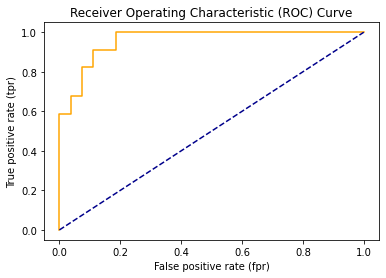

In [14]:
np.random.seed(77)

# Make predictions
y_probability = gridSearch_MLP.predict_proba(X_test)
y_probability_positive = y_probability[:, 1]

# Get fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probability_positive)
roc_curve_plot(fpr, tpr)

In [15]:
gridSearch_MLP_roc_auc = roc_auc_score(y_test, y_probability_positive)
gridSearch_MLP_roc_auc

0.9596949891067539

##### Confusion Matrix

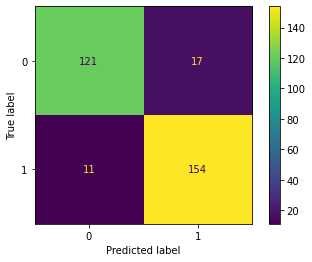

In [16]:
plot_confusion_matrix(gridSearch_MLP, X, y);

##### Cross-Validated Metrics

In [17]:
gridSearch_MLP_cv_metrics = cross_val_metrics(gridSearch_MLP, X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn'

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn'

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn'

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn'

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn'

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn'

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn'

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn'

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn'

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn'

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn'

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn'

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn'

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn'

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn'

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn'

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn'

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: 

Accuracy: 81.17%
Precision: 84.07%
Recall: 85.45%
f1: 83.18%


C:\Users\Charl\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


##### `MLPClassifier` `GridSearchCV` Summary

In [18]:
print('The results on the GridSearchCV MLPClassifier Model are as follows:\n')
print(f'Cross-Validated Accuracy: {np.mean(gridSearch_MLP_cvs)}')
print(f'AUC_ROC: {gridSearch_MLP_roc_auc}')
print(f'CV Metrics: {gridSearch_MLP_cv_metrics}')

The results on the GridSearchCV MLPClassifier Model are as follows:

Cross-Validated Accuracy: 0.7950273224043716
AUC_ROC: 0.9596949891067539
CV Metrics: {'accuracy': 0.81, 'precision': 0.84, 'recall': 0.85, 'f1': 0.83}


## 7.3 `MLPClassifier` Results Comparison
A comparison of the baseline, randomizedSearch, and gridSearch models

#### Cross-Validated Accuracy

In [36]:
print(f'Baseline CVS: {np.mean(baseline_MLP_cvs)}')
print(f'RandomSearch CVS: {np.mean(randomSearch_MLP_cvs)}')
print(f'GridSearch CVS: {np.mean(gridSearch_MLP_cvs)}')

Baseline CVS: 0.8246994535519125
RandomSearch CVS: 0.8381967213114756
GridSearch CVS: 0.7950273224043716


#### ROC AUC Score

In [37]:
print(f'Baseline ROC_AUC: {baseline_MLP_roc_auc}')
print(f'RandomSearch ROC_AUC: {randomSearch_MLP_roc_auc}')
print(f'GridSearch ROC_AUC: {gridSearch_MLP_roc_auc}')

Baseline ROC_AUC: 0.9477124183006536
RandomSearch ROC_AUC: 0.9389978213507625
GridSearch ROC_AUC: 0.9596949891067539


#### Metrics

In [38]:
print(f'Baseline Metrics: {baseline_MLP_metrics}')
print(f'Cross-Val Baseline Metrics {baseline_MLP_cv_metrics}')
print("--------------------------------------------------------------------------------------------------")
print(f'Cross-Val RandomSearch Metrics {randomSearch_MLP_cv_metrics}')
print("--------------------------------------------------------------------------------------------------")
print(f'Cross-Val GridSearch Metrics {gridSearch_MLP_cv_metrics}')

Baseline Metrics: {'accuracy': 0.9, 'precision': 0.87, 'recall': 0.97, 'f1': 0.92}
Cross-Val Baseline Metrics {'accuracy': 0.82, 'precision': 0.84, 'recall': 0.85, 'f1': 0.84}
--------------------------------------------------------------------------------------------------
Cross-Val RandomSearch Metrics {'accuracy': 0.82, 'precision': 0.83, 'recall': 0.88, 'f1': 0.85}
--------------------------------------------------------------------------------------------------
Cross-Val GridSearch Metrics {'accuracy': 0.81, 'precision': 0.84, 'recall': 0.85, 'f1': 0.83}


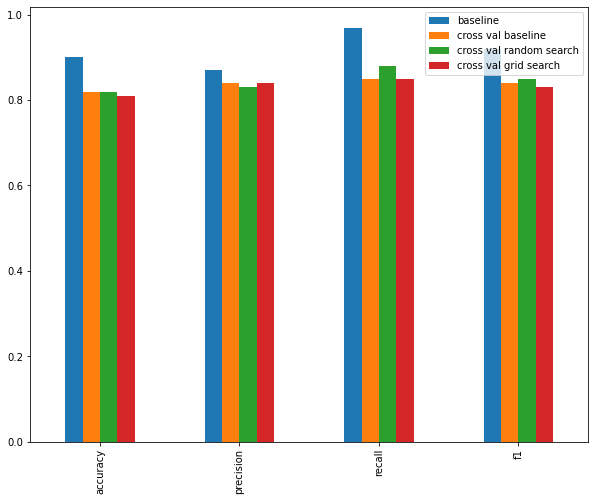

In [39]:
MLP_metrics_comparison = pd.DataFrame({"baseline": baseline_MLP_metrics,
                                           "cross val baseline": baseline_MLP_cv_metrics,
                                           "cross val random search": randomSearch_MLP_cv_metrics,
                                           "cross val grid search": gridSearch_MLP_cv_metrics}
                                          )
MLP_metrics_comparison.plot.bar(figsize=(10, 8));

## ??. `LinearSVC` (UNFINISHED)

##### I could not get this working with RandomizedSearchCV and GridSearchCV

In [6]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

# Setup random seed
np.random.seed(77)
ss = StandardScaler()

# Make the data
X = heart.drop("target", axis=1)
y = heart["target"]

# Normalizing the data
X = ss.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate LinearSVC
# We use calibrated classifier to be able to use predict.proba, as you can not normally use this with LinearSVC
SVC = CalibratedClassifierCV(base_estimator=LinearSVC(penalty='l2', dual=False), cv=5)
SVC.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=LinearSVC(dual=False), cv=5)

### 4.1 `LinearSVC` Baseline 

##### Cross-Validated Accuracy

In [7]:
# Random Seed for reproducable results
np.random.seed(77)



baseline_SVC_cvs = cross_val_score(SVC, X, y, cv=5)
np.mean(baseline_SVC_cvs)

print(f'The non cross-validated score for the baseline model is: {SVC.score(X_test, y_test)}')
print(f'The cross-validated score for the baseline model is: {np.mean(baseline_SVC_cvs)}')

The non cross-validated score for the baseline model is: 0.8852459016393442
The cross-validated score for the baseline model is: 0.8249726775956285


##### Area under Reciever Operating Characteristic Curve (AUC/ROC)

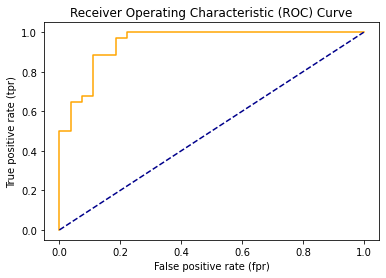

In [8]:
np.random.seed(77)

# Make predictions
y_predict = SVC.predict(X_test)
y_probability = SVC.predict_proba(X_test)
y_probability_positive = y_probability[:, 1]

# Get fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probability_positive)
roc_curve_plot(fpr, tpr)

In [9]:
SVC_roc_auc = roc_auc_score(y_test, y_probability_positive)
SVC_roc_auc

0.9466230936819172

##### Confusion Matrix

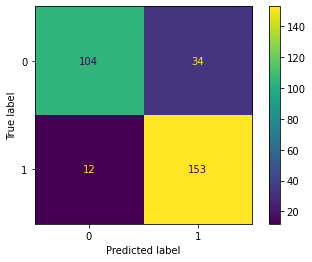

In [10]:
plot_confusion_matrix(SVC, X, y);

##### `LinearSVC` Baseline Metrics

In [11]:
SVC_y_preds = SVC.predict(X_test)
baseline_SVC_metrics = model_prediction(y_test, SVC_y_preds)

Accuracy: 88.52%
Precision: 84.62%
Recall: 97.06%
f1: 90.41%


##### `LinearSVC` Cross-Validated Baseline Metrics

In [12]:
baseline_SVC_cv_metrics = cross_val_metrics(SVC, X, y)

Accuracy: 82.50%
Precision: 80.06%
Recall: 90.91%
f1: 85.05%


##### `LinearSVC` Baseline Summary

In [13]:
print('The results on the Baseline LinearSVC Model are as follows:\n')
print(f'Cross-Validated Accuracy: {np.mean(baseline_SVC_cvs)}')
print(f'AUC_ROC: {SVC_roc_auc}')
print(f'Metrics: {baseline_SVC_metrics}')
print(f'CV Metrics: {baseline_SVC_cv_metrics}')

The results on the Baseline LinearSVC Model are as follows:

Cross-Validated Accuracy: 0.8249726775956285
AUC_ROC: 0.9466230936819172
Metrics: {'accuracy': 0.89, 'precision': 0.85, 'recall': 0.97, 'f1': 0.9}
CV Metrics: {'accuracy': 0.82, 'precision': 0.8, 'recall': 0.91, 'f1': 0.85}
